<a href="https://colab.research.google.com/github/nehat312/winning-composition/blob/main/NBA_CHAMPIONS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NBA CHAMPIONS

# IMPORTS

## LIBRARY IMPORT

In [1]:
# LIBRARY IMPORTS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import requests
from bs4 import BeautifulSoup
import json
import time
import nltk
import re

from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC #SVR
from sklearn.naive_bayes import GaussianNB #MultinomialNB
from sklearn import model_selection
from sklearn.utils import class_weight
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.inspection import permutation_importance

from sklearn import metrics
from sklearn import svm

#from sklearn.experimental import enable_hist_gradient_boosting
#from sklearn.ensemble import HistGradientBoostingClassifier

# from sklearn.impute import SimpleImputer
# from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from xgboost import XGBClassifier

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.graphics.gofplots import qqplot
import scipy.stats as st

# import statistics


import plotly as ply
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go


from PIL import Image

import datetime

print('IMPORTS SUCCESFUL')

IMPORTS SUCCESFUL


## DRIVE MOUNT

In [2]:
## GOOGLE DRIVE CONFIGURATION ##
from google.colab import drive
drive.mount('drive')

Mounted at drive


## PATH CONFIGURATION

In [3]:
# Absolute path of current folder
abspath_curr = '/content/drive/My Drive/SPORTS/NBA/'

# Absolute path of shallow utilities folder
abspath_util_shallow = '/content/drive/My Drive/GWU/GWU-CAPSTONE/'

## DIRECTORY CONFIGURATION ##
github_path = r'https://raw.githubusercontent.com/nehat312/winning-composition/main/'
img_path = 'https://github.com/nehat312/winning-composition/blob/main/images/'
gdrive_img_path = '/content/drive/My Drive/GWU/GWU-CAPSTONE/images/'
data_path = '/content/drive/My Drive/GWU/GWU-CAPSTONE/data/'
sql_path = '/content/drive/My Drive/SPORTS/NBA/data/'


players_path = github_path + 'data/NBA_champs_python.csv'
# team_path = github_path + 'data/NBA_champs_python.csv'

# SHALLOW MODEL UTILITIES
abspath_ML_models_shallow = '/content/drive/GWU-CAPSTONE/ML_models_shallow/'
# abspath_util_shallow = '/content/drive/My Drive/Colab Notebooks/teaching/gwu/machine_learning_I/spring_2022/code/utilities/p2_shallow_learning/'


print('DIRECTORY CONFIGURED')

DIRECTORY CONFIGURED


## DATA IMPORT

In [4]:
# EXCEL DATABASE
excel_master = data_path + 'NBA-Champs-12-12-22.xlsx'

## CHAMPIONS SUPPLEMENTAL ##
champs_rollup = pd.read_excel(excel_master, sheet_name='ROLLUP', header=1, index_col='TM_INDEX')

## HISTORICAL CHAMPION / PLAYER DETAIL ##
champion_players = pd.read_excel(excel_master, sheet_name='PYTHON_CHAMPS', header=0, index_col='YR_TM_PLR')
# champion_players = pd.read_csv(players_path, index_col='YR_TM_PLR', header=0)

## HISTORICAL MATCHUPS -- SEASON AVERAGES ## 
hist_matchups_avg_1991_2020 = pd.read_excel(excel_master, sheet_name='PYTHON_TEAM_AVG', header=0, index_col='TM_INDEX')
# hist_matchups_avg_1991_2020 = pd.read_csv(data_path + '/hist_matchups_avg_1991_2020.csv', header=0)

## HISTORICAL MATCHUPS -- GAME LOGS ##
hist_games_1991_2020 = pd.read_csv(data_path + 'NBA_games_1991_2020.csv')
#hist_matchups_1991_2020 = pd.read_excel(excel_master, sheet_name='GAMES_1991_2020', header=0, index_col='TM_INDEX')

print('IMPORT SUCCESFUL')

IMPORT SUCCESFUL


/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (39,69,130,153) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# PRE-PROCESSING

## VARIABLE ASSIGNMENT

In [5]:
## VISUALIZATION LABELS ##

game_cols = ['GAME_ID', 'GAME_DATE', 'YEAR', 'SEASON', 'MONTH', 'DAY',
            #  'TTL_GM_COUNT', 'H_GM_COUNT', 'A_GM_COUNT',
            #  'SZN_HOME_WIN_PCT', 'SZN_HOME_WIN_PCT',
             'SZN_HOME_WIN_PCT', 'T3_HOME_WIN_PCT',	'T5_HOME_WIN_PCT', 'T7_HOME_WIN_PCT', 'T10_HOME_WIN_PCT',
       'TM_CODE_HOME', 'TM_INDEX', 'NBA_CONF', 'NBA_DIV',
       'TEAM_NAME_HOME', 'MATCHUP_HOME', 'TEAM_ID_HOME', 'TEAM_ID_AWAY',
       'WL_HOME', 'WL_AWAY',
       'PTS_TTL', 'PTS_HOME', 'PTS_AWAY', 'MARGIN_ABS', 'PLUS_MINUS_HOME',
       'PLUS_MINUS_AWAY', 'TM_CODE_AWAY', 'MIN_HOME', 'MIN_AWAY', 'FGM_TTL',
       'FGM_HOME', 'FGM_AWAY', 'FGA_TTL', 'FGA_HOME', 'FGA_AWAY', 'FG_PCT_NET',
       'FG_PCT_TTL', 'FG_PCT_HOME', 'FG_PCT_AWAY', 'FG3M_TTL', 'FG3M_HOME',
       'FG3M_AWAY', 'FG3A_TTL', 'FG3A_HOME', 'FG3A_AWAY', 'FG3_PCT_NET',
       'FG3_PCT_TTL', 'FG3_PCT_HOME', 'FG3_PCT_AWAY', 'FTA_TTL', 'FTM_HOME',
       'FTM_AWAY', 'FTA_TTL.1', 'FTA_HOME', 'FTA_AWAY', 'FT_PCT_NET',
       'FT_PCT_TTL', 'FT_PCT_HOME', 'FT_PCT_AWAY',
       'eFG_PCT_NET', 'eFG_PCT_TTL', 'eFG_PCT_HOME', 'eFG_PCT_AWAY',
       'TS_PCT_NET', 'TS_PCT_TTL', 'TS_PCT_HOME', 'TS_PCT_AWAY',
       'OREB_TTL', 'OREB_HOME', 'OREB_AWAY', 'DREB_TTL', 'DREB_HOME', 'DREB_AWAY', 'REB_TTL', 'REB_HOME', 'REB_AWAY',
       'AST_TTL', 'AST_HOME', 'AST_AWAY', 'TOV_TTL', 'TOV_HOME', 'TOV_AWAY',
       'STOCKS_TTL', 'STOCKS_HOME', 'STOCKS_AWAY', 'STL_TTL', 'STL_HOME', 'STL_AWAY', 'BLK_TTL', 'BLK_HOME', 'BLK_AWAY',
       'AST/TOV_PCT_NET', 'AST/TOV_PCT_TTL', 'AST/TOV_PCT_HOME', 'AST/TOV_PCT_AWAY',
       'STOCKS/TOV_PCT_NET', 'STOCKS/TOV_PCT_TTL', 'STOCKS/TOV_PCT_HOME', 'STOCKS/TOV_PCT_AWAY',
       'STOCKS/TOV_NET', 'STOCKS/TOV_TTL', 'STOCKS/TOV_HOME', 'STOCKS/TOV_AWAY', 'PF_TTL',
       'PF_HOME', 'PF_AWAY', 'LIVE_PERIOD', 'NATL_TV_BROADCASTER_ABBREVIATION',
       'PTS_PAINT_HOME', 'PTS_2ND_CHANCE_HOME', 'PTS_FB_HOME',
       'LARGEST_LEAD_HOME', 'LEAD_CHANGES_HOME', 'TIMES_TIED_HOME',
       'TEAM_TURNOVERS_HOME', 'TOTAL_TURNOVERS_HOME', 'TEAM_REBOUNDS_HOME',
       'PTS_OFF_TO_HOME', 'PTS_PAINT_AWAY', 'PTS_2ND_CHANCE_AWAY',
       'PTS_FB_AWAY', 'LARGEST_LEAD_AWAY', 'LEAD_CHANGES_AWAY',
       'TIMES_TIED_AWAY', 'TEAM_TURNOVERS_AWAY', 'TOTAL_TURNOVERS_AWAY',
       'TEAM_REBOUNDS_AWAY', 'PTS_OFF_TO_AWAY', 'GAME_DATE_DAY', 'ATTENDANCE',
       'GAME_TIME', 'TEAM_WINS_LOSSES_HOME',
       'PTS_QTR1_HOME', 'PTS_QTR1_AWAY', 'PTS_QTR2_HOME', 'PTS_QTR2_AWAY', 'PTS_QTR3_HOME', 'PTS_QTR3_AWAY',
       'PTS_QTR4_HOME', 'PTS_QTR4_AWAY', 'PTS_OT1_HOME', 'PTS_OT1_AWAY', 'PTS_OT2_HOME', 'PTS_OT2_AWAY',
       'TEAM_WINS_LOSSES_AWAY',
       'LAST_GAME_ID', 'T1_GM_HOME_PTS', 'T1_GM_AWAY_PTS',
       'PTS_HOME_y',
       ]


situational_cols = ['PTS_PAINT_HOME', 'PTS_2ND_CHANCE_HOME', 'PTS_FB_HOME',
                   'LARGEST_LEAD_HOME', 'LEAD_CHANGES_HOME', 'TIMES_TIED_HOME',
                   'TEAM_TURNOVERS_HOME', 'TOTAL_TURNOVERS_HOME', 'TEAM_REBOUNDS_HOME',
                   'PTS_OFF_TO_HOME', 'PTS_PAINT_AWAY', 'PTS_2ND_CHANCE_AWAY',
                   'PTS_FB_AWAY', 'LARGEST_LEAD_AWAY', 'LEAD_CHANGES_AWAY',
                   'TIMES_TIED_AWAY', 'TEAM_TURNOVERS_AWAY', 'TOTAL_TURNOVERS_AWAY',
                   'TEAM_REBOUNDS_AWAY', 'PTS_OFF_TO_AWAY',
                   'GAME_DATE_DAY', 'ATTENDANCE', 'GAME_TIME', 'TEAM_WINS_LOSSES_HOME',
                   'PTS_QTR1_HOME', 'PTS_QTR1_AWAY', 'PTS_QTR2_HOME', 'PTS_QTR2_AWAY', 'PTS_QTR3_HOME', 'PTS_QTR3_AWAY',
                   'PTS_QTR4_HOME', 'PTS_QTR4_AWAY', 'PTS_OT1_HOME', 'PTS_OT1_AWAY', 'PTS_OT2_HOME', 'PTS_OT2_AWAY',
                   #'TEAM_WINS_LOSSES_AWAY',
                   #'LAST_GAME_ID', 'T1_GM_HOME_PTS', 'T1_GM_AWAY_PTS',
                   #'PTS_HOME_y',
                   ]

all_cols = ['YR_TM_PLR', 'YEARS', 'YEAR',
            'TEAM', 'CHAMP', 'PLAYER', 'NUMBER',
            'POS', 'WTD POS', 'RD POS',
            'HEIGHT (IN)',
            'WEIGHT (LBS)',
            'BMI', 'W-SPAN (IN)', 'APE',
            'AGE',  'EXPERIENCE',
            'NATION', 'COUNTRY',
            'CONTINENT', 'GLOBAL REGION',
            'CONFERENCE', 'COLLEGE',
            'SALARY', '% SALARY', 'TM TTL SAL', 'NBA SAL CAP', 'NBA TM AVG SAL',
            '$MM/eWIN', '$MM/TmWIN', '$MM/PlrWS',
            'MP', 'PER', 'WTD-PER', 'AGE',
            'TS%', 'AST%', 'STL%', 'BLK%', 'TO%',
            'AST%/TO%', 'STOCK%',
            'D-WS', 'O-WS', 'WS', 'WS_VAL', 'TM-WS',
            'RAPTOR', 'RAPTOR_VAL', 'TM-RAPTOR',
            'LEBRON', 'LEBRON_VAL', 'TM-LEBRON', #D #O
            'USG%', 'TS%',
            ]


viz_cols = ['YEAR', 'TEAM', 'CHAMP', 'PLAYER', 'WTD POS', 'RD POS',
            'HEIGHT (IN)', 'WEIGHT (LBS)', 'BMI', 'W-SPAN (IN)', 'APE',
            'AGE',  'EXPERIENCE',
            'NATION', 'COUNTRY',
            'CONTINENT', 'GLOBAL REGION',
            'CONFERENCE', 'COLLEGE',
            'SALARY', '% SALARY', 'TM TTL SAL', 'NBA SAL CAP', 'NBA TM AVG SAL',
            '$MM/eWIN', '$MM/TmWIN', '$MM/PlrWS',
            'MP', #'PER', 'WTD-PER',
            'USG%', 'TS%', 'AST%', 'STL%', 'BLK%', 'TO%',
            'AST%/TO%', 'STOCK%',
            'D-WS', 'O-WS', 'WS',  'TM-WS', 'TM-RAPTOR', #'TM-LEBRON',
            'RAPTOR', #'LEBRON',
            'RAPTOR_VAL', 'WS_VAL', #'LEBRON_VAL', 
            ]

            
cluster_clean = ['YEAR', #'TEAM', 'CHAMP', 'PLAYER',
                 'WTD POS', 'RD POS', 'HEIGHT (IN)', 'WEIGHT (LBS)', 'BMI', 'W-SPAN (IN)', 'APE',
                 'AGE',  'EXPERIENCE',
            #'NATION', 'COUNTRY', 'CONTINENT', 'GLOBAL REGION',
            #'CONFERENCE', 'COLLEGE',
            'SALARY', '% SALARY', 'TM TTL SAL', 'NBA SAL CAP', 'NBA TM AVG SAL',
            # '$MM/eWIN', '$MM/TmWIN', '$MM/PlrWS',
            'MP', #'PER', 'WTD-PER',
            # 'AST%', 'STL%', 'BLK%', 'TO%',
            'USG%', 'TS%', 'AST%/TO%', 'STOCK%',
            'D-WS', 'O-WS', 'WS',  
            'RAPTOR', #'LEBRON',
            'TM-WS', 'TM-RAPTOR', #'TM-LEBRON',
            # 'RAPTOR_VAL', 'LEBRON_VAL', 'WS_VAL',
            ]

scale_cols = ['WTD POS',
              'RAPTOR', 'WS', #'LEBRON',
              'USG%', 'WS',
              'BMI', 'W-SPAN (IN)', 'APE',
              'AGE', #'EXPERIENCE',
              ]

team_df_cols = ['CHAMP', 'PLAYER', 'WTD POS',
              'BMI', 'W-SPAN (IN)', 'APE',
              'AGE', #'EXPERIENCE',
              'USG%', 'TS%',
              # 'AST%', 'STL%', 'BLK%', 'TO%',
              'AST%/TO%', 'STOCK%',
              'SALARY', 'TM TTL SAL',
              'NBA SAL CAP', 'NBA TM AVG SAL',
              'WS', #'RAPTOR', #'LEBRON',
              '$MM/eWIN', '$MM/TmWIN', '$MM/PlrWS',
              ]

historical_matchup_cols = ['YEAR', 'TM_CODE', 'SZN_CHAMP', 'TEAM_NAME_HOME', 'TEAM_CITY_NAME_HOME',
                           'NBA_CONF', 'NBA_DIV', 
       'TEAM_NICKNAME_HOME', 'W', 'L', 'W/L%', 'SRS', 'PACE', 'O-RTG', 'D-RTG',
       'NET-RTG', 'H_MARGIN', 'A_MARGIN', 'NET_MARGIN', 'FGM_TTL', 'FGA_TTL',
       'FG_PCT_TTL', 'FG3M_TTL', 'FG3A_TTL', 'FG3_PCT_TTL', 'FTM_TTL',
       'FTA_TTL', 'FT_PCT_TTL', 'OREB_TTL', 'DREB_TTL', 'REB_TTL', 'AST_TTL',
       'STL_TTL', 'BLK_TTL', 'TOV_TTL', 'PF_TTL', 'PTS_TTL', 'PLUS_MINUS_TTL',
       'FGM_HOME', 'FGA_HOME', 'FG_PCT_HOME', 'FG3M_HOME', 'FG3A_HOME',
       'FG3_PCT_HOME', 'FTM_HOME', 'FTA_HOME', 'FT_PCT_HOME', 'OREB_HOME',
       'DREB_HOME', 'REB_HOME', 'AST_HOME', 'STL_HOME', 'BLK_HOME', 'TOV_HOME',
       'PF_HOME', 'PTS_HOME', 'PLUS_MINUS_HOME', 'FGM_AWAY', 'FGA_AWAY',
       'FG_PCT_AWAY', 'FG3M_AWAY', 'FG3A_AWAY', 'FG3_PCT_AWAY', 'FTM_AWAY',
       'FTA_AWAY', 'FT_PCT_AWAY', 'OREB_AWAY', 'DREB_AWAY', 'REB_AWAY', 'AST_AWAY', 'STL_AWAY', 'BLK_AWAY', 'TOV_AWAY',
       'PF_AWAY', 'PTS_AWAY', 'PLUS_MINUS_AWAY',
       'NATL_TV_BROADCASTER_ABBREVIATION', 'PTS_PAINT_HOME',
       'PTS_2ND_CHANCE_HOME', 'PTS_FB_HOME', 'LARGEST_LEAD_HOME',
       'LEAD_CHANGES_HOME', 'TIMES_TIED_HOME', 'TEAM_TURNOVERS_HOME',
       'TOTAL_TURNOVERS_HOME', 'TEAM_REBOUNDS_HOME', 'PTS_OFF_TO_HOME',
       'PTS_PAINT_AWAY', 'PTS_2ND_CHANCE_AWAY', 'PTS_FB_AWAY',
       'LARGEST_LEAD_AWAY', 'LEAD_CHANGES_AWAY', 'TIMES_TIED_AWAY',
       'TEAM_TURNOVERS_AWAY', 'TOTAL_TURNOVERS_AWAY', 'TEAM_REBOUNDS_AWAY',
       'PTS_OFF_TO_AWAY', 'GAME_DATE_DAY', 'ATTENDANCE', 'PTS_QTR1_HOME',
       'PTS_QTR2_HOME', 'PTS_QTR3_HOME', 'PTS_QTR4_HOME', 'PTS_OT1_HOME',
       'PTS_OT2_HOME', 'PTS_HOME_y', 'PTS_QTR1_AWAY', 'PTS_QTR2_AWAY',
       'PTS_QTR3_AWAY', 'PTS_QTR4_AWAY', 'PTS_OT1_AWAY', 'PTS_OT2_AWAY',
       'T1_GM_HOME_PTS', 'T1_GM_AWAY_PTS']


historical_matchup_cols_OG = ['YEAR',
                            # 'TEAM_ID_HOME',
                            # 'TEAM_ABBREVIATION_HOME',
                            'WL_HOME', 
                            'FGM_HOME', 'FGA_HOME', 'FG_PCT_HOME',
                            'FG3M_HOME', 'FG3A_HOME', 'FG3_PCT_HOME',
                            'FTM_HOME', 'FTA_HOME', 'FT_PCT_HOME',
                            'OREB_HOME', 'DREB_HOME', 'REB_HOME',
                            'AST_HOME', 'TOV_HOME', 'STL_HOME', 'BLK_HOME',
                            'PTS_HOME', 'PLUS_MINUS_HOME',
                            #'HOME_TEAM_WINS', 'HOME_TEAM_LOSSES',
                           


                            'TEAM_ID_AWAY', #'TEAM_ABBREVIATION_AWAY', # 'WL_AWAY', 
                            'FGM_AWAY', 'FGA_AWAY', 'FG_PCT_AWAY',
                            'FG3M_AWAY', 'FG3A_AWAY', 'FG3_PCT_AWAY',
                            'FTM_AWAY', 'FTA_AWAY', 'FT_PCT_AWAY',
                            'OREB_AWAY', 'DREB_AWAY', 'REB_AWAY',
                            'AST_AWAY', 'STL_AWAY', 'BLK_AWAY', 'TOV_AWAY',
                            'PTS_AWAY', 'PLUS_MINUS_AWAY',
                            # 'AWAY_TEAM_WINS', 'AWAY_TEAM_LOSSES',
                            ]

hist_matchups_avg_cols = ['YEAR',
                          'NBA_CONF', 'NBA_DIV', 
                          
                            'FGM_HOME', 'FGA_HOME', 'FG_PCT_HOME',
                            'FG3M_HOME', 'FG3A_HOME', 'FG3_PCT_HOME',
                            'FTM_HOME', 'FTA_HOME', 'FT_PCT_HOME',
                            'OREB_HOME', 'DREB_HOME', 'REB_HOME',
                            'AST_HOME', 'TOV_HOME', 'STL_HOME', 'BLK_HOME',
                            'PTS_HOME', 'PLUS_MINUS_HOME',
                            'HOME_TEAM_WINS', 'HOME_TEAM_LOSSES',

                            # 'WL_AWAY', 
                            'FGM_AWAY', 'FGA_AWAY', 'FG_PCT_AWAY',
                            'FG3M_AWAY', 'FG3A_AWAY', 'FG3_PCT_AWAY',
                            'FTM_AWAY', 'FTA_AWAY', 'FT_PCT_AWAY',
                            'OREB_AWAY', 'DREB_AWAY', 'REB_AWAY',
                            'AST_AWAY', 'STL_AWAY', 'BLK_AWAY', 'TOV_AWAY',
                            'PTS_AWAY', 'PLUS_MINUS_AWAY',
                            # 'AWAY_TEAM_WINS', 'AWAY_TEAM_LOSSES',
                            ]


### KEEP ??? ###

test_features = [#'TEAM_ABBREVIATION_HOME', 'MATCHUP_HOME', 'GAME_DATE',
                 'WL_HOME',
                #  'MIN_HOME',
                 'FG_PCT_HOME', 'FG3_PCT_HOME', 'FT_PCT_HOME',
                 'FGM_HOME', 'FG3M_HOME', 'FTA_HOME', 'FGA_HOME',  'FG3A_HOME',  'FTM_HOME', 
                 'OREB_HOME', 'DREB_HOME', #'REB_HOME',
                 'AST_HOME', 'TOV_HOME', 'STL_HOME', 'BLK_HOME',
                 'PTS_HOME', #'PF_HOME', 'PLUS_MINUS_HOME',
                #  'PTS_PAINT_HOME', 'PTS_2ND_CHANCE_HOME', #'PTS_FB_HOME',
                #  'LARGEST_LEAD_HOME', 'LEAD_CHANGES_HOME', 'TIMES_TIED_HOME', 'PTS_OFF_TO_HOME',
                 #'TEAM_TURNOVERS_HOME', 'TOTAL_TURNOVERS_HOME', 'TEAM_REBOUNDS_HOME', 
                 'PTS_QTR1_HOME', 'PTS_QTR2_HOME', 'PTS_QTR3_HOME', 'PTS_QTR4_HOME',
                #  'PTS_OT1_HOME', 'PTS_OT2_HOME', 'PTS_OT3_HOME',
                 #'HOME_TEAM_WINS', 'HOME_TEAM_LOSSES'
                 ]


print('VARIABLES ASSIGNED')

VARIABLES ASSIGNED


## GROUPING

In [6]:
## GENERATE MODEL DATAFRAMES ##
reg_szn_test = hist_games_1991_2020
reg_szn_avg = hist_matchups_avg_1991_2020

In [7]:
## GENERATE VISUALIZATION DATAFRAMES ##

reg_szn_avg_Champs = reg_szn_avg[reg_szn_avg['SZN_CHAMP'] == 1]
reg_szn_avg_NBA = reg_szn_avg[reg_szn_avg['TM_CODE'] == 'NBA']
reg_szn_avg_East = reg_szn_avg[reg_szn_avg['TM_CODE'] == 'NBA']
reg_szn_avg_West = reg_szn_avg[reg_szn_avg['TM_CODE'] == 'NBA']
reg_szn_avg_Div = reg_szn_avg.dropna(subset=['NBA_DIV'])

print('FILTERS APPLIED')

FILTERS APPLIED


In [8]:
print(reg_szn_test.TM_CODE_HOME.unique())
print('*'*100)
print(reg_szn_test.YEAR.unique())

['BOS' 'CHI' 'LAC' 'MIA' 'DET' 'POR' 'UTA' 'IND' 'ATL' 'DEN' 'MIN' 'CHA'
 'NYK' 'WAS' 'OKC' 'PHX' 'MIL' 'SAS' 'DAL' 'ORL' 'SAC' 'PHI' 'GSW' 'LAL'
 'HOU' 'CLE' 'BKN' 'TOR' 'MEM' 'NOP']
****************************************************************************************************
[1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004
 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018
 2019 2020 2021]


In [9]:
## FEATURE LISTS ##

team_list = list(champion_players['TEAM'].unique())
champ_list = list(champion_players['CHAMP'].unique())
college_list = list(champion_players['COLLEGE'].unique())
conference_list = list(champion_players['CONFERENCE'].unique())
country_list = list(champion_players['COUNTRY'].unique())
region_list = list(champion_players['GLOBAL REGION'].unique())


# ## TIME INTERVALS ##
# today = datetime.date.today()
# before = today - datetime.timedelta(days=1095) #700
# start_date = '2000-01-01'
# end_date = today


## GROUPBY: YEAR - TEAM - AVERAGE STATS ##
  # hist_matchups_stats_1991_2020 = hist_games_1991_2020[historical_matchup_cols_OG]
  # hist_matchups_avg_1991_2020 = hist_matchups_avg_1991_2020[historical_matchup_cols]
  # hist_matchups_avg_1991_2020 = hist_matchups_stats_1991_2020.groupby(['YEAR', 'TEAM_ID_HOME', 'TEAM_ABBREVIATION_HOME']).mean()


print('LISTS GENERATED')

LISTS GENERATED


## FEATURE ENGINEERING

## CHAMPIONS

In [10]:
## FILTER CHAMPIONSHIP PLAYERS ##
champion_players = champion_players[viz_cols]
champion_players = champion_players[champion_players['MP'] > 350] #175
lebron_val_players = champion_players[champion_players['YEAR'] >= 2010]


## GROUP BY CHAMPIONSHIP TEAM

champion_teams = champion_players[team_df_cols]

chi_bulls_1991 = champion_teams[champion_teams['CHAMP'] == '1991-CHI']
chi_bulls_1992 = champion_teams[champion_teams['CHAMP'] == '1992-CHI']
chi_bulls_1993 = champion_teams[champion_teams['CHAMP'] == '1993-CHI']
hou_rockets_1994 = champion_teams[champion_teams['CHAMP'] == '1994-HOU']
hou_rockets_1995 = champion_teams[champion_teams['CHAMP'] == '1995-HOU']
chi_bulls_1996 = champion_teams[champion_teams['CHAMP'] == '1996-CHI']
chi_bulls_1997 = champion_teams[champion_teams['CHAMP'] == '1997-CHI']
chi_bulls_1998 = champion_teams[champion_teams['CHAMP'] == '1998-CHI']
sas_spurs_1999 = champion_teams[champion_teams['CHAMP'] == '1999-SAS']
lal_lakers_2000 = champion_teams[champion_teams['CHAMP'] == '2000-LAL']
lal_lakers_2001 = champion_teams[champion_teams['CHAMP'] == '2001-LAL']
lal_lakers_2002 = champion_teams[champion_teams['CHAMP'] == '2002-LAL']
sas_spurs_2003 = champion_teams[champion_teams['CHAMP'] == '2003-SAS']
det_pistons_2004 = champion_teams[champion_teams['CHAMP'] == '2004-DET']
sas_spurs_2005 = champion_teams[champion_teams['CHAMP'] == '2005-SAS']
mia_heat_2006 = champion_teams[champion_teams['CHAMP'] == '2006-MIA']
sas_spurs_2007 = champion_teams[champion_teams['CHAMP'] == '2007-SAS']
bos_celtics_2008 = champion_teams[champion_teams['CHAMP'] == '2008-BOS']
lal_lakers_2009 = champion_teams[champion_teams['CHAMP'] == '2009-LAL']
lal_lakers_2010 = champion_teams[champion_teams['CHAMP'] == '2010-LAL']
dal_mavs_2011 = champion_teams[champion_teams['CHAMP'] == '2011-DAL']
mia_heat_2012 = champion_teams[champion_teams['CHAMP'] == '2012-MIA']
mia_heat_2013 = champion_teams[champion_teams['CHAMP'] == '2013-MIA']
sas_spurs_2014 = champion_teams[champion_teams['CHAMP'] == '2014-SAS']
gsw_warriors_2015 = champion_teams[champion_teams['CHAMP'] == '2015-GSW']
cle_cavs_2016 = champion_teams[champion_teams['CHAMP'] == '2016-CLE']
gsw_warriors_2017 = champion_teams[champion_teams['CHAMP'] == '2017-GSW']
gsw_warriors_2018 = champion_teams[champion_teams['CHAMP'] == '2018-GSW']
tor_raptors_2019 = champion_teams[champion_teams['CHAMP'] == '2019-TOR']
lal_lakers_2020 = champion_teams[champion_teams['CHAMP'] == '2020-LAL']
mil_bucks_2021 = champion_teams[champion_teams['CHAMP'] == '2021-MIL']
gsw_warriors_2022 = champion_teams[champion_teams['CHAMP'] == '2022-GSW']

champ_df_list = [chi_bulls_1991, chi_bulls_1992, chi_bulls_1993,
                 hou_rockets_1994, hou_rockets_1995,
                 chi_bulls_1996, chi_bulls_1997, chi_bulls_1998,
                 sas_spurs_1999, lal_lakers_2000, lal_lakers_2001, lal_lakers_2002,
                 sas_spurs_2003, det_pistons_2004, sas_spurs_2005,
                 mia_heat_2006, sas_spurs_2007, bos_celtics_2008, lal_lakers_2009, lal_lakers_2010,
                 dal_mavs_2011, mia_heat_2012, mia_heat_2013, sas_spurs_2014, gsw_warriors_2015,
                 cle_cavs_2016, gsw_warriors_2017, gsw_warriors_2018, 
                 tor_raptors_2019, lal_lakers_2020, mil_bucks_2021, gsw_warriors_2022,
                 ]

# for df in champ_df_list:
#   df = df.drop(columns=['CHAMP', 'PLAYER'], inplace=True)

print('GROUPING COMPLETE')

GROUPING COMPLETE


# VISUALIZATIONS

## FORMAT / STYLE

### CHART LABELS

In [11]:
## VISUALIZATION LABELS ##
chart_labels = {'W-SPAN (IN)':'WINGSPAN (IN)',
                'APE':'APE INDEX',
                'WTD POS':'WTD POS',
                'RD POS':'POS',
                'CHAMP':'YR-TM',
                'LEBRON_VAL':'LEBRON/$',
                'RAPTOR_VAL':'RAPTOR/$',
                'WS_VAL':'WS/$',
                'TM TTL SAL':'TTL TEAM SALARY',
                'NBA SAL CAP':'NBA SALARY CAP',
                'NBA TM AVG SAL':'AVG NBA TEAM SALARY',
                'NBA_DIV':'NBA DIVISION',
                'NBA_CONF':'NBA CONFERENCE',
                'SZN_CHAMP':'CHAMPION',
                'PTS_TTL':'POINTS/GAME',
                
                'FG3A_HOME':'3PT FGA', 'FG3A_AWAY':'3PT FGA', 'FG3A_TTL':'3PT FGA',
                'FGA_HOME':'FGA', 'FGA_AWAY':'FGA', 'FGA_TTL':'FGA',
                'FTA_HOME':'FTA', 'FTA_AWAY':'FTA', 'FTA_TTL':'FTA',
                'FG_PCT_HOME':'FG%', 'FG_PCT_AWAY':'FG%', 'FG_PCT_TTL':'FG%',
                'FG3_PCT_HOME':'FG%', 'FG3_PCT_AWAY':'FG%', 'FG3_PCT_TTL':'FG%',
                'FT_PCT_HOME':'FG%', 'FT_PCT_AWAY':'FG%', 'FT_PCT_TTL':'FG%',
                'PLUS_MINUS_HOME':'+/-', 'PLUS_MINUS_AWAY':'+/-',
                # 'NATL_TV_BROADCASTER_ABBREVIATION':'TV BROADCAST',
                # 'TEAM_ABBREVIATION_HOME':'TEAM_HOME', 'TEAM_ABBREVIATION_AWAY':'TEAM_AWAY',
                
                'NBA_AVG_PAYROLL_ADJ':'NBA PAYROLL (NBA AVG)',
                'TM_PAYROLL_ADJ':'TEAM PAYROLL',
                'NBA_TTL_COST':'NBA PAYROLL COST PER eWIN (NBA TTL)',
                'NBA_AVG_COST':'NBA PAYROLL COST PER eWIN (NBA AVG)',
                'TM_eWIN_COST':'TEAM COST PER eWIN',
                

                'eWIN_BREAKEVEN_AVG':'eWIN/SALARY BREAKEVEN GAMES PLAYED (NBA AVG - GP)',
                'eWIN_BREAKEVEN_TTL':'eWIN/SALARY BREAKEVEN GAMES PLAYED (NBA TTL - GP)',


                '1991':'1991-CHI', '1992':'1992-CHI', '1993':'1993-CHI', '1994':'1994-HOU', '1995':'1995-HOU',
                '1996':'1996-CHI', '1997':'1997-CHI', '1998':'1998-CHI', '1999':'1999-SAS',
                '2000':'2000-LAL', '2001':'2001-LAL', '2002':'2002-LAL',
                '2003':'2003-SAS', '2004':'2004-DET', '2005':'2005-SAS',
                '2006':'2006-MIA', '2007':'2007-SAS', '2008':'2008-BOS',
                '2009':'2009-LAL', '2010':'2010-LAL',
                '2011':'2011-DAL', '2012':'2012-MIA', '2013':'2013-MIA', '2014':'2014-SAS',
                '2015':'2015-GSW', '2016':'2016-CLE', '2017':'2017-GSW', '2018':'2018-GSW',
                '2019':'2019-TOR', '2020':'2020-LAL', '2021':'2021-MIL', '2022':'2022-GSW',
                }


# team_ID_dict = {"Atlanta Hawks": 1610612737,
#                 "Boston Celtics": 1610612738,
#                 "Brooklyn Nets": 1610612751,
#                 "Charlotte Bobcats": 1610612766,
#         "Charlotte Hornets": 1610612766,
#         "Chicago Bulls": 1610612741,
#         "Cleveland Cavaliers": 1610612739,
#         "Dallas Mavericks": 1610612742,
#         "Denver Nuggets": 1610612743,
#         "Detroit Pistons": 1610612765,
#         "Golden State Warriors": 1610612744,
#         "Houston Rockets": 1610612745,
#         "Indiana Pacers": 1610612754,
#         "LA Clippers": 1610612746,
#         "Los Angeles Clippers": 1610612746,
#         "Los Angeles Lakers": 1610612747,
#         "Memphis Grizzlies": 1610612763,
#         "Miami Heat": 1610612748,
#         "Milwaukee Bucks": 1610612749,
#         "Minnesota Timberwolves": 1610612750,
#         "New Jersey Nets": 1610612751,
#         "New Orleans Hornets": 1610612740,
#         "New Orleans Pelicans": 1610612740,
#         "New York Knicks": 1610612752,
#         "Oklahoma City Thunder": 1610612760,
#         "Orlando Magic": 1610612753,
#         "Philadelphia 76ers": 1610612755,
#         "Phoenix Suns": 1610612756,
#         "Portland Trail Blazers": 1610612757,
#         "Sacramento Kings": 1610612758,
#         "San Antonio Spurs": 1610612759,
#         "Toronto Raptors": 1610612761,
#         "Utah Jazz": 1610612762,
#         "Washington Wizards": 1610612764,
#         }

In [12]:
viz_margin_dict = dict(l=20, r=20, t=50, b=20)
viz_bg_color = '#0360CE' #"LightSteelBlue"

viz_font_dict=dict(size=16, color='#FFFFFF') #  family="Courier New, monospace",
# viz_border_shape = go.layout.Shape(type='rect', xref='paper', yref='paper',  line={'width': 1, 'color': 'black'}) #x0=0, y0=-0.1, x1=1.01, y1=1.02,

#F5DFC9 - Court
#0360CE - Blue

### IMAGE IMPORT

In [ ]:
## IMAGE IMPORT ##

# ## LEAGUE LOGOS ##
# nba_logo_1 = Image.open(img_url + 'NBA_Logo.png')
# nba_logo_2 = Image.open(img_url + 'NBA_Logo2.png')
# court_img_1 = Image.open(img_url + 'Court1.png')

# ## EASTERN CONFERENCE LOGOS ##
# East_logo = Image.open(img_url + 'east/NBA_East.png')
# ATL_logo = Image.open(img_url + 'east/ATL-Hawks.png')
# BKN_logo = Image.open(img_url + 'east/BKN-Nets.png')
# BOS_logo = Image.open(img_url + 'east/BOS-Celtics.png')
# CHI_logo = Image.open(img_url + 'east/CHI-Bulls.png')
# CHA_logo = Image.open(img_url + 'east/CHA-Hornets.png')
# CLE_logo = Image.open(img_url + 'east/CLE-Cavaliers.png')
# DET_logo = Image.open(img_url + 'east/DET-Pistons.png')
# IND_logo = Image.open(img_url + 'east/IND-Pacers.png')
# MIA_logo = Image.open(img_url + 'east/MIA-Heat.png')
# MIL_logo = Image.open(img_url + 'east/MIL-Bucks.png')
# NYK_logo = Image.open(img_url + 'east/NYK-Knicks.png')
# ORL_logo = Image.open(img_url + 'east/ORL-Magic.png')
# PHI_logo = Image.open(img_url + 'east/PHI-Sixers.png')
# TOR_logo = Image.open(img_url + 'east/TOR-Raptors.png')
# WAS_logo = Image.open(img_url + 'east/WAS-Wizards.png')

# ## WESTERN CONFERENCE LOGOS ##
# West_logo = Image.open(img_url + 'west/NBA_West.png')
# DAL_logo = Image.open(img_url + 'west/DAL-Mavericks.png')
# DEN_logo = Image.open(img_url + 'west/DEN-Nuggets.png')
# GSW_logo = Image.open(img_url + 'west/GSW-Warriors.png')
# HOU_logo = Image.open(img_url + 'west/HOU-Rockets.png')
# LAC_logo = Image.open(img_url + 'west/LAC-Clippers.png')
# LAL_logo = Image.open(img_url + 'west/LAL-Lakers.png')
# MEM_logo = Image.open(img_url + 'west/MEM-Grizzlies.png')
# MIN_logo = Image.open(img_url + 'west/MIN-Timberwolves.png')
# NOP_logo = Image.open(img_url + 'west/NOP-Pelicans.png')
# PHX_logo = Image.open(img_url + 'west/PHX-Suns.png')
# POR_logo = Image.open(img_url + 'west/POR-Trailblazers.png')
# SAC_logo = Image.open(img_url + 'west/SAC-Kings.png')
# SAS_logo = Image.open(img_url + 'west/SAS-Spurs.png')
# OKC_logo = Image.open(img_url + 'west/OKC-Thunder.png')
# UTA_logo = Image.open(img_url + 'west/UTA-Jazz.png')

# print('IMPORT SUCCESFUL')

In [13]:
## FORMAT / STYLE ##

## COLOR SCALES ##

Tropic = px.colors.diverging.Tropic
Blackbody = px.colors.sequential.Blackbody
BlueRed = px.colors.sequential.Bluered

Sunsetdark = px.colors.sequential.Sunsetdark
Sunset = px.colors.sequential.Sunset
Temps = px.colors.diverging.Temps
Tealrose = px.colors.diverging.Tealrose

Ice = px.colors.sequential.ice
Ice_r = px.colors.sequential.ice_r
Dense = px.colors.sequential.dense
Deep = px.colors.sequential.deep
PuOr = px.colors.diverging.PuOr
Speed = px.colors.sequential.speed
# IceFire = px.colors.diverging.
# YlOrRd = px.colors.sequential.YlOrRd
# Mint = px.colors.sequential.Mint
# Electric = px.colors.sequential.Electric

# pd.options.display.float_format = '${:,.2f}'.format
# pd.set_option('display.max_colwidth', 200)

print('SETTINGS CONFIGURED')

SETTINGS CONFIGURED


### STREAMLIT

In [14]:
## CHAMPION CHARTS 

scatter_matrix_chi_1991 = px.scatter_matrix(chi_bulls_1991,
                                         dimensions=['USG%', 'TS%', 'AST%/TO%', 'STOCK%', 'WS', ],
                                         color=chi_bulls_1991['WTD POS'],
                                         color_continuous_scale=Dense,
                                         color_discrete_sequence=Dense,
                                          #  symbol=team_logos_dict,
                                          #  symbol_sequence=team_logos_dict,
                                          #  symbol_map=team_logos_dict,
                                         # color_discrete_map=team_logos_dict,
                                        hover_name=chi_bulls_1991.index,
                                        #  hover_data=chi_bulls_1991[['MP', 'CHAMP']],
                                        #  title='1991 CHICAGO BULLS',
                                         labels=chart_labels,
                                         # custom_data= [league_logo_list],
                                         height=800,
                                         # width=800,
                                         )





scatter_matrix_chi_1991 = px.scatter_matrix(chi_bulls_1991,
                                         dimensions=['USG%', 'TS%', 'AST%/TO%', 'STOCK%', 'WS', ],
                                         color=chi_bulls_1991['WTD POS'],
                                         color_continuous_scale=Dense,
                                         color_discrete_sequence=Dense,
                                          #  symbol=team_logos_dict,
                                          #  symbol_sequence=team_logos_dict,
                                          #  symbol_map=team_logos_dict,
                                         # color_discrete_map=team_logos_dict,
                                        hover_name=chi_bulls_1991.index,
                                        #  hover_data=chi_bulls_1991[['MP', 'CHAMP']],
                                        #  title='1991 CHICAGO BULLS',
                                         labels=chart_labels,
                                         # custom_data= [league_logo_list],
                                         height=800,
                                         # width=800,
                                         )

In [ ]:
champ_df_dict = {}
for df in champ_df_dict:
  champ_df_dict[df] = px.scatter_matrix(df,
                            dimensions=['USG%', 'TS%', 'AST%/TO%', 'STOCK%', 'WS', ],
                            color=df['WTD POS'],
                            color_continuous_scale=Dense,
                            color_discrete_sequence=Dense,
                                          #  symbol=team_logos_dict,
                                          #  symbol_sequence=team_logos_dict,
                                          #  symbol_map=team_logos_dict,
                                         # color_discrete_map=team_logos_dict,
                                        hover_name=df.index,
                                        #  hover_data=chi_bulls_1991[['MP', 'CHAMP']],
                                        #  title='1991 CHICAGO BULLS',
                                         labels=chart_labels,
                                         # custom_data= [league_logo_list],
                                         height=800,
                                         # width=800,
                                         )

In [ ]:
print(scatter_matrix_chi_1991.show(renderer="colab"))

In [ ]:
####################################################################################################################

## BAR CHARTS ##
bar_usg_salary = px.bar(data_frame=champion_players,
                              x=champion_players['CHAMP'],
                              y=champion_players['SALARY'],
                              color=champion_players['USG%'],     # EXPERIENCE AGE MP APE
                              color_continuous_scale=Tropic,
                              color_discrete_sequence=Tropic,
                              # color_continuous_midpoint=10,
                              # color_discrete_map=team_logos_dict,
                              hover_name=champion_players['PLAYER'],
                              hover_data=champion_players[['CHAMP', 'SALARY', 'MP']], #'WS/$',
                              barmode='group',
                              title='USG% RELATIVE TO TEAM SALARY',
                              labels=chart_labels,
                              # template='simple_white+gridon',
                              # range_x=[1991,2023],
                              # range_y=[0,200000000],
                              height=750,
                            # category_orders={"InternetService": ["DSL", "Fiber optic", "No"],
#                               "gender": ["Female", "Male"]})
                              )



bar_eWINS_WS = px.bar(data_frame=champion_players,
                              x=champion_players['CHAMP'],
                              y=champion_players['SALARY'],
                              color=champion_players['$MM/PlrWS'],     # EXPERIENCE AGE MP APE
                              color_continuous_scale=Tropic,
                              color_discrete_sequence=Tropic,
                              # color_continuous_midpoint=10,
                              # color_discrete_map=team_logos_dict,
                              hover_name=champion_players['PLAYER'],
                              hover_data=champion_players[['CHAMP', 'SALARY', 'MP']], #'WS/$',
                              barmode='group',
                              title='$MM / PLAYER WS RELATIVE TO TEAM SALARY',
                              labels=chart_labels,
                              # template='simple_white+gridon',
                              # range_x=[1991,2023],
                              # range_y=[0,200000000],
                              height=750,
                            # category_orders={"InternetService": ["DSL", "Fiber optic", "No"],
#                               "gender": ["Female", "Male"]})
                              )


bar_WS_salary = px.bar(data_frame=champion_players,
                              x=champion_players['CHAMP'],
                              y=champion_players['SALARY'],
                              color=champion_players['WS'],     # EXPERIENCE AGE MP APE
                              color_continuous_scale=Tropic,
                              color_discrete_sequence=Tropic,
                              color_continuous_midpoint=10,
                              # color_discrete_map=team_logos_dict,
                              hover_name=champion_players['PLAYER'],
                              hover_data=champion_players[['CHAMP', 'SALARY', 'MP', 'WS']], #'WS/$',
                              barmode='group',
                              title='WIN SHARES (WS) METRIC RELATIVE TO CHAMPIONSHIP TEAM SALARY',
                              labels=chart_labels,
                              # template='simple_white+gridon',
                              # range_x=[1991,2023],
                              # range_y=[0,200000000],
                              height=750,
                              # width=1000,
                              )

bar_raptor_salary = px.bar(data_frame=champion_players,
                              x=champion_players['CHAMP'],
                              y=champion_players['SALARY'],
                              color=champion_players['RAPTOR'],     # EXPERIENCE AGE MP APE
                              color_continuous_scale=Tropic,
                              color_discrete_sequence=Tropic,
                              color_continuous_midpoint=0,
                              # color_discrete_map=team_logos_dict,
                              hover_name=champion_players['PLAYER'],
                              hover_data=champion_players[['CHAMP', 'SALARY', 'MP', 'RAPTOR']],
                              barmode='group',
                              title='RAPTOR METRIC RELATIVE TO CHAMPIONSHIP TEAM SALARY',
                              labels=chart_labels,
                              # template='simple_white+gridon',
                              # range_x=[1991,2022],
                              # range_y=[0,200000000],
                              height=750,
                              # width=1000,
                              )

bar_lebron_salary = px.bar(data_frame=lebron_val_players,
                              x=lebron_val_players['CHAMP'],
                              y=lebron_val_players['SALARY'],
                              color=lebron_val_players['LEBRON'],     # EXPERIENCE AGE MP APE
                              color_continuous_scale=Tropic,
                              color_discrete_sequence=Tropic,
                              # color_continuous_midpoint=10,
                              # color_discrete_map=team_logos_dict,
                              hover_name=lebron_val_players['PLAYER'],
                              hover_data=lebron_val_players[['CHAMP', 'SALARY', 'MP', 'LEBRON']],
                              barmode='group',
                              title='LEBRON METRIC RELATIVE TO CHAMPIONSHIP TEAM SALARY',
                              labels=chart_labels,
                              # template='simple_white+gridon',
                              # range_x=[1991,2022],
                              # range_y=[0,200000000],
                              height=750,
                              # width=1000,
                              )


####################################################################################################################

KeyError: ignored

In [ ]:
####################################################################################################################
## SCATTER MATRIX ##
scatter_matrix_metrics = px.scatter_matrix(champion_players,
                                         dimensions=['USG%', 'TS%', 'AST%/TO%', 'STOCK%', 'RAPTOR', 'LEBRON', 'WS', ],
                                         color=champion_players['WTD POS'],
                                         color_continuous_scale=Dense,
                                         color_discrete_sequence=Dense,
                                          #  symbol=team_logos_dict,
                                          #  symbol_sequence=team_logos_dict,
                                          #  symbol_map=team_logos_dict,
                                         # color_discrete_map=team_logos_dict,
                                         hover_name=champion_players['PLAYER'],
                                         hover_data=champion_players[['MP', 'CHAMP']],
                                         title='PLAYER PERFORMANCE BY CHAMPIONSHIP TEAM',
                                         labels=chart_labels,
                                         # custom_data= [league_logo_list],
                                         height=800,
                                         # width=800,
                                         )

scatter_matrix_measurables = px.scatter_matrix(champion_players,
                                         dimensions=['BMI', 'APE', 'WS', 'RAPTOR', 'LEBRON'],
                                         color=champion_players['WTD POS'],
                                         color_continuous_scale=Dense,
                                         color_discrete_sequence=Dense,
                                         # color_discrete_map=team_logos_dict,
                                         hover_name=champion_players['PLAYER'],
                                         hover_data=champion_players[['MP', 'CHAMP']],
                                         title='PLAYER PERFORMANCE BY CHAMPIONSHIP TEAM',
                                         labels=chart_labels,
                                         # custom_data= [league_logo_list],
                                         height=800,
                                         # width=800,
                                         )


####################################################################################################################



In [ ]:
## SCATTER TERNARY ##

scatter_ternary_stl_blk_ast_to = px.scatter_ternary(data_frame=champion_players,
                                       a=champion_players['STL%'],
                                       b=champion_players['BLK%'],
                                       c=champion_players['AST%/TO%'],
                                       color=champion_players['WTD POS'],
                                        color_discrete_sequence=Dense,
                                       color_continuous_scale=Dense,
                                        color_continuous_midpoint=3,
                                       symbol=champion_players['TEAM'], #'RD POS'
                                                    # symbol_map=team_logos_dict,
                                       size=champion_players['TS%'],
                                       size_max=20,
                                       opacity=.8,
                                       title='NBA CHAMPIONS -- STL% - BLK% - AST%/TO%',
                                       hover_name=champion_players['PLAYER'],
                                       hover_data=champion_players[['CHAMP', 'SALARY', 'MP',]],
                                       labels=chart_labels,
                                       height=900,
                                       )

scatter_ternary_ast_to_usg = px.scatter_ternary(data_frame=champion_players,
                                       a=champion_players['AST%'],
                                       b=champion_players['TO%'],
                                       c=champion_players['USG%'],
                                       color=champion_players['WTD POS'],
                                                color_discrete_sequence=Dense,
                                                color_continuous_scale=Dense,
                                                color_continuous_midpoint=3,
                                                symbol=champion_players['RD POS'],
                                                size=champion_players['TS%'],
                                                size_max=20,
                                       opacity=.8,
                                       title='NBA CHAMPIONS -- TS% - USG% - STOCK%',
                                       hover_name=champion_players['PLAYER'],
                                       hover_data=champion_players[['CHAMP', 'SALARY', 'MP', 'STL%', 'BLK%']],
                                       labels=chart_labels,
                                       height=900,
                                       )


####################################################################################################################

## SCATTER 3D ##

scatter_3D_to_ast_usg = px.scatter_3d(data_frame=champion_players,
                                     x=champion_players['TO%'],
                                     y=champion_players['AST%'],
                                     z=champion_players['USG%'],
                                     color=champion_players['WTD POS'],
                                      symbol=champion_players['RD POS'],
                                     color_discrete_sequence=Dense,
                                     color_continuous_scale=Dense,
                                     color_continuous_midpoint=3,
                                     title='NBA CHAMPIONS -- TO% / AST% / USG% BY POSITION',
                                     hover_name=champion_players['PLAYER'],
                                     hover_data=champion_players[['CHAMP']], #'LOGO'
                                     # 'HEIGHT (IN)' 'WEIGHT (LBS)' 'BMI' 'W-SPAN (IN)'
                                     # custom_data=['LOGO'],
                                     # size=champion_players['WS'],
                                     # size_max=50,
                                     labels=chart_labels,
                                     # range_x=[0,360],
                                     # range_y=[-50,50],
                                     # range_z=[0,2500],
                                     # range_color=Sunsetdark,
                                     opacity=.8,
                                     height=1000,
                                     # width=1000,
                                     )


####################################################################################################################

In [ ]:
####################################################################################################################
## NCAA CONFERENCE HISTOGRAM ##

ncaa_conf_histogram = px.histogram(data_frame=champion_players,
                                  #  x=champion_players['CHAMP'],
                                   y=champion_players['CHAMP'],
                                   color=champion_players['CONFERENCE'],
                                  #  color_continuous_scale=Tropic,
                                   color_discrete_sequence=Tropic,
                                  #  color_continuous_midpoint=0,
                                   # color_discrete_map=team_logos_dict,
                                   hover_name=champion_players['PLAYER'],
                                   hover_data=champion_players[['CHAMP', 'SALARY', 'MP', 'SALARY', 'COLLEGE', 'CONFERENCE']],
                                   barmode='group',
                                   title='NCAA CONFERENCES REPRESENTED ON NBA CHAMPIONSHIP ROSTERS',
                                   labels=chart_labels,
                                   orientation='h',
                                   height=750,                              
                                   )


## NCAA CONFERENCE HISTOGRAM ##

ncaa_college_histogram = px.histogram(data_frame=champion_players,
                                  #  x=champion_players['CHAMP'],
                                   y=champion_players['CHAMP'],
                                   color=champion_players['COLLEGE'],
                                  #  color_continuous_scale=Tropic,
                                   color_discrete_sequence=Tropic,
                                  #  color_continuous_midpoint=0,
                                   # color_discrete_map=team_logos_dict,
                                   hover_name=champion_players['PLAYER'],
                                   hover_data=champion_players[['CHAMP', 'SALARY', 'MP', 'COLLEGE', 'SALARY', 'COLLEGE', 'CONFERENCE']],
                                   barmode='group',
                                   title='NCAA COLLEGES REPRESENTED ON NBA CHAMPIONSHIP ROSTERS',
                                   labels=chart_labels,
                                   orientation='h',
                                   height=750,                              
                                   )


global_region_histogram = px.histogram(data_frame=champion_players,
                                  #  x=champion_players['CHAMP'],
                                   y=champion_players['CHAMP'],
                                   color=champion_players['GLOBAL REGION'],
                                  #  color_continuous_scale=Tropic,
                                   color_discrete_sequence=Tropic,
                                  #  color_continuous_midpoint=0,
                                   # color_discrete_map=team_logos_dict,
                                   hover_name=champion_players['PLAYER'],
                                   hover_data=champion_players[['CHAMP', 'SALARY', 'MP', 'SALARY', 'CONTINENT', 'GLOBAL REGION', 'COUNTRY', ]],
                                   barmode='group',
                                   title='GLOBAL REGIONS REPRESENTED ON NBA CHAMPIONSHIP ROSTERS',
                                   labels=chart_labels,
                                   orientation='h',
                                   height=750,                              
                                   )

global_continent_histogram = px.histogram(data_frame=champion_players,
                                  #  x=champion_players['CHAMP'],
                                   y=champion_players['CHAMP'],
                                   color=champion_players['CONTINENT'],
                                  #  color_continuous_scale=Tropic,
                                   color_discrete_sequence=Tropic,
                                  #  color_continuous_midpoint=0,
                                   # color_discrete_map=team_logos_dict,
                                   hover_name=champion_players['PLAYER'],
                                   hover_data=champion_players[['CHAMP', 'SALARY', 'MP', 'COLLEGE', 'SALARY', 'CONTINENT', 'GLOBAL REGION', 'COUNTRY', ]],
                                   barmode='group',
                                   title='GLOBAL CONTINENTS REPRESENTED ON NBA CHAMPIONSHIP ROSTERS',
                                   labels=chart_labels,
                                   orientation='h',
                                   height=750,                              
                                   )

global_country_histogram = px.histogram(data_frame=champion_players,
                                  #  x=champion_players['CHAMP'],
                                   y=champion_players['CHAMP'],
                                   color=champion_players['COUNTRY'],
                                  #  color_continuous_scale=Tropic,
                                   color_discrete_sequence=Tropic,
                                  #  color_continuous_midpoint=0,
                                   # color_discrete_map=team_logos_dict,
                                   hover_name=champion_players['PLAYER'],
                                   hover_data=champion_players[['CHAMP', 'SALARY', 'MP', 'COLLEGE', 'SALARY', 'CONTINENT', 'GLOBAL REGION', 'COUNTRY', ]],
                                   barmode='group',
                                   title='GLOBAL COUNTRIES REPRESENTED ON NBA CHAMPIONSHIP ROSTERS',
                                   labels=chart_labels,
                                   orientation='h',
                                   height=750,                              
                                   )

# density_map_1 = px.density_contour(exoplanets,
#                                    x=exoplanets['ra'],
#                                    y=exoplanets['dec'],
#                                    z=exoplanets['sy_distance_pc'],
#                                    )


####################################################################################################################

In [ ]:
## eWIN vs WS



In [ ]:
## TRACE LINES ##

line_FG3A_avg = go.Scatter(x=hist_matchups_avg_1991_2020['YEAR'],
                             y=hist_matchups_avg_1991_2020['FG3A_HOME'],
                             line_color='#000000', #'#E03A3E','#C1D32F','#26282A'  '#FFFFFF'
                             yaxis='y',
                             mode='lines')


## BAR CHARTS ##
bar_usg_salary = px.bar(data_frame=champion_players,
                              x=champion_players['CHAMP'],
                              y=champion_players['SALARY'],
                              color=champion_players['USG%'],     # EXPERIENCE AGE MP APE
                              color_continuous_scale=Tropic,
                              color_discrete_sequence=Tropic,
                              # color_continuous_midpoint=10,
                              # color_discrete_map=team_logos_dict,
                              hover_name=champion_players['PLAYER'],
                              hover_data=champion_players[['CHAMP', 'SALARY', 'MP']], #'WS/$',
                              barmode='group',
                              title='USG% RELATIVE TO TEAM SALARY',
                              labels=chart_labels,
                              # template='simple_white+gridon',
                              # range_x=[1991,2023],
                              # range_y=[0,200000000],
                              height=750,
                            # category_orders={"InternetService": ["DSL", "Fiber optic", "No"],
#                               "gender": ["Female", "Male"]})
                              )


line_NBA_salary = go.Scatter(x=champion_players['CHAMP'],
                             y=champion_players['NBA TM AVG SAL'],
                             line_color='#000000', #'#E03A3E','#C1D32F','#26282A'  '#FFFFFF'
                             yaxis='y',
                             
                            #  hoverlabel=champion_players['YEAR'],
                            #  hovertext=champion_players['NBA TM AVG SAL'],
                             mode='lines')

line_NBA_eWIN = go.Scatter(x=champion_players['CHAMP'],
                             y=champion_players['TM-WS'],
                             line_color='#E03A3E',
                         yaxis='y2',
                             mode='lines')

line_TM_WS = go.Scatter(x=champion_players['CHAMP'],
                             y=champion_players['TM-WS'],
                             line_color='#E03A3E',
                         yaxis='y2',
                             mode='lines')

line_TM_RAPTOR = go.Scatter(x=champion_players['CHAMP'],
                             y=champion_players['TM-RAPTOR'],
                             line_color='#C1D32F',
                             yaxis='y2',
                             mode='lines')

# line_TM_LEBRON = go.Scatter(x=champion_players['CHAMP'],
#                              y=champion_players['TM-LEBRON'],
#                              line_color='#26282A',
#                              yaxis='y2',
#                              mode='lines')

In [ ]:

print(bar_eWINS_WS.show(renderer="colab"))

#add_trace(line_NBA_salary, secondary_y=

None


In [ ]:
print(ncaa_conf_histogram.update_yaxes(categoryorder='category ascending').show(renderer="colab")) #.add_layout_image(court_img_dict)

None


In [ ]:
print(ncaa_college_histogram.update_yaxes(categoryorder='category ascending').show(renderer="colab")) #.add_layout_image(court_img_dict)

None


In [ ]:
print(global_region_histogram.update_yaxes(categoryorder='category ascending').show(renderer="colab")) #.add_layout_image(court_img_dict)

None


In [ ]:
print(global_continent_histogram.update_yaxes(categoryorder='category ascending').show(renderer="colab")) #.add_layout_image(court_img_dict)

None


In [ ]:
print(global_country_histogram.update_yaxes(categoryorder='category ascending').show(renderer="colab")) #.add_layout_image(court_img_dict)

None


In [ ]:
# print(bar_usg_salary.show(renderer="colab"))
print(bar_usg_salary.add_traces(line_NBA_salary).add_traces(line_TM_RAPTOR).show(renderer="colab")) #.add_layout_image(court_img_dict)

In [ ]:
print(bar_lebron_salary.show(renderer="colab"))
print(bar_raptor_salary.show(renderer="colab"))
print(bar_WS_salary.show(renderer="colab"))

In [ ]:
import plotly.graph_objects as go

# Create figure
fig = go.Figure()

# Constants
img_width = 1600
img_height = 900
scale_factor = 0.5

# Add invisible scatter trace.
# This trace is added to help the autoresize logic work.
fig.add_trace(
    go.Scatter(
        x=[0, img_width * scale_factor],
        y=[0, img_height * scale_factor],
        mode="markers",
        marker_opacity=0
    )
)

# Configure axes
fig.update_xaxes(
    visible=False,
    range=[0, img_width * scale_factor]
)

fig.update_yaxes(
    visible=False,
    range=[0, img_height * scale_factor],
    # the scaleanchor attribute ensures that the aspect ratio stays constant
    scaleanchor="x"
)

# Add image
fig.add_layout_image(
    dict(
        x=0,
        sizex=img_width * scale_factor,
        y=img_height * scale_factor,
        sizey=img_height * scale_factor,
        xref="x",
        yref="y",
        opacity=1.0,
        layer="below",
        sizing="stretch",
        source="https://raw.githubusercontent.com/michaelbabyn/plot_data/master/bridge.jpg")
)

# Configure other layout
fig.update_layout(
    width=img_width * scale_factor,
    height=img_height * scale_factor,
    margin={"l": 0, "r": 0, "t": 0, "b": 0},
)

# Disable the autosize on double click because it adds unwanted margins around the image
# More detail: https://plotly.com/python/configuration-options/
fig.show(config={'doubleClick': 'reset'})

### LOGO MAPPING

In [ ]:
## LOGO MAPPING ... DITCH?
# champion_players['LOGO'] = champion_players.TEAM.map(team_logos_dict)


# from IPython.display import HTML
# import base64
#
# # convert your links to html tags
# def path_to_image_html(path):
#     return '<img src="'+ path + '" width="60" >'
#
# HTML(champion_players[['LOGO']].to_html(escape=False, formatters=dict(image=path_to_image_html)))

# print(champion_players.info())


## PRE-PROCESSING ##
# exo_drop_na = champion_players.dropna()
# exo_with_temp = champion_players[['st_temp_eff_k']].dropna()


# MinMaxScaler

# ss = StandardScaler()
# mms = MinMaxScaler()

# scaled_MP = ss.fit_transform(champion_players['MP'])
# scaled_MP = scaled_MP.reshape(-1,1)
# champion_players['ss_MP'] = scaled_MP
# print(champion_players['ss_MP'])

#%%

# Normalize / standardize data

# champion_players_ss = ss.fit_transform(champion_players)
# champion_players_mms = mms.fit_transform(champion_players)
#
# #%%
#
# print(champion_players_ss)


# print(champion_players[['RAPTOR', 'LEBRON', 'WS']].describe())



# DISTRIBUTION

- Discrete Distributions
      * Bernoulli / Binomial / Poisson / Uniform

- Continuous Distributions
      * Uniform / Exponential / Normal / Beta / Gamma
- central limit theorem: sample of means approaches normal distributions

## HISTOGRAMS

* After assessing distributions of critical features, nearly all major statistical categories appear to be normally distributed over time. With a robust sample size of 35k matchups, this provides confidence in randomness of data with unbiased variability.

In [ ]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
matchup_numerics = reg_szn_test.select_dtypes(include=numerics)
# print(matchup_numerics.columns[70:])

histogram_cols = ['eFG_PCT_NET', 'eFG_PCT_TTL',
       'eFG_PCT_HOME', 'eFG_PCT_AWAY', 'TS_PCT_NET', 'TS_PCT_TTL',
       'TS_PCT_HOME', 'TS_PCT_AWAY',
       'OREB_TTL',
       'OREB_HOME', 'OREB_AWAY', 'DREB_TTL', 'DREB_HOME', 'DREB_AWAY',
       'REB_TTL', 'REB_HOME', 'REB_AWAY', 'AST_TTL', 'AST_HOME', 'AST_AWAY',
       'TOV_TTL', 'TOV_HOME', 'TOV_AWAY', 'STOCKS_TTL', 'STOCKS_HOME',
       'STOCKS_AWAY', 'STL_TTL', 'STL_HOME', 'STL_AWAY', 'BLK_TTL', 'BLK_HOME',
       'BLK_AWAY', 'AST/TOV_PCT_NET', 'AST/TOV_PCT_TTL', 'AST/TOV_PCT_HOME',
       'AST/TOV_PCT_AWAY', 'STOCKS/TOV_PCT_NET', 'STOCKS/TOV_PCT_TTL',
       'STOCKS/TOV_PCT_HOME', 'STOCKS/TOV_PCT_AWAY', 'STOCKS/TOV_NET',
       'STOCKS/TOV_TTL', 'STOCKS/TOV_HOME', 'STOCKS/TOV_AWAY', 'PF_TTL',
       'PF_HOME', 'PF_AWAY',  
       ]

fresh_slide_cols = [#'TM_INDEX',
                    'YEAR', 'MONTH', 
                    'NBA_DIV', 'NBA_CONF',
                    'MARGIN_WTD_AVG', 'SZN_WIN_PCT',
                    'PTS_TTL_WTD_AVG',
                    'PACE', 
                    'eWIN_BREAKEVEN_TTL', 'eWIN_BREAKEVEN_AVG',
                    'TM_PAYROLL_ADJ_MM', 'NBA_AVG_PAYROLL_ADJ_MM', 'NBA_TTL_PAYROLL_ADJ_MM',
                    'TM_PAYROLL_PCT_NBA_AVG', 'TM_PAYROLL_PCT_NBA_TTL',
                    'NBA_TTL_eWIN_COST_MM', 'NBA_AVG_eWIN_COST_MM', 'TM_eWIN_COST_MM',
                    'TM_eWIN_DELTA_NBA_TTL', 'TM_eWIN_DELTA_NBA_AVG',
                    ]

# histogram_matchup_df = reg_szn_test[histogram_cols]
histogram_matchup_df = reg_szn_test[fresh_slide_cols]



histogram_matchup_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36189 entries, 0 to 36188
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   YEAR                    36189 non-null  int64  
 1   MONTH                   36189 non-null  int64  
 2   NBA_DIV                 36189 non-null  object 
 3   NBA_CONF                36189 non-null  object 
 4   MARGIN_WTD_AVG          36189 non-null  float64
 5   SZN_WIN_PCT             36189 non-null  float64
 6   PTS_TTL_WTD_AVG         36189 non-null  float64
 7   PACE                    36189 non-null  float64
 8   eWIN_BREAKEVEN_TTL      3080 non-null   float64
 9   eWIN_BREAKEVEN_AVG      4115 non-null   float64
 10  TM_PAYROLL_ADJ_MM       36189 non-null  float64
 11  NBA_AVG_PAYROLL_ADJ_MM  36189 non-null  float64
 12  NBA_TTL_PAYROLL_ADJ_MM  36189 non-null  float64
 13  TM_PAYROLL_PCT_NBA_AVG  36189 non-null  float64
 14  TM_PAYROLL_PCT_NBA_TTL  36189 non-null

In [ ]:
histogram_new = px.histogram(data_frame=reg_szn_test,
                            #  x=reg_szn_test['CHAMP'],
                             y=[c],
                             color=reg_szn_test['NBA_DIV'],
                             color_discrete_sequence=Tropic,
                             #  color_continuous_scale=Tropic,
                             title=f'{c}',
                             labels=chart_labels,
                             #  orientation='h',
                             #  barmode='group',
                             height=750,
                             #width=300,
                             )




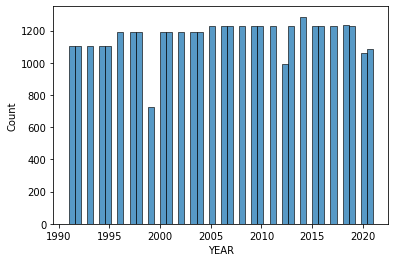

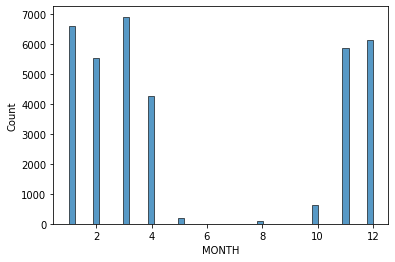

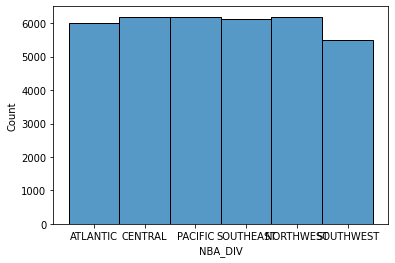

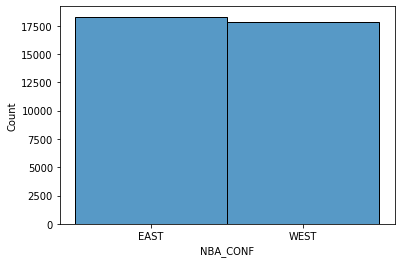

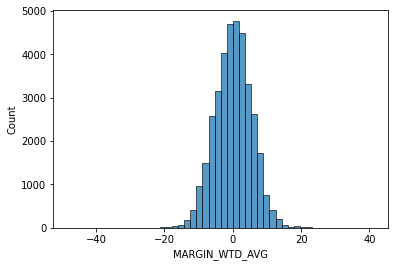

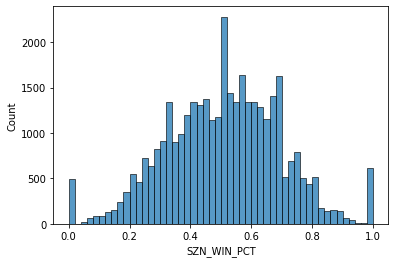

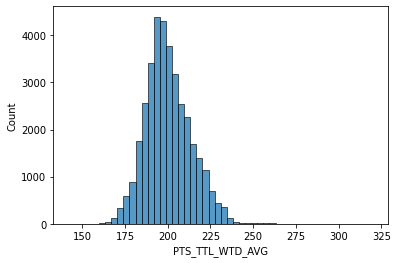

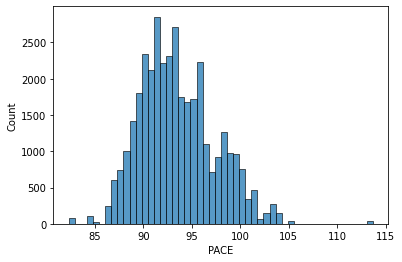

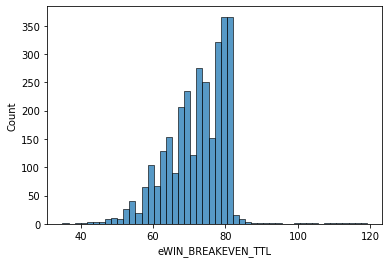

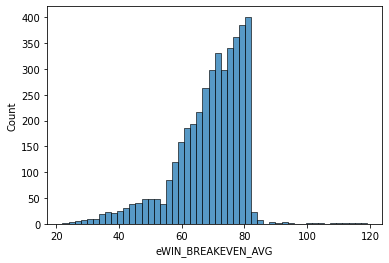

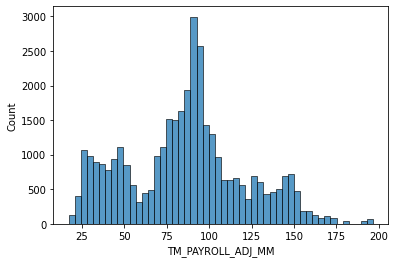

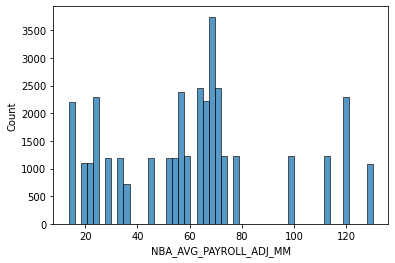

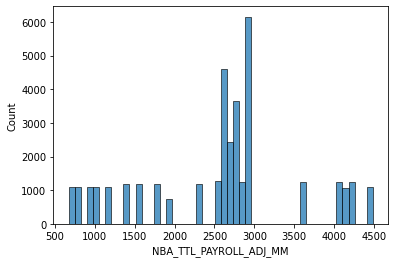

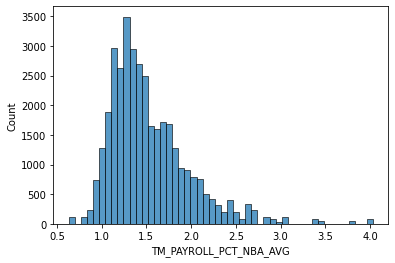

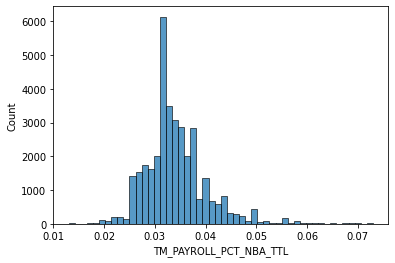

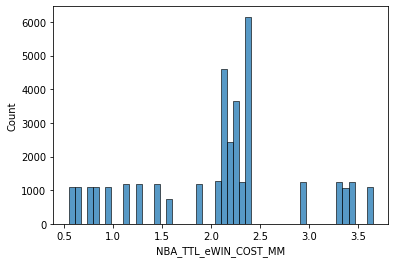

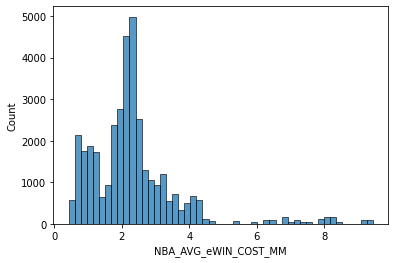

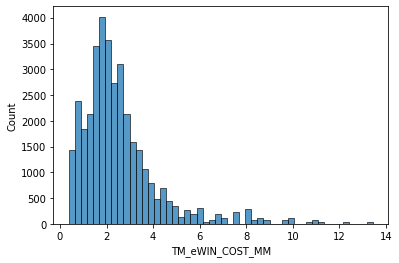

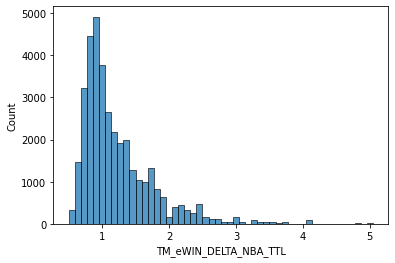

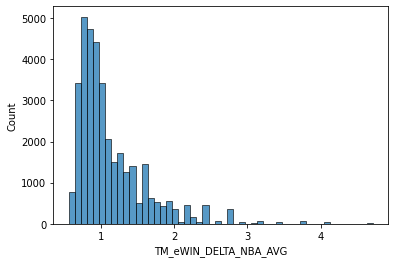

In [ ]:
for c in histogram_matchup_df.columns:
  sns.histplot(reg_szn_test,
               x=c,
               bins=50,
               palette='mako',
               )
  plt.show();

## PDF / CDF

- The mean of the Continuous Uniform distribution is exactly $\frac{b+a}{2}$.
- The mean of the Exponential distribution is exactly $\beta$.
- The mean of the Normal distribution is exactly $\mu$.
- The mean of the Binomial distribution is exactly $np$.
- The mean of the Poisson distribution is exactly $\lambda$.

In [ ]:
# Scipy's uniform distribution has weird parameters

# Our params - reasonable
a = 2
b = 6

# Their params - strange
loc = a # Start of the interval
scale = b-a # Length of the interval

# Make our uniform random variable
unif = st.uniform(loc, scale)

# Plot its pdf
plot_distribution(unif, a-1, b+1, "pdf")

In [ ]:
# and its cdf
plot_distribution(unif, a-1, b+1, "cdf")

In [ ]:
# Thanks to scipy, we can have a sort of random variable object
exp = st.expon(scale=6)
plot_distribution(exp, 0, 60, 'pdf')

In [ ]:
exp = st.expon(scale = 6)
plot_distribution(exp, 0, 60, 'cdf')

In [ ]:
# What is the probability that our next bus shows
# up in 10 minutes or less?
exp.cdf(10)

In [ ]:
# Number of items / observations
a = 5
# Average lifespan / time to observation
scale = 12
gamma = st.gamma(a=a, scale=scale)

# Probability that you go through 5 lightbulbs in less than t months
t = 24
gamma.cdf(t)

# Probability that you go through 5 lightbulbs in longer than t months
1 - gamma.cdf(t)

# HYPOTHESIS TESTING

Draw inferences on a population parameter in two ways: 
1. Estimation 
    * Establish confidence intervals 
2. Hypothesis Testing 
    * Test the process of making decisions about the value of a population parameter

* White Noise - situation where data shows zero correlation between samples

Four steps to hypothesis testing:
1. Construct a null hypothesis that you want to contradict and its complement, the alternative hypothesis.
2. Specify a level of significance.
3. Calculate your test statistic.
4. Find your $p$-value and make a conclusion.

Hypothesis Testing Procedures
1. Set the null and alternate hypothesis (and the type of test).
2. Set the level of significance alpha 𝛼-value. (Default is 0.05 or 5%, similar to the 0.95 confidence level for intervals.)
3. Draw a random sample (or other legitimate samples).
4. Calculate the p-value (or in the old days, the test statistics).
5. Conclude the test on the hypothesis H0/H1 by comparing the p-value and the 𝛼-value. If p < 𝛼, reject the Null H0, and adopt the Alternate H1, based on the data we have. 
6. Make a conclusion and interpretation in the context of the problem. Be careful of the language used. 

Hypothesis Testing Interpretation
1. Make sure the level of significance 𝛼 is set first. Then run the analysis to determine the p-value of the test. 
2. If p < 𝛼, reject the null hypothesis H0. The data present is enough evidence to reject H0 at the set significance level, and we adopt the alternate hypothesis H1.  
    * We have not proven H0 to be false,  
    * Nor have we proven H1 to be true.  
3. If p > 𝛼, we fail to reject the null hypothesis H0.  
    * We have not proven H0 to be true. Just that the current data fail to reject the null at the set significance level. Nothing more.  


* We can have left-tail, two-tail, or right-tail tests: 
      * μ < k / μ ≠ k / μ > k

Today, we overwhelmingly choose to use p-value instead of test statistics (z, t, or the likes) in hypothesis testing. 
Recall that p-value is the probability test statistic will take on values as extreme as (or more than) the observed test statistic (computed from sample data). 


| Situation | Common hypothesis test | Example | Notes |
| --- | --- | --- | --- |
| Testing whether or not one mean is equal to a value | One-sample $t$-test | Do cars on a given road, on average, drive about 65mph? | |
| Testing whether or not two means are equal to eachother | Two-sample $t$-test | Is the mean systolic blood pressure of people who receive Medicine A or Medicine B the same? | |
| Testing whether or not paired observations have the same value | Paired $t$-test | Among heterosexual married couples, is the husband, on average, taller than the wife? | This is functionally the same as a one-sample $t$-test of the differences |
| Testing whether or not three or more means are the same | One-way ANOVA test | Are base salaries upon graduation different for graduates of Penn State, Ohio State, and Michigan? | The ANOVA test has many variants |
| Testing whether or not there is a relationship between two categorical variables | $\chi^2$ test | Is there a relationship between home state and political affiliation? | |
| Testing whether or not a given distribution is normally distributed | Kolmogorov-Smirnov Test | Testing whether or not model residuals are normally distributed. Useful for testing linear regression | |
| Testing whether or not one proportion is equal to a number | One-sample $z$-test | Testing whether or not a coin is fair (ie, testing $P(Heads) = 0.5$) | |
| Testing whether or not two proportions are euqal | Two-sample $z$-test | Who is going to win an election? | Testing two or more proportions can be done better with a $\chi^2$ test |

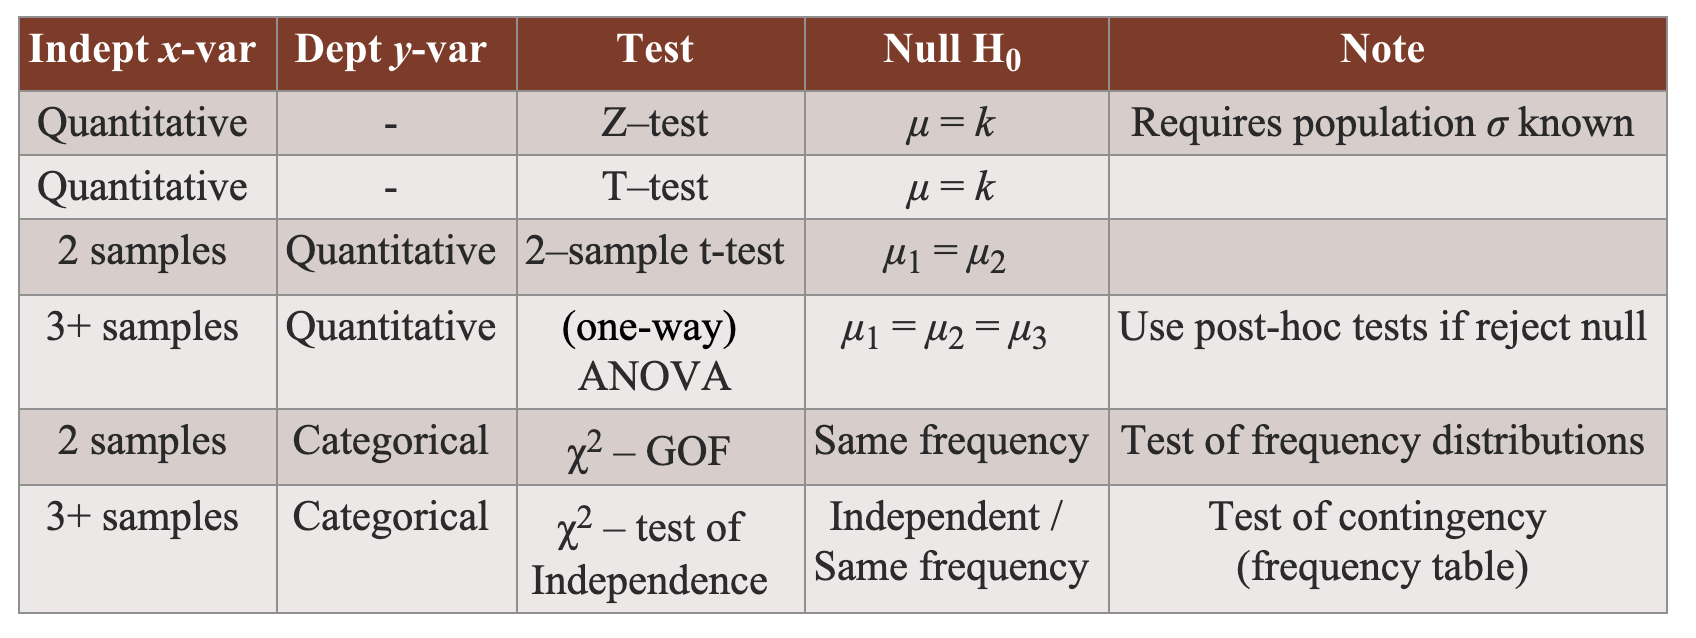

## T-TEST


T-STAT
* Method to quantify the difference between the population means
* In performing any t-test, the difference of the two sample means is used to compute t-statistic


P-VALUE
* P-values are sometimes called the probability of chance. 
* Probability of obtaining a t-statistic value with an absolute value >= observed in sample data (if null hypothesis is actually true)
* LOW P-values are a good indication that your test results are NOT due to chance. 
    * Small P-value = reject null hypothesis (data has some material significance). May also indicate extreme statistics.




* Conclude the test on the hypothesis H0/H1 by comparing the p-value and the 𝛼-value.
	* If p < 𝛼: reject Null H0, adopt Alternate H1
	* To lower both P-value / A-value, increase sample size





* Consider feature interactions through feature interactions
   * T-Tests - examine p-values <0.05
   * Parametric / normal distribution only
	 * Best to remove sample mean from the data?

* Visualize feature interactions
	* Correlation Heatmap
	* Scatterplot


* Type I Error: Rejecting the null hypothesis when the null is true. 
	* False Positive
	* Alpha value - probability that it is false, despite positive result
* Type II Error: Fail to reject the null hypothesis when the null is false. 
	* False Negative 

In [ ]:
reg_szn_test.columns[:99]

Index(['GAME_ID', 'GAME_DATE', 'YEAR', 'SEASON', 'MONTH', 'DAY', 'TM_INDEX',
       'NBA_CONF', 'NBA_DIV', 'TEAM_NAME_HOME', 'MATCHUP_HOME', 'TM_CODE_HOME',
       'TM_CODE_AWAY', 'TEAM_ID_HOME', 'TEAM_ID_AWAY', 'SZN_CHAMP',
       'SZN_WIN_PCT', 'T3_WIN_PCT', 'T5_WIN_PCT', 'T7_WIN_PCT', 'T10_WIN_PCT',
       'TM_PAYROLL_MM', 'TM_PAYROLL_ADJ_MM', 'NBA_AVG_PAYROLL_MM',
       'NBA_TTL_PAYROLL_MM', 'NBA_AVG_PAYROLL_ADJ_MM',
       'NBA_TTL_PAYROLL_ADJ_MM', 'TM_PAYROLL_PCT_NBA_AVG',
       'TM_PAYROLL_PCT_NBA_TTL', 'NBA_TTL_eWIN_COST_MM',
       'NBA_AVG_eWIN_COST_MM', 'TM_eWIN_COST_MM', 'TM_eWIN_DELTA_NBA_TTL',
       'TM_eWIN_DELTA_NBA_AVG', 'ODDS_TOTAL', 'ODDS_ML', 'HOME_JH_GS', 'PACE',
       'TTL_GM_COUNT', 'H_GM_COUNT', 'A_GM_COUNT', 'WL_HOME', 'WL_AWAY',
       'SZN_TTL_WIN', 'SZN_HOME_WIN', 'SZN_AWAY_WIN', 'SZN_TTL_LOSS',
       'SZN_HOME_LOSS', 'SZN_AWAY_LOSS', 'PTS_TTL', 'PTS_TTL_WTD_AVG',
       'PTS_TTL_HOME_AVG', 'PTS_TTL_AWAY_AVG', 'PTS_TM_AVG', 'PTS_HOME_AVG',
       'PTS_A

### FEATURES

In [ ]:
# Separate data into two separate vectors

ttest_variables = ['MARGIN_WTD_AVG', 'TM_PAYROLL_PCT_NBA_TTL', 'TM_PAYROLL_PCT_NBA_AVG', 
                   'AST/TOV_PCT_NET', #'AST/TOV_PCT_TTL',  
                   'STOCKS/TOV_NET', #'STOCKS/TOV_PCT_NET', 
                   
                   #'PTS_TTL_WTD_AVG', 'PACE',
                   #'SZN_WIN_PCT', 'T10_WIN_PCT', 'T7_WIN_PCT', 'T5_WIN_PCT', 'T3_WIN_PCT',
                   #'eFG_PCT_TTL', 'TS_PCT_TTL',
                   
                   #'STOCKS_TTL', 'TOV_TTL', #'PF_TTL', 
                   #'NBA_AVG_PAYROLL_ADJ', 'NBA_TTL_PAYROLL_ADJ',
                    'TM_eWIN_COST',
                    #'NBA_AVG_eWIN_COST',
                   # 'TM_PAYROLL', 'NBA_AVG_PAYROLL', 'NBA_TTL_PAYROLL',
                   
                    
                   #'NBA_TTL_eWIN_COST', 
                   'TM_eWIN_DELTA_NBA_TTL', 'TM_eWIN_DELTA_NBA_AVG', 
                   ]

In [ ]:
ttest_test_dict = {}
NBA_avg_matchups_df = pd.DataFrame()
champion_matchups_df = pd.DataFrame()



for h in ttest_variables:
  
  NBA_avg_matchups_df[f'{h}'] = reg_szn_test.loc[reg_szn_test['SZN_CHAMP'] == 0, h]
  champion_matchups_df[f'{h}'] = reg_szn_test.loc[reg_szn_test['SZN_CHAMP'] == 1, h]  
  ttest_test_dict[f'{h}'] = st.ttest_ind(NBA_avg_matchups_df[h], champion_matchups_df[h], equal_var=False)
  
  
  ttest_stat_df = pd.DataFrame(data=ttest_test_dict.values(), index=ttest_test_dict.keys(), columns=['T_STAT', 'P_VALUE'])
  ttest_stat_df['T_STAT'] = round(ttest_stat_df['T_STAT'], 2)
  ttest_stat_df['P_VALUE'] = round(ttest_stat_df['P_VALUE'], 5)


ttest_stat_df = ttest_stat_df.sort_values(by='T_STAT', ascending=True) #'P_VALUE'



In [ ]:
# ttest_stat_df[ttest_stat_df['P_VALUE'] <= .05]
ttest_stat_df

,T_STAT,P_VALUE
MARGIN_WTD_AVG,-72.53,0.00
TM_PAYROLL_PCT_NBA_TTL,-15.98,0.00
TM_PAYROLL_PCT_NBA_AVG,-11.78,0.00
AST/TOV_PCT_NET,-11.31,0.00
STOCKS/TOV_NET,-9.45,0.00
TM_eWIN_COST,26.62,0.00
TM_eWIN_DELTA_NBA_TTL,48.07,0.00
TM_eWIN_DELTA_NBA_AVG,141.59,0.00


In [ ]:
  # ttest_second_df = pd.DataFrame(data=reg_szn_test, index=ttest_main_dict.keys(), columns=['NBA_AVG', 'CHAMPION'])
pd.set_option('display.float_format', lambda x: '%.2f' % x)
ttest_NBA_champion_comp = pd.DataFrame(round(NBA_avg_matchups_df.mean(),3), index=ttest_test_dict.keys(), columns=['NBA_AVG']) #, 'CHAMPION'
ttest_NBA_champion_comp['CHAMPION'] = round(champion_matchups_df.mean(),3)#, index=ttest_test_dict.keys(), columns=) #, 'CHAMPION'
ttest_NBA_champion_comp

,NBA_AVG,CHAMPION
MARGIN_WTD_AVG,-0.14,7.64
TM_PAYROLL_PCT_NBA_TTL,0.03,0.04
TM_PAYROLL_PCT_NBA_AVG,1.52,1.74
AST/TOV_PCT_NET,0.15,0.46
STOCKS/TOV_NET,0.98,3.40
TM_eWIN_COST,2585461.87,1750421.06
TM_eWIN_DELTA_NBA_TTL,1.23,0.84
TM_eWIN_DELTA_NBA_AVG,1.15,0.69


In [ ]:

# ttest_avg_dict = {}
# ttest_champ_dict = {}
# NBA_champ_comp_df = pd.DataFrame() #index=ttest_test_dict.keys(), columns=['NBA_AVG', 'CHAMPION']

# for s in ttest_variables:
  # ttest_avg_dict[f'{h}'] = round(NBA_avg_matchups_df[h].mean(), 3)
  # ttest_champ_dict[f'{h}'] = round(champion_matchups_df[h].mean(), 3)
  # NBA_champ_comp_df = pd.DataFrame(data=ttest_champ_dict.values(), index=ttest_champ_dict.keys(), columns=['CHAMPION']) #'NBA_AVG', 
  # NBA_champ_comp_df['NBA_AVG'] = round(NBA_avg_matchups_df[s].mean(), 3)
  # NBA_champ_comp_df['CHAMPION'] = round(champion_matchups_df[s].mean(), 3)
  

  # ttest_stat_df['NBA_AVG'] = (f'{NBA_avg_matchups_df[h].mean():.3f}')
  # ttest_stat_df['CHAMPION'] = (f'{champion_matchups_df[h].mean():.3f}')





  #   for i, j in ttest_test_dict[k].values():
  #     ttest_stat_df['T_STAT'] = [i]
  #     ttest_stat_df['P_VALUE'] = ttest_test_dict[j]

  # ttest_stat_df = pd.DataFrame(data=ttest_stat_dict.keys(), index=ttest_stat_dict.values(), columns=['T_STAT', 'P_VALUE'])

  # NBA_avg_matchups_df.mean()
# for h in ttest_variables:
#   print(NBA_avg_matchups_df[h].mean())

# for h in ttest_variables:
#   ttest_stat_df['NBA_AVG'] = round(NBA_avg_matchups_df[h].mean(), 3)
#   ttest_stat_df['CHAMPION'] = round(champion_matchups_df[h].mean(), 3)

In [ ]:
# print(f'CHAMPION vs. NBA AVG - {h}:')
  # print(f'NBA AVG: {NBA_avg_matchups_df[h].mean():.3f}')
  # print(f'CHAMPION: {champion_matchups_df[h].mean():.3f}')
  # print('*'*50)

# NBA_avg_matchups_df.mean()

,NBA_AVG,CHAMPION
MARGIN_WTD_AVG,-0.137942,7.643700
SZN_WIN_PCT,0.495472,0.753901
PTS_TTL_WTD_AVG,200.144488,199.370113
PACE,93.520100,93.347900
eFG_PCT_TTL,0.495188,0.497544
TS_PCT_TTL,0.570723,0.569481
AST/TOV_PCT_TTL,1.596439,1.624900
AST/TOV_PCT_NET,0.149476,0.460815
STOCKS/TOV_NET,0.980630,3.402262
STOCKS/TOV_PCT_NET,0.066446,0.237099


### RESULTS

In [ ]:
# ttest_stat_df['METRIC'] = ttest_stat_df.index
ttest_stat_df

,T_STAT,P_VALUE
MARGIN_WTD_AVG,-72.53,0.00000
TM_eWIN_COST_MM,26.62,0.00000
NBA_AVG_eWIN_COST_MM,-5.63,0.00000
TM_PAYROLL_PCT_NBA_TTL,-15.98,0.00000
TM_PAYROLL_PCT_NBA_AVG,-11.78,0.00000
TM_PAYROLL_ADJ_MM,-8.29,0.00000
TM_PAYROLL_MM,-5.79,0.00000
PF_TTL,4.84,0.00000
TM_eWIN_DELTA_NBA_TTL,48.07,0.00000
TM_eWIN_DELTA_NBA_AVG,141.59,0.00000


In [ ]:
# ttest_final_df = pd.concat([ttest_master_df, ttest_second_df])
ttest_master_df['NBA_AVG'] = ttest_master_df['METRIC'].map(ttest_second_df)
print(ttest_master_df)


# cluster_wtdpos_WS['color_sc'] = cluster_wtdpos_WS['cluster'].map(lambda p: colors_sc[p])

ValueError: ignored

In [ ]:
#ttest_main_dict['TOV_TTL']
ttest_main_dict.values()

dict_values([Ttest_indResult(statistic=-72.53267725348529, pvalue=0.0), Ttest_indResult(statistic=-76.30313637867697, pvalue=0.0), Ttest_indResult(statistic=2.0147126039236025, pvalue=0.04413636223700512), Ttest_indResult(statistic=-1.6384537101187742, pvalue=0.10156529340503664), Ttest_indResult(statistic=0.8641514883514483, pvalue=0.3876610471188848), Ttest_indResult(statistic=-2.0521634396290263, pvalue=0.040350049554525313), Ttest_indResult(statistic=-11.310814418711827, pvalue=2.213663148414368e-28), Ttest_indResult(statistic=-9.446347814048162, pvalue=1.5231165316198647e-20), Ttest_indResult(statistic=-8.659782902001089, pvalue=1.352835301165129e-17), Ttest_indResult(statistic=-1.9513566867381185, pvalue=0.05122510963188984), Ttest_indResult(statistic=-0.45465184165901407, pvalue=0.6494339131353489), Ttest_indResult(statistic=4.8357117818268955, pvalue=1.4814919263992465e-06)])

In [ ]:
ttest_champion_df

,,T_STAT,P_VALUE
-72.532677,0.000000e+00,NaN,NaN
-76.303136,0.000000e+00,NaN,NaN
2.014713,4.413636e-02,NaN,NaN
-1.638454,1.015653e-01,NaN,NaN
0.864151,3.876610e-01,NaN,NaN
-2.052163,4.035005e-02,NaN,NaN
-11.310814,2.213663e-28,NaN,NaN
-9.446348,1.523117e-20,NaN,NaN
-8.659783,1.352835e-17,NaN,NaN
-1.951357,5.122511e-02,NaN,NaN


In [ ]:
print(NBA_avg_matchups_df.info())
print('*'*200)
print(champion_matchups_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34951 entries, 0 to 36188
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   MARGIN_WTD_AVG_NBA      34951 non-null  float64
 1   SZN_WIN_PCT_NBA         34951 non-null  float64
 2   PTS_TTL_WTD_AVG_NBA     34951 non-null  float64
 3   eFG_PCT_TTL_NBA         34951 non-null  float64
 4   TS_PCT_TTL_NBA          34951 non-null  float64
 5   AST/TOV_PCT_TTL_NBA     34951 non-null  float64
 6   AST/TOV_PCT_NET_NBA     34951 non-null  float64
 7   STOCKS/TOV_NET_NBA      34951 non-null  int64  
 8   STOCKS/TOV_PCT_NET_NBA  34951 non-null  float64
 9   STOCKS_TTL_NBA          34951 non-null  int64  
 10  TOV_TTL_NBA             34951 non-null  int64  
 11  PF_TTL_NBA              34951 non-null  int64  
dtypes: float64(8), int64(4)
memory usage: 3.5 MB
None
**********************************************************************************************

In [ ]:
# CONDUCT T-TESTS
ttest_avg_MARGIN_WTD_AVG = st.ttest_ind(league_avg_MARGIN_WTD_AVG, champs_avg_MARGIN_WTD_AVG, equal_var=False)
ttest_avg_TTL_PTS = st.ttest_ind(league_avg_PTS_TTL, champs_avg_PTS_TTL, equal_var=False)
ttest_avg_SZN_WIN_PCT = st.ttest_ind(league_avg_SZN_WIN_PCT, champs_avg_SZN_WIN_PCT, equal_var=False)
ttest_avg_eFG = st.ttest_ind(champs_avg_eFG, league_avg_eFG, equal_var=False)
ttest_avg_TS = st.ttest_ind(champs_avg_TS, league_avg_TS, equal_var=False)
ttest_avg_AST_TOV_PCT_TTL = st.ttest_ind(league_avg_AST_TOV_PCT_TTL, champs_avg_AST_TOV_PCT_TTL, equal_var=False)
ttest_avg_AST_TOV_PCT_NET = st.ttest_ind(league_avg_AST_TOV_PCT_NET, champs_avg_AST_TOV_PCT_NET, equal_var=False)
ttest_avg_STOCKS_TTL = st.ttest_ind(league_avg_STOCKS_TTL, champs_avg_STOCKS_TTL, equal_var=False)
ttest_avg_TOV_TTL = st.ttest_ind(league_avg_TOV_TTL, champs_avg_TOV_TTL, equal_var=False)
ttest_avg_STOCKS_TOV_NET = st.ttest_ind(league_avg_STOCKS_TOV_NET, champs_avg_STOCKS_TOV_NET, equal_var=False)
ttest_avg_STOCKS_TOV_PCT_NET = st.ttest_ind(league_avg_STOCKS_TOV_PCT_NET, champs_avg_STOCKS_TOV_PCT_NET, equal_var=False)
ttest_avg_PF_TTL = st.ttest_ind(league_avg_PF_TTL, champs_avg_PF_TTL, equal_var=False)

In [ ]:
ttest_stat_dict = {ttest_avg_MARGIN_WTD_AVG: 'MARGIN_WTD_AVG', ttest_avg_TTL_PTS:'TTL_PTS', ttest_avg_SZN_WIN_PCT:'SZN_WIN_PCT',
                   ttest_avg_eFG:'eFG%', ttest_avg_TS:'TS%',
                   ttest_avg_AST_TOV_PCT_TTL:'AST_TOV_PCT_TTL', ttest_avg_AST_TOV_PCT_NET:'AST_TOV_PCT_NET', 
                   ttest_avg_STOCKS_TTL:'STOCKS_TTL', ttest_avg_TOV_TTL:'TOV_TTL',
                   ttest_avg_STOCKS_TOV_NET:'STOCKS_TOV_NET', ttest_avg_STOCKS_TOV_PCT_NET:'STOCKS_TOV_PCT_NET',
                   ttest_avg_PF_TTL:'PF_TTL',
                   }

ttest_stat_list = [ttest_avg_MARGIN_WTD_AVG, ttest_avg_TTL_PTS, ttest_avg_SZN_WIN_PCT,
                   ttest_avg_eFG, ttest_avg_TS,
                   ttest_avg_AST_TOV_PCT_TTL, ttest_avg_AST_TOV_PCT_NET, 
                   ttest_avg_STOCKS_TTL, ttest_avg_TOV_TTL,
                   ttest_avg_STOCKS_TOV_NET, ttest_avg_STOCKS_TOV_PCT_NET,
                   ttest_avg_PF_TTL]                   

In [ ]:
ttest_stats_df = pd.DataFrame(data=ttest_stat_dict.keys(), index=ttest_stat_dict.values(), columns=['T_STAT', 'P_VALUE']) #index=ttest_stat_list.unique(), columns=['T_STAT', 'P_VALUE']

ttest_stats_df['T_STAT'] = round(ttest_stats_df['T_STAT'], 2)
ttest_stats_df['P_VALUE'] = round(ttest_stats_df['P_VALUE'], 5)
ttest_stats_df.sort_values(by='P_VALUE', ascending=True)

,T_STAT,P_VALUE
MARGIN_WTD_AVG,-72.53,0.00000
SZN_WIN_PCT,-76.30,0.00000
AST_TOV_PCT_NET,-11.31,0.00000
STOCKS_TOV_NET,-9.45,0.00000
STOCKS_TOV_PCT_NET,-8.66,0.00000
PF_TTL,4.84,0.00000
AST_TOV_PCT_TTL,-2.05,0.04035
TTL_PTS,2.01,0.04414
STOCKS_TTL,-1.95,0.05123
eFG%,1.64,0.10157


In [ ]:
# TTEST_league_avg_list = [league_avg_MARGIN_WTD_AVG, league_avg_PTS_TTL, league_avg_SZN_WIN_PCT,
#                          league_avg_eFG, league_avg_TS,
#                          league_avg_AST_TOV_PCT_TTL, league_avg_AST_TOV_PCT_NET,
#                          league_avg_STOCKS_TTL, league_avg_TOV_TTL,
#                          league_avg_STOCKS_TOV_NET, league_avg_STOCKS_TOV_PCT_NET,
#                          league_avg_PF_TTL,]
                         
# TTEST_champion_avg_list = [champs_avg_MARGIN_WTD_AVG, champs_avg_PTS_TTL, champs_avg_SZN_WIN_PCT,
#                            champs_avg_eFG, champs_avg_TS, 
#                          champs_avg_AST_TOV_PCT_TTL, champs_avg_AST_TOV_PCT_NET,
#                          champs_avg_STOCKS_TTL, champs_avg_TOV_TTL,
#                          champs_avg_STOCKS_TOV_NET, champs_avg_STOCKS_TOV_PCT_NET,
#                          champs_avg_PF_TTL,] 

# TTEST_league_champs_list = [league_avg_MARGIN_WTD_AVG, champs_avg_MARGIN_WTD_AVG,
#                          league_avg_PTS_TTL, champs_avg_PTS_TTL,
#                          league_avg_SZN_WIN_PCT, champs_avg_SZN_WIN_PCT,  
#                          league_avg_eFG, champs_avg_eFG,
#                          league_avg_TS, champs_avg_TS, 
#                          league_avg_AST_TOV_PCT_TTL, champs_avg_AST_TOV_PCT_TTL, 
#                          league_avg_AST_TOV_PCT_NET, champs_avg_AST_TOV_PCT_NET,
#                          league_avg_STOCKS_TTL, champs_avg_STOCKS_TTL, 
#                          league_avg_TOV_TTL, champs_avg_TOV_TTL,
#                          league_avg_STOCKS_TOV_NET, champs_avg_STOCKS_TOV_NET,
#                          league_avg_STOCKS_TOV_PCT_NET, champs_avg_STOCKS_TOV_PCT_NET,
#                          league_avg_PF_TTL, champs_avg_PF_TTL,]

# TTEST_league_avg_list
# TTEST_result_df = pd.DataFrame()
# for k in TTEST_league_avg_list:
#   TTest_result_df[k] = st.ttest_ind(champs_avg_margin, league_avg_margin, equal_var=False)

# TTEST_result_df

## F-TEST

* This is the F–test, using the F–distribution. (Same as the t-test if we only have 2 samples, with F = t2 ) 
    * Essentially the same as regression just modified to be used for multiple layer factor variables 
    * P-values being high or low depends on specific F-Distribution parameters (degrees of freedom)
    * Greater degrees of freedom = Move closer to normal distribution


## ANOVA

ANalysis Of VAriance (ANOVA)

* ANOVA: compare means among different groups 
* Anova Test - one categorical variable
    * Cat vs Quant
* With greater than two variables, we must apply ANOVA test:
    * By comparing the "between-group" variance and the "within-group" variance, we can conclude whether the different groups (or treatments) have different means. 
    * useful for identifying high-impact variables
    * Dependent variable must be quantitative 
    * Independent "variable" must be factor variable
    * One-way ANOVA compares three or more sample (or layers) means, to see if they have the same mean (H0) 

* Tukey’s HSD Procedure
    * Sampling pairwise
    * Only necessary if rejecting null hypothesis

* Assumptions for One-way ANOVA  
1. Normality: The values in each group are normally distributed. 
2. Homogeneity of variances: The variance within each group should be equal for all groups. (Alternatives: Levene’s, Modified Levene’s, Bartlett's test)  
3. Independence of error: The error (variation of each value around its own group mean) should be independent for each value. (Assumed when data selected at random)

In [ ]:
fvalue, pvalue = stats.f_oneway(df['A'], df['B'], df['C'], df['D'])
print(fvalue, pvalue)
# 17.492810457516338 2.639241146210922e-05



In [ ]:
# get ANOVA table as R like output
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Ordinary Least Squares (OLS) model
model = ols('value ~ C(treatments)', data=df_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

## CORR. COEF.

In [ ]:
np.corrcoef(bike.temp, bike.atemp)

## CHI-SQUARED

Chi-Square
* Chi square: compare frequencies / proportions among different groups 
    * View variance between observed / expected values in comparison tables across columns / rows
    * Tests of Frequency Distribution:
        * Goodness of Fit (GOF) 
            * Always right-tailed for Goodness of Fit (similar to ANOVA)
        * Test of Independence and Homogeneity 
* Degrees of Freedom = (# of Categories - 1)
* Multi-Dimension DoF = (# of Row - 1) * (# of Col - 1)

* Chi Square Test - two categorical variables
    * Cat vs Cat
    * ‘Test of Independence’ between two variables
    * Frequency distributions across rows

## VIF

* Variance Inflation Factor - identify multicollinearity
    * Eliminate variable(s) to reduce coefficient uncertainty
    * R^2 = Coefficient of Determination
    * Variance tables - similar to excel sensitivity tables(???)

* VIF Evaluation:
    * vif = 1 : not correlated 
    * 1 < vif < 5 : mildly correlated, acceptable 
    * 5 < vif < 10 : moderately correlated, we'll accept it in this class 
    * vif > 10 : highly correlated, not acceptable 

# FINAL PREZ

In [ ]:
NBA_avg_matchups_df.columns

Index(['MARGIN_WTD_AVG', 'TM_PAYROLL_PCT_NBA_TTL', 'TM_PAYROLL_PCT_NBA_AVG',
       'AST/TOV_PCT_NET', 'STOCKS/TOV_NET', 'TM_eWIN_COST',
       'TM_eWIN_DELTA_NBA_TTL', 'TM_eWIN_DELTA_NBA_AVG'],
      dtype='object')

In [ ]:
violin_STOCKS_TOV_PCT = px.bar(data_frame=reg_szn_test,
                        x=reg_szn_test['YEAR'],
                        y=reg_szn_test['TM_PAYROLL_PCT_NBA_TTL'], #
                        color=reg_szn_test['NBA_DIV'],     # EXPERIENCE AGE MP APE
                        # color_continuous_scale=Tropic,
                        color_discrete_sequence=Tropic,
                        # color_continuous_midpoint=10,
                        # color_discrete_map=team_logos_dict,
                        # hover_name=reg_szn_avg['W/L%'],
                        # hover_data=reg_szn_avg[['YEAR', 'W/L%']], #'WS/$',
                        title='NBA TM_PAYROLL_PCT_NBA_TTL (BY DIVISION)',
                        labels=chart_labels,
                        range_x=[1990,2021],
                        height=750,
                        width=1000,
                              )

line_STOCKS_TOV_PCT_NBA_AVG = go.Scatter(x=reg_szn_test['YEAR'],
                             y=NBA_avg_matchups_df['TM_PAYROLL_PCT_NBA_TTL'],
                             line_color='#000000', #'#E03A3E','#C1D32F','#26282A'  '#FFFFFF'
                             yaxis='y',
                             mode='lines+markers', #'lines'
                             name='NBA AVG',
                             )
line_STOCKS_TOV_PCT_CHAMP = go.Scatter(x=reg_szn_test['YEAR'],
                             y=champion_matchups_df['TM_PAYROLL_PCT_NBA_TTL'],
                             line_color='#D4AF37', #'#E03A3E','#C1D32F','#26282A'  '#FFFFFF'
                             yaxis='y',
                             mode='lines+markers', #'lines'
                             name='CHAMPION',
                             )

In [ ]:
violin_STOCKS_TOV_PCT.add_trace(line_STOCKS_TOV_PCT_NBA_AVG).add_trace(line_STOCKS_TOV_PCT_CHAMP)
print(violin_STOCKS_TOV_PCT.update_layout(margin=viz_margin_dict, paper_bgcolor=viz_bg_color, font=viz_font_dict).show(renderer="colab"))

None


### POSTER

In [ ]:
## SALARY
bar_WS_salary = px.bar(data_frame=champion_players,
                              x=champion_players['CHAMP'],
                              y=champion_players['SALARY'],
                              color=champion_players['WS'],     # EXPERIENCE AGE MP APE
                              color_continuous_scale=Tropic,
                              color_discrete_sequence=Tropic,
                              # color_continuous_midpoint=10,
                              # color_discrete_map=team_logos_dict,
                              hover_name=champion_players['PLAYER'],
                              hover_data=champion_players[['CHAMP', 'SALARY', 'MP']], #'WS/$',
                              barmode='group',
                              title='WS RELATIVE TO CHAMPIONSHIP TEAM SALARY',
                              labels=chart_labels,
                              # template='simple_white+gridon',
                              # range_x=[1991,2023],
                              # range_y=[0,200000000],
                              height=750,
                            # category_orders={"InternetService": ["DSL", "Fiber optic", "No"],
#                               "gender": ["Female", "Male"]})
                              )





## BACKGROUND DEMO
ncaa_college_histogram = px.histogram(data_frame=champion_players,
                                  #  x=champion_players['CHAMP'],
                                   y=champion_players['CHAMP'],
                                   color=champion_players['CONFERENCE'],
                                  #  color_continuous_scale=Tropic,
                                   color_discrete_sequence=Tropic,
                                  #  color_continuous_midpoint=0,
                                   # color_discrete_map=team_logos_dict,
                                   hover_name=champion_players['PLAYER'],
                                   hover_data=champion_players[['CHAMP', 'SALARY', 'MP', 'COLLEGE', 'SALARY', 'COLLEGE', 'CONFERENCE']],
                                   barmode='group',
                                   title='NCAA COLLEGES REPRESENTED ON NBA CHAMPIONSHIP ROSTERS',
                                   labels=chart_labels,
                                   orientation='h',
                                   height=750,
                                   width=1000,
                                   )


global_region_histogram = px.histogram(data_frame=champion_players,
                                  #  x=champion_players['CHAMP'],
                                   y=champion_players['CHAMP'],
                                   color=champion_players['GLOBAL REGION'],
                                  #  color_continuous_scale=Tropic,
                                   color_discrete_sequence=Tropic,
                                  #  color_continuous_midpoint=0,
                                   # color_discrete_map=team_logos_dict,
                                   hover_name=champion_players['PLAYER'],
                                   hover_data=champion_players[['CHAMP', 'SALARY', 'MP', 'SALARY', 'CONTINENT', 'GLOBAL REGION', 'COUNTRY', ]],
                                   barmode='group',
                                   title='GLOBAL REGIONS REPRESENTED ON NBA CHAMPIONSHIP ROSTERS',
                                   labels=chart_labels,
                                   orientation='h',
                                   height=750,
                                   width=1000,
                                   )


global_region_histogram = px.histogram(data_frame=champion_players,
                                  #  x=champion_players['CHAMP'],
                                   y=champion_players['CHAMP'],
                                   color=champion_players['GLOBAL REGION'],
                                  #  color_continuous_scale=Tropic,
                                   color_discrete_sequence=Tropic,
                                  #  color_continuous_midpoint=0,
                                   # color_discrete_map=team_logos_dict,
                                   hover_name=champion_players['PLAYER'],
                                   hover_data=champion_players[['CHAMP', 'SALARY', 'MP', 'SALARY', 'CONTINENT', 'GLOBAL REGION', 'COUNTRY', ]],
                                   barmode='group',
                                   title='GLOBAL REGIONS REPRESENTED ON NBA CHAMPIONSHIP ROSTERS',
                                   labels=chart_labels,
                                   orientation='h',
                                   height=750,
                                   width=1000,
                                   )

continent_histogram = px.histogram(data_frame=champion_players,
                                  #  x=champion_players['CHAMP'],
                                   y=champion_players['CHAMP'],
                                   color=champion_players['CONTINENT'],
                                  #  color_continuous_scale=Tropic,
                                   color_discrete_sequence=Tropic,
                                  #  color_continuous_midpoint=0,
                                   # color_discrete_map=team_logos_dict,
                                   hover_name=champion_players['PLAYER'],
                                   hover_data=champion_players[['CHAMP', 'SALARY', 'MP', 'SALARY', 'CONTINENT', 'GLOBAL REGION', 'COUNTRY', ]],
                                   barmode='group',
                                   title='GLOBAL REGIONS REPRESENTED ON NBA CHAMPIONSHIP ROSTERS',
                                   labels=chart_labels,
                                   orientation='h',
                                   height=750,
                                   width=1000,
                                   )

In [ ]:
scatter_WL_avg = px.line(data_frame=reg_szn_avg_Div,
                        x=reg_szn_avg_Div['YEAR'],
                        y=reg_szn_avg_Div['W/L%'], #
                        color=reg_szn_avg_Div['NBA_DIV'],     # EXPERIENCE AGE MP APE
                        # color_continuous_scale=Tropic,
                        color_discrete_sequence=Tropic,
                        # color_continuous_midpoint=10,
                        # color_discrete_map=team_logos_dict,
                        # hover_name=reg_szn_avg['W/L%'],
                        # hover_data=reg_szn_avg[['YEAR', 'W/L%']], #'WS/$',
                        title='NBA TEAM WINS/LOSSES (BY DIVISION)',
                        labels=chart_labels,
                        range_x=[1990,2021],
                        height=750,
                        width=1000,
                              )


bar_WL_avg = px.bar(data_frame=reg_szn_avg_Div,
                        x=reg_szn_avg_Div['YEAR'],
                        y=reg_szn_avg_Div['W/L%'], #
                        color=reg_szn_avg_Div['NBA_DIV'],     # EXPERIENCE AGE MP APE
                        # color_continuous_scale=Tropic,
                        color_discrete_sequence=Tropic,
                        # color_continuous_midpoint=10,
                        # color_discrete_map=team_logos_dict,
                        # hover_name=reg_szn_avg['W/L%'],
                        # hover_data=reg_szn_avg[['YEAR', 'W/L%']], #'WS/$',
                        title='NBA TEAM WINS/LOSSES (BY DIVISION)',
                        labels=chart_labels,
                    # barmode='group',
                        range_x=[1990,2021],
                        height=750,
                        width=1000,
                              )



In [ ]:
violin_FG3A_avg = px.violin(data_frame=reg_szn_avg_Div,
                        x=reg_szn_avg_Div['YEAR'],
                        y=reg_szn_avg_Div['FG3A_TTL'], #
                        color=reg_szn_avg_Div['NBA_DIV'],     # EXPERIENCE AGE MP APE
                        # color_continuous_scale=Tropic,
                        color_discrete_sequence=Tropic,
                        # color_continuous_midpoint=10,
                        # color_discrete_map=team_logos_dict,
                        # hover_name=reg_szn_avg['W/L%'],
                        # hover_data=reg_szn_avg[['YEAR', 'W/L%']], #'WS/$',
                        title='NBA TEAM AVG. 3PT FIELD GOAL ATTEMPTS PER GAME (BY DIVISION)',
                        labels=chart_labels,
                        range_x=[1990,2021],
                        height=750,
                        width=1000,
                              )


violin_STOCKS_TOV_PCT = px.violin(data_frame=reg_szn_avg_Div,
                        x=reg_szn_avg['YEAR'],
                        y=reg_szn_avg['STOCKS/TOV_NET'], #
                        color=reg_szn_avg['NBA_DIV'],     # EXPERIENCE AGE MP APE
                        # color_continuous_scale=Tropic,
                        color_discrete_sequence=Tropic,
                        # color_continuous_midpoint=10,
                        # color_discrete_map=team_logos_dict,
                        # hover_name=reg_szn_avg['W/L%'],
                        # hover_data=reg_szn_avg[['YEAR', 'W/L%']], #'WS/$',
                        title='NBA TEAM AVG. STOCKS - TOV PER GAME (BY DIVISION)',
                        labels=chart_labels,
                        range_x=[1990,2021],
                        height=750,
                        width=1000,
                              )

violin_ast_tov_avg = px.violin(data_frame=reg_szn_avg_Div,
                        x=reg_szn_avg_Div['YEAR'],
                        y=reg_szn_avg_Div['AST/TOV%_NET'], #
                        color=reg_szn_avg_Div['NBA_DIV'],     # EXPERIENCE AGE MP APE
                        # color_continuous_scale=Tropic,
                        color_discrete_sequence=Tropic,
                        # color_continuous_midpoint=10,
                        # color_discrete_map=team_logos_dict,
                        # hover_name=reg_szn_avg['W/L%'],
                        # hover_data=reg_szn_avg[['YEAR', 'W/L%']], #'WS/$',
                        title='NBA TEAM AVG. AST/TOV% PER GAME (BY DIVISION)',
                        labels=chart_labels,
                        range_x=[1990,2021],
                        height=750,
                        width=1000,
                              )


violin_FTpct_avg = px.violin(data_frame=reg_szn_avg_Div,
                        x=reg_szn_avg_Div['YEAR'],
                        y=reg_szn_avg_Div['FT_PCT_TTL'], #
                        color=reg_szn_avg_Div['NBA_DIV'],     # EXPERIENCE AGE MP APE
                        # color_continuous_scale=Tropic,
                        color_discrete_sequence=Tropic,
                        # color_continuous_midpoint=10,
                        # color_discrete_map=team_logos_dict,
                        # hover_name=reg_szn_avg['W/L%'],
                        # hover_data=reg_szn_avg[['YEAR', 'W/L%']], #'WS/$',
                        title='NBA TEAM AVG. FREE THROW % PER GAME (BY DIVISION)',
                        labels=chart_labels,
                        range_x=[1990,2021],
                        height=750,
                        width=1000,
                              )


violin_FGpct_avg = px.violin(data_frame=reg_szn_avg_Div,
                        x=reg_szn_avg_Div['YEAR'],
                        y=reg_szn_avg_Div['FG_PCT_TTL'], #
                        color=reg_szn_avg_Div['NBA_DIV'],     # EXPERIENCE AGE MP APE
                        # color_continuous_scale=Tropic,
                        color_discrete_sequence=Tropic,
                        # color_continuous_midpoint=10,
                        # color_discrete_map=team_logos_dict,
                        # hover_name=reg_szn_avg['W/L%'],
                        # hover_data=reg_szn_avg[['YEAR', 'W/L%']], #'WS/$',
                        title='NBA TEAM AVG. FIELD GOAL % PER GAME (BY DIVISION)',
                        labels=chart_labels,
                        range_x=[1990,2021],
                        height=750,
                        width=1000,
                              )

violin_FG3pct_avg = px.violin(data_frame=reg_szn_avg_Div,
                        x=reg_szn_avg_Div['YEAR'],
                        y=reg_szn_avg_Div['FG3_PCT_TTL'], #
                        color=reg_szn_avg_Div['NBA_DIV'],     # EXPERIENCE AGE MP APE
                        # color_continuous_scale=Tropic,
                        color_discrete_sequence=Tropic,
                        # color_continuous_midpoint=10,
                        # color_discrete_map=team_logos_dict,
                        # hover_name=reg_szn_avg['W/L%'],
                        # hover_data=reg_szn_avg[['YEAR', 'W/L%']], #'WS/$',
                        title='NBA TEAM AVG. 3PT FIELD GOAL % PER GAME (BY DIVISION)',
                        labels=chart_labels,
                        range_x=[1990,2021],
                        height=750,
                        width=1000,
                              )


violin_scoring_avg = px.violin(data_frame=reg_szn_avg_Div,
                        x=reg_szn_avg_Div['YEAR'],
                        y=reg_szn_avg_Div['PTS_TTL'], #
                        color=reg_szn_avg_Div['NBA_DIV'],     # EXPERIENCE AGE MP APE
                        # color_continuous_scale=Tropic,
                        color_discrete_sequence=Tropic,
                        # color_continuous_midpoint=10,
                        # color_discrete_map=team_logos_dict,
                        # hover_name=reg_szn_avg['W/L%'],
                        # hover_data=reg_szn_avg[['YEAR', 'W/L%']], #'WS/$',
                        title='NBA TEAM AVG. POINTS/GAME (BY DIVISION)',
                        labels=chart_labels,
                        range_x=[1990,2021],
                        height=750,
                        width=1000,
                              )

violin_WL_avg = px.violin(data_frame=reg_szn_avg_Div,
                        x=reg_szn_avg_Div['YEAR'],
                        y=reg_szn_avg_Div['W/L%'], #
                        color=reg_szn_avg_Div['NBA_DIV'],     # EXPERIENCE AGE MP APE
                        # color_continuous_scale=Tropic,
                        color_discrete_sequence=Tropic,
                        # color_continuous_midpoint=10,
                        # color_discrete_map=team_logos_dict,
                        # hover_name=reg_szn_avg['W/L%'],
                        # hover_data=reg_szn_avg[['YEAR', 'W/L%']], #'WS/$',
                        title='NBA TEAM W/L% (BY DIVISION)',
                        labels=chart_labels,
                        range_x=[1990,2021],
                        height=750,
                        width=1000,
                              )

KeyError: ignored

In [ ]:
## CHAMPION TRACES ##

line_NBA_salary = go.Scatter(x=champion_players['CHAMP'],
                             y=champion_players['NBA TM AVG SAL'],
                             line_color='#000000', #'#E03A3E','#C1D32F','#26282A'  '#FFFFFF'
                             yaxis='y',
                             
                            #  hoverlabel=champion_players['YEAR'],
                            #  hovertext=champion_players['NBA TM AVG SAL'],
                             mode='lines')



line_FG3A_Champ = go.Scatter(x=reg_szn_avg_Champs['YEAR'],
                             y=reg_szn_avg_Champs['FG3A_TTL'],
                             line_color='#D4AF37', #'#E03A3E','#C1D32F','#26282A'  '#FFFFFF'
                             yaxis='y',
                             mode='lines+markers', #'lines'
                             name='NBA CHAMP 3PTA/GM',
                             )


# line_ast_tov_Champ = go.Scatter(x=reg_szn_avg_Champs['YEAR'],
#                              y=reg_szn_avg_Champs['AST/TOV%_NET'],
#                              line_color='#D4AF37', #'#E03A3E','#C1D32F','#26282A'  '#FFFFFF'
#                              yaxis='y',
#                              mode='lines+markers', #'lines'
#                              name='NBA CHAMP AST/TOV%',
#                              )

line_FG3pct_Champ = go.Scatter(x=reg_szn_avg_Champs['YEAR'],
                             y=reg_szn_avg_Champs['FG3_PCT_TTL'],
                             line_color='#D4AF37', #'#E03A3E','#C1D32F','#26282A'  '#FFFFFF'
                             yaxis='y',
                             mode='lines+markers', #'lines'
                             name='NBA CHAMP 3PT%',
                           
                             )

line_FTpct_Champ = go.Scatter(x=reg_szn_avg_Champs['YEAR'],
                             y=reg_szn_avg_Champs['FT_PCT_TTL'],
                             line_color='#D4AF37', #'#E03A3E','#C1D32F','#26282A'  '#FFFFFF'
                             yaxis='y',
                             mode='lines+markers', #'lines'
                             name='NBA CHAMP FT%',
                             )

line_FGpct_Champ = go.Scatter(x=reg_szn_avg_Champs['YEAR'],
                             y=reg_szn_avg_Champs['FG_PCT_TTL'],
                             line_color='#D4AF37', #'#E03A3E','#C1D32F','#26282A'  '#FFFFFF'
                             yaxis='y',
                             mode='lines+markers', #'lines'
                             name='NBA CHAMP FG%',
                             )

line_scoring_Champ = go.Scatter(x=reg_szn_avg_Champs['YEAR'],
                             y=reg_szn_avg_Champs['PTS_TTL'],
                             line_color='#D4AF37', #'#E03A3E','#C1D32F','#26282A'  '#FFFFFF'
                             yaxis='y',
                             mode='lines+markers', #'lines'
                             name='NBA CHAMP PTS/GM',
                             )

# line_WL_Champ = go.Scatter(x=reg_szn_avg_Champs['YEAR'],
#                              y=reg_szn_avg_Champs['W/L%'],
#                              line_color='#D4AF37', #'#E03A3E','#C1D32F','#26282A'  '#FFFFFF'
#                              yaxis='y',
#                              mode='lines+markers', #'lines'
#                              name='NBA CHAMP W/L%',
#                              )

## NBA AVERAGE TRACES ##
line_FG3A_NBA = go.Scatter(x=reg_szn_avg_NBA['YEAR'],
                             y=reg_szn_avg_NBA['FG3A_TTL'],
                             line_color='#000000', #'#E03A3E','#C1D32F','#26282A'  '#FFFFFF'
                             yaxis='y',
                             mode='lines+markers', #'lines'
                             name='NBA AVG 3PTA/GM',
                             )

# line_ast_tov_NBA = go.Scatter(x=reg_szn_avg_NBA['YEAR'],
#                              y=reg_szn_avg_NBA['AST/TOV%_NET'],
#                              line_color='#000000', #'#E03A3E','#C1D32F','#26282A'  '#FFFFFF'
#                              yaxis='y',
#                              mode='lines+markers', #'lines'
#                              name='NBA AVG AST/TOV%',
#                              )


line_FG3pct_NBA = go.Scatter(x=reg_szn_avg_NBA['YEAR'],
                             y=reg_szn_avg_NBA['FG3_PCT_TTL'],
                             line_color='#000000', #'#E03A3E','#C1D32F','#26282A'  '#FFFFFF'
                             yaxis='y',
                             mode='lines+markers', #'lines'
                             name='NBA AVG 3PT%',
                             )


line_FTpct_NBA = go.Scatter(x=reg_szn_avg_NBA['YEAR'],
                             y=reg_szn_avg_NBA['FT_PCT_TTL'],
                             line_color='#000000', #'#E03A3E','#C1D32F','#26282A'  '#FFFFFF'
                             yaxis='y',
                             mode='lines+markers', #'lines'
                             name='NBA AVG FT%',
                             )

line_FGpct_NBA = go.Scatter(x=reg_szn_avg_NBA['YEAR'],
                             y=reg_szn_avg_NBA['FG_PCT_TTL'],
                             line_color='#000000', #'#E03A3E','#C1D32F','#26282A'  '#FFFFFF'
                             yaxis='y',
                             mode='lines+markers', #'lines'
                             name='NBA AVG FG%',
                             )

line_scoring_NBA = go.Scatter(x=reg_szn_avg_NBA['YEAR'],
                             y=reg_szn_avg_NBA['PTS_TTL'],
                             line_color='#000000', #'#E03A3E','#C1D32F','#26282A'  '#FFFFFF'
                             yaxis='y',
                             mode='lines+markers', #'lines'
                             name='NBA AVG PTS/GM',
                             )

# line_WL_NBA = go.Scatter(x=reg_szn_avg_NBA['YEAR'],
#                              y=reg_szn_avg_NBA['W/L%'],
#                              line_color='#000000', #'#E03A3E','#C1D32F','#26282A'  '#FFFFFF'
#                              yaxis='y',
#                              mode='lines+markers', #'lines'
#                              name='NBA AVG W/L%',
#                              )



In [ ]:
print(bar_WS_salary.update_layout(margin=viz_margin_dict, paper_bgcolor=viz_bg_color, font=viz_font_dict).show(renderer="colab"))

None


In [ ]:
print(ncaa_college_histogram.update_layout(margin=viz_margin_dict, paper_bgcolor=viz_bg_color, font=viz_font_dict).show(renderer="colab"))

None


In [ ]:
print(global_region_histogram.update_layout(margin=viz_margin_dict, paper_bgcolor=viz_bg_color, font=viz_font_dict).show(renderer="colab"))

None


In [ ]:
scatter_WL_avg.add_trace(line_WL_Champ).add_trace(line_WL_NBA) #.add_trace(line_FG3A_Champ).add_trace(line_FG3pct_NBA)
print(scatter_WL_avg.update_layout(margin=viz_margin_dict, paper_bgcolor=viz_bg_color, font=viz_font_dict).show(renderer="colab"))

None


In [ ]:
violin_WL_avg.add_trace(line_WL_Champ).add_trace(line_WL_NBA) #.add_trace(line_FG3A_Champ).add_trace(line_FG3pct_NBA)
print(violin_WL_avg.update_layout(margin=viz_margin_dict, paper_bgcolor=viz_bg_color, font=viz_font_dict).show(renderer="colab"))

None


In [ ]:
# print(box_FG3A_avg.show(renderer="colab"))
violin_FG3A_avg.add_trace(line_FG3A_Champ).add_trace(line_FG3A_NBA) #.add_trace(line_FG3A_Champ).add_trace(line_FG3pct_NBA)
print(violin_FG3A_avg.update_layout(margin=viz_margin_dict, paper_bgcolor=viz_bg_color, font=viz_font_dict).show(renderer="colab"))
# , shapes=[go.layout.Shape(viz_border_shape)]


# print(violin_FG3A_avg.update_layout(margin=viz_margin_dict, paper_bgcolor=viz_bg_color,).add_trace(line_FG3A_avg).show(renderer="colab"))

# .update_layout(shapes=[viz_border_shape])

# print(bar_FG3A_avg.show(renderer="colab"))
# print(line_FG3A_avg.show(renderer="colab"))
# print(scatter_FG3A_avg.show(renderer="colab"))
# print(hist_FG3A_avg.show(renderer="colab"))

# newnames = {'col1':'hello', 'col2': 'hi'}
# for_each_trace(lambda t: t.update(name = newnames[t.name])).

None


In [ ]:
violin_ast_tov_avg.add_trace(line_ast_tov_Champ).add_trace(line_ast_tov_NBA) #.add_trace(line_FG3A_Champ).add_trace(line_FG3pct_NBA)
print(violin_ast_tov_avg.update_layout(margin=viz_margin_dict, paper_bgcolor=viz_bg_color, font=viz_font_dict).show(renderer="colab"))

None


In [ ]:
violin_FTpct_avg.add_trace(line_FTpct_Champ).add_trace(line_FTpct_NBA) #.add_trace(line_FG3A_Champ).add_trace(line_FG3pct_NBA)
print(violin_FTpct_avg.update_layout(margin=viz_margin_dict, paper_bgcolor=viz_bg_color, font=viz_font_dict).show(renderer="colab"))

None


In [ ]:
violin_FGpct_avg.add_trace(line_FGpct_Champ).add_trace(line_FGpct_NBA) #.add_trace(line_FG3A_Champ).add_trace(line_FG3pct_NBA)
print(violin_FGpct_avg.update_layout(margin=viz_margin_dict, paper_bgcolor=viz_bg_color, font=viz_font_dict).show(renderer="colab"))

None


In [ ]:
violin_FG3pct_avg.add_trace(line_FG3pct_Champ).add_trace(line_FG3pct_NBA) #.add_trace(line_FG3A_Champ).add_trace(line_FG3pct_NBA)
print(violin_FG3pct_avg.update_layout(margin=viz_margin_dict, paper_bgcolor=viz_bg_color, font=viz_font_dict).show(renderer="colab"))

None


In [ ]:
violin_scoring_avg.add_trace(line_scoring_Champ).add_trace(line_scoring_NBA) #.add_trace(line_FG3A_Champ).add_trace(line_FG3pct_NBA)
print(violin_scoring_avg.update_layout(margin=viz_margin_dict, paper_bgcolor=viz_bg_color, font=viz_font_dict).show(renderer="colab"))

None


#### UNUSED

In [ ]:
## FG3A VISUALS ##
line_FG3A_avg = px.line(data_frame=reg_szn_avg,
                        x=reg_szn_avg['YEAR'],
                        y=reg_szn_avg['FG3A_TTL'], #
                        color=reg_szn_avg['NBA_DIV'],
                        line_group=reg_szn_avg['NBA_CONF'],
                        # EXPERIENCE AGE MP APE
                        # color_continuous_scale=Tropic,
                        color_discrete_sequence=Dense,
                        # color_continuous_midpoint=10,
                        # color_discrete_map=team_logos_dict,
                        # hover_name=reg_szn_avg['W/L%'],
                        # hover_data=reg_szn_avg[['YEAR', 'W/L%']], #'WS/$',
                        title='TEAM AVG. 3PT FIELD GOAL ATTEMPTS PER GAME (BY NBA DIVISION)',
                        labels=chart_labels,
                        range_x=[1990,2020],
                        # range_y=[0,200000000],
                        height=750,
                        width=1000,
                              )


bar_FG3A_avg = px.bar(data_frame=reg_szn_avg,
                        x=reg_szn_avg['YEAR'],
                        y=reg_szn_avg['FG3A_TTL'], #
                        color=reg_szn_avg['NBA_DIV'],     # EXPERIENCE AGE MP APE
                        # color_continuous_scale=Tropic,
                        color_discrete_sequence=Tropic,
                        # color_continuous_midpoint=10,
                        # color_discrete_map=team_logos_dict,
                        # hover_name=reg_szn_avg['W/L%'],
                        # hover_data=reg_szn_avg[['YEAR', 'W/L%']], #'WS/$',
                        title='TEAM AVG. 3PT FIELD GOAL ATTEMPTS PER GAME (BY NBA DIVISION)',
                        labels=chart_labels,
                        # range_x=[1991,2023],
                        # range_y=[0,200000000],
                        height=750,
                        width=1000,
                              )


box_FG3A_avg = px.box(data_frame=reg_szn_avg,
                        x=reg_szn_avg['YEAR'],
                        y=reg_szn_avg['FG3A_TTL'], #
                        color=reg_szn_avg['NBA_DIV'],     # EXPERIENCE AGE MP APE
                        # color_continuous_scale=Tropic,
                        color_discrete_sequence=Tropic,
                        # color_continuous_midpoint=10,
                        # color_discrete_map=team_logos_dict,
                        # hover_name=reg_szn_avg['W/L%'],
                        # hover_data=reg_szn_avg[['YEAR', 'W/L%']], #'WS/$',
                        title='TEAM AVG. 3PT FIELD GOAL ATTEMPTS PER GAME (BY NBA DIVISION)',
                        labels=chart_labels,
                        range_x=[1990,2021],
                        height=750,
                        width=1000,
                              )



hist_FG3A_avg = px.histogram(data_frame=reg_szn_avg,
                        x=reg_szn_avg['YEAR'],
                        y=reg_szn_avg['FG3A_TTL'], #
                        color=reg_szn_avg['NBA_DIV'],     # EXPERIENCE AGE MP APE
                        # color_continuous_scale=Tropic,
                        color_discrete_sequence=Tropic,
                        # color_continuous_midpoint=10,
                        # color_discrete_map=team_logos_dict,
                        # hover_name=reg_szn_avg['W/L%'],
                        # hover_data=reg_szn_avg[['YEAR', 'W/L%']], #'WS/$',
                        title='TEAM AVG. 3PT FIELD GOAL ATTEMPTS PER GAME (BY NBA DIVISION)',
                        labels=chart_labels,
                        range_x=[1990,2021],
                        height=750,
                        width=1000,
                              )

scatter_FG3A_avg = px.scatter(data_frame=reg_szn_avg,
                        x=reg_szn_avg['YEAR'],
                        y=reg_szn_avg['FG3A_TTL'], #
                        color=reg_szn_avg['NBA_DIV'],  #'TM_CODE'   # EXPERIENCE AGE MP APE
                        color_continuous_scale=Tropic,
                        color_discrete_sequence=Tropic,
                        # color_continuous_midpoint=10,
                        # color_discrete_map=team_logos_dict,
                        hover_name=reg_szn_avg.index,
                        hover_data=reg_szn_avg[['YEAR', 'W/L%']], #'WS/$',
                        title='TEAM AVG. 3PT FIELD GOAL ATTEMPTS PER GAME (BY NBA DIVISION)',
                        labels=chart_labels,
                        range_x=[1990,2021],
                        height=750,
                        width=1000,
                              )

In [ ]:
# print(box_pace_avg.show(renderer="colab"))
print(violin_pace_avg.show(renderer="colab"))
# print(bar_pace_avg.show(renderer="colab"))
# print(line_pace_avg.show(renderer="colab"))
# print(scatter_pace_avg.show(renderer="colab"))
# print(hist_pace_avg.show(renderer="colab"))

None


In [ ]:
scatter_stat_avg = px.scatter(reg_szn_avg,
                                         dimensions=['SRS', 'PACE', 'STOCKS_TOV_NET', 'AST/TOV%_NET'], #'NET-RTG', 
                                         color=reg_szn_avg['W/L%'],
                                         color_continuous_scale=Dense,
                                         color_discrete_sequence=Dense,
                                          #  symbol=team_logos_dict,
                                          #  symbol_sequence=team_logos_dict,
                                          #  symbol_map=team_logos_dict,
                                         # color_discrete_map=team_logos_dict,
                                        hover_name=reg_szn_avg.index,
                                        #  hover_data=reg_szn_avg[['MP', 'CHAMP']],
                                  title='SEASONAL TEAM AVERAGE',
                                         labels=chart_labels,
                                         # custom_data= [league_logo_list],
                                         height=800,
                                         # width=800,
                                         )


In [ ]:
boxplot_stat_avg = px.scatter(reg_szn_avg,
                              y=reg_szn_avg['FG3A_TTL'], #
                              color=reg_szn_avg['W/L%'],
                              color_continuous_scale=Dense,
                              color_discrete_sequence=Dense,
                                          #  symbol=team_logos_dict,
                                          #  symbol_sequence=team_logos_dict,
                                          #  symbol_map=team_logos_dict,
                                         # color_discrete_map=team_logos_dict,
                                        hover_name=reg_szn_avg.index,
                                        #  hover_data=reg_szn_avg[['MP', 'CHAMP']],
                                  title='SEASONAL TEAM AVERAGE',
                                         labels=chart_labels,
                                         # custom_data= [league_logo_list],
                                         height=800,
                                         # width=800,
                                         )


In [ ]:
# $ pip install -U kaleido

# line_FG3A_avg.write_image(gdrive_img_path + "line_FG3A_avg.png")

# plt.savefig(line_FG3A_avg)

# gdrive_img_path + "line_FG3A_avg.png"

In [ ]:


avg_scattermatrix1 = px.scatter_matrix(reg_szn_avg,
                                         dimensions=['SRS', 'PACE', 'STOCKS_TOV_NET', 'AST/TOV%_NET'], #'NET-RTG', 
                                         color=reg_szn_avg['W/L%'],
                                         color_continuous_scale=Dense,
                                         color_discrete_sequence=Dense,
                                          #  symbol=team_logos_dict,
                                          #  symbol_sequence=team_logos_dict,
                                          #  symbol_map=team_logos_dict,
                                         # color_discrete_map=team_logos_dict,
                                        hover_name=reg_szn_avg.index,
                                        #  hover_data=reg_szn_avg[['MP', 'CHAMP']],
                                  title='SEASONAL TEAM AVERAGE',
                                         labels=chart_labels,
                                         # custom_data= [league_logo_list],
                                         height=800,
                                         # width=800,
                                         )


In [ ]:
print(avg_scattermatrix1.show(renderer="colab"))

None


In [ ]:
bar_FG3A_avg = px.box(#data_frame=reg_szn_avg,
                              x=reg_szn_avg['YEAR'],
                              y=reg_szn_avg['FG3A_HOME'], #
                              color=reg_szn_avg['TM_CODE'],     # EXPERIENCE AGE MP APE
                              # color_continuous_scale=Tropic,
                              color_discrete_sequence=Tropic,
                              # color_continuous_midpoint=10,
                              # color_discrete_map=team_logos_dict,
                              # hover_name=reg_szn_avg['W/L%'],
                              # hover_data=reg_szn_avg[['YEAR', 'W/L%']], #'WS/$',
                              # barmode='group',
                              title='3-POINT FIELD GOAL ATTEMPTS OVER TIME',
                              labels=chart_labels,
                              # range_x=[1991,2023],
                              # range_y=[0,200000000],
                              height=750,
                              )

In [ ]:
print(bar_FG3A_avg.show(renderer="colab"))

None


# STATIONARITY

* Rolling Mean 
* Rolling Variance
* Stationarity is established when BOTH rolling mean / variance stabilizes 
    * All about stabilization
    * If either rolling mean or rolling variance violate time variance (time invariant)
    * Most of the time, a trend indicates violation of stationarity
* Does seasonality affect stationarity?
    * Depends on data / cyclicality 
* Histogram - normal Gaussian distribution can indicate Stationarity


## KPPS

* KPSS Test
        * Null hypothesis = Stationary (p-value > 0.5)
        * Alternative hypothesis = Non-Stationary (p-value < 0.5)
        * Test Statistic = compare with Critical Values % probabilities
            * XX% of dataset is Non-Stationary relative to ….

In [ ]:
# [Kolmogorov-Smirnov test]

## ADF

* Augmented Dickey Fuller Test [ADF]
        * Null hypothesis = Non-Stationary (p-value > 0.5)
        * Alternative hypothesis = Stationary (p-value < 0.5)
        * ADF Statistic = compare with Critical Values % probabilities
        * more negative ADF Statistic = more likely to reject null hypothesis (stationary dataset) 

# CLUSTER

* How does the K-means algorithm work?
    * Non-parametric model (no inherent assumptions)
    * Model out K Clusters (specified)
    * Specify centroid count, model optimizes by clustering other points around
    * Multi-classification model (Silhouette Score)
    * Elbow model
    * KNN = supervised
    * K-Means = unsupervised

## K-MEANS

* Seeking to group observations in homogenous clusters.
* Clustering Algorithms:
    * K-Means (mean centroids) - partitions the data into sets of points (clusters), which minimize the within-cluster sum-of-squares.
        * k - number of clusters
        * Means - mean points (centroids) of k clusters
        * K Selection:
            * Make an educated guess
                * Industry knowledge (there are five kinds of Democrats...)
                * Visualization (probably impossible if you have more than 2 variables)
            * Judge based on a pseudo-evaluation metric, like the silhouette score.
            * Transfer Learning - If you're using the resulting cluster labels as input to a supervised learning method later, you can tune k to have the best supervised learning model
            * Clustering metrics are most useful for (1) comparing to other clustering algorithms, and (2) warning us about bad clustering
            * No definition for clustering, a metric cannot reliably tell us about whether the clustering is good.
        * Benefits:
            * Fast processing
            * Only creates convex clusters (implies clusters can always be linearly separated)
            * Run multiple times to determine best clusters
            * Guaranteed to converge
        * K-means iterative fitting:
            * Pick a value for clusters to create
            * Initialize 𝑘 'centroids' (starting points). These do not have to be actual data points!
            * Create clusters by assigning each data point to its nearest centroid.
            * Make your clusters better. Reassign each centroid to the center of its cluster.
            * Repeat steps 3-4 until the centroids converge and do not change across iterations.


In [ ]:
cluster_features = champion_players[['WTD POS', 'WS']] #'RD POS'

cluster_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 527 entries, 2022-GSW-Stephen Curry to 1991-CHI-Scott Williams
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   WTD POS  527 non-null    float64
 1   RD POS   527 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 28.5+ KB


In [ ]:
X = cluster_features

km = KMeans(n_clusters=5, random_state=42)
km.fit(X)

KMeans(n_clusters=5, random_state=42)

In [ ]:
cluster_features['cluster'] = km.labels_
cluster_features.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,WTD POS,RD POS,cluster
YR_TM_PLR,,,
2022-GSW-Stephen Curry,1.03,1,0
2022-GSW-Klay Thompson,2.53,3,3
2022-GSW-Andrew Wiggins,3.34,3,3
2022-GSW-Draymond Green,4.13,4,1
2022-GSW-Jonathan Kuminga,4.11,4,1


In [ ]:
# create centroids dataframe
centroids = pd.DataFrame(km.cluster_centers_, columns = ['WTD POS', 'WS']) #'RD POS'
centroids

,WTD POS,RD POS
0,1.082020,1.0
1,4.058108,4.0
2,4.916496,5.0
3,3.018119,3.0
4,2.024646,2.0


In [ ]:
# create dataframe with color labels
colors = ["red", "green", "blue", "black", "orange"]
cluster_features['color'] = cluster_features['cluster'].map(lambda p: colors[p])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


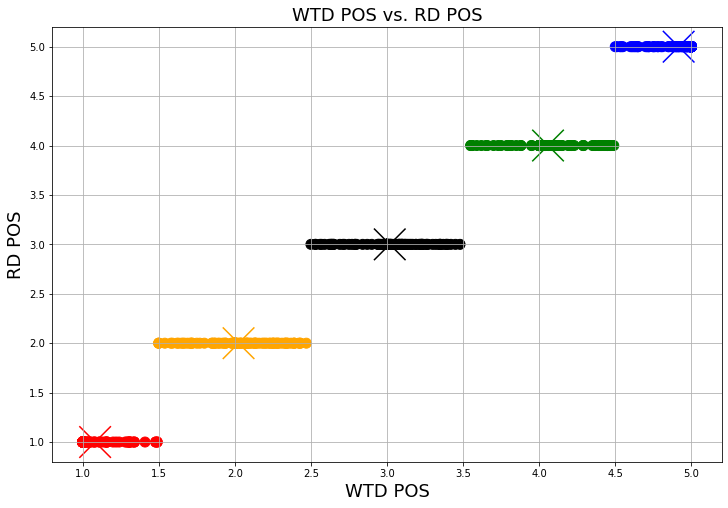

In [ ]:
# scatterplot by cluster / color; centroids overlaid
ax = cluster_features.plot(kind="scatter", x="WTD POS", y="WS", marker="o", c = cluster_features['color'], s=100, grid=True, figsize = (12,8));
plt.xticks(())
plt.xlabel("WTD POS", fontsize=18)
plt.ylabel("RD POS", fontsize=18)
plt.title('WTD POS vs. RD POS', fontsize=18)

centroids.plot(kind="scatter", x="WTD POS", y="WS", marker="x", c=["r", "g", "b", "black", "orange"], s=1000, grid=True, ax=ax, figsize = (12,8));

## K-MEANS SCALED

In [ ]:
cluster_wtdpos_WS = champion_players[['WTD POS', 'WS']] #'RD POS'
cluster_USG_WS = champion_players[['USG%', 'WS']] #'RD POS'

cluster_wtdpos_WS.info()
cluster_USG_WS.info()

<class 'pandas.core.frame.DataFrame'>
Index: 391 entries, 2022-GSW-Stephen Curry to 1991-CHI-John Paxson
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   WTD POS  391 non-null    float64
 1   WS       391 non-null    float64
dtypes: float64(2)
memory usage: 9.2+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 391 entries, 2022-GSW-Stephen Curry to 1991-CHI-John Paxson
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   USG%    391 non-null    float64
 1   WS      391 non-null    float64
dtypes: float64(2)
memory usage: 9.2+ KB


In [ ]:
# pre-processing / standard scaling
sc = StandardScaler()

X_wtdpos_WS = cluster_wtdpos_WS
X_USG_WS = cluster_USG_WS

X_sc = sc.fit_transform(X_USG_WS)
km_sc = KMeans(n_clusters=5, random_state=42)
km_sc.fit(X_sc)

KMeans(n_clusters=5, random_state=42)

In [ ]:
# create scaled centroids dataframe
centroids_sc = pd.DataFrame(sc.inverse_transform(km_sc.cluster_centers_), columns = ['USG%', 'WS']) #'WTD POS'

print(centroids_sc)

        USG%         WS
0  20.155455   2.540000
1  31.456522  15.126087
2  25.621429   8.885714
3  14.042520   2.029134
4  15.088000   6.333333


In [ ]:
# create dataframe with color labels
colors_sc = ["red", "green", "blue", "black", "orange"]
cluster_wtdpos_WS['cluster'] = km_sc.labels_
cluster_wtdpos_WS['color_sc'] = cluster_wtdpos_WS['cluster'].map(lambda p: colors_sc[p])
cluster_wtdpos_WS.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,WTD POS,WS,cluster,color_sc
YR_TM_PLR,,,,
2022-GSW-Stephen Curry,1.03,8.0,2,blue
2022-GSW-Klay Thompson,2.53,1.8,0,red
2022-GSW-Andrew Wiggins,3.34,5.1,0,red
2022-GSW-Draymond Green,4.13,3.6,3,black
2022-GSW-Jonathan Kuminga,4.11,3.0,0,red


### WTD POS - WS

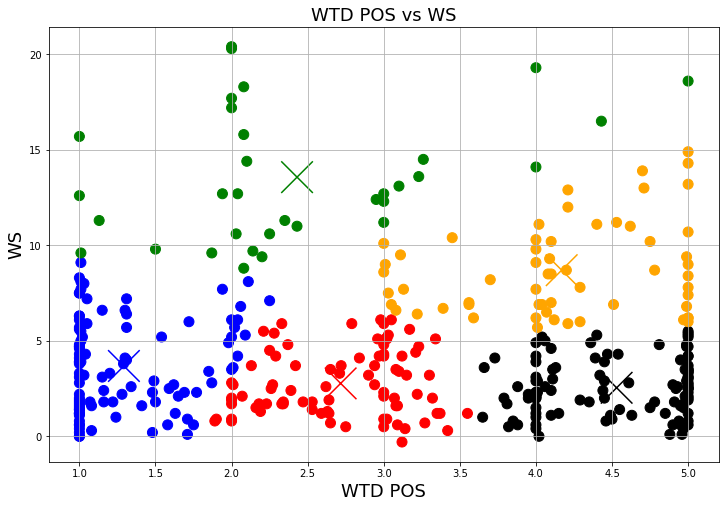

In [ ]:
# scatterplot by cluster / color; centroids overlaid
ax = cluster_wtdpos_WS.plot(kind="scatter", x="WTD POS", y="WS", marker="o", c = cluster_features['color_sc'], s=100, grid=True, figsize = (12,8));
plt.xlabel("WTD POS", fontsize=18)
plt.ylabel("WS", fontsize=18)
plt.title('WTD POS vs WS', fontsize=18)

centroids_sc.plot(kind="scatter", x="WTD POS", y="WS", marker="x", c=["r", "g", "b", "black", "orange"], s=1000, grid=True, ax=ax, figsize = (12,8));

### USG% - WS

In [ ]:
# create dataframe with color labels
colors_sc = ["red", "green", "blue", "black", "orange"]
cluster_USG_WS['cluster'] = km_sc.labels_
cluster_USG_WS['color_sc'] = cluster_USG_WS['cluster'].map(lambda p: colors_sc[p])
cluster_USG_WS.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,USG%,WS,cluster,color_sc
YR_TM_PLR,,,,
2022-GSW-Stephen Curry,30.8,8.0,2,blue
2022-GSW-Klay Thompson,29.6,1.8,0,red
2022-GSW-Andrew Wiggins,23.1,5.1,0,red
2022-GSW-Draymond Green,14.3,3.6,3,black
2022-GSW-Jonathan Kuminga,22.7,3.0,0,red


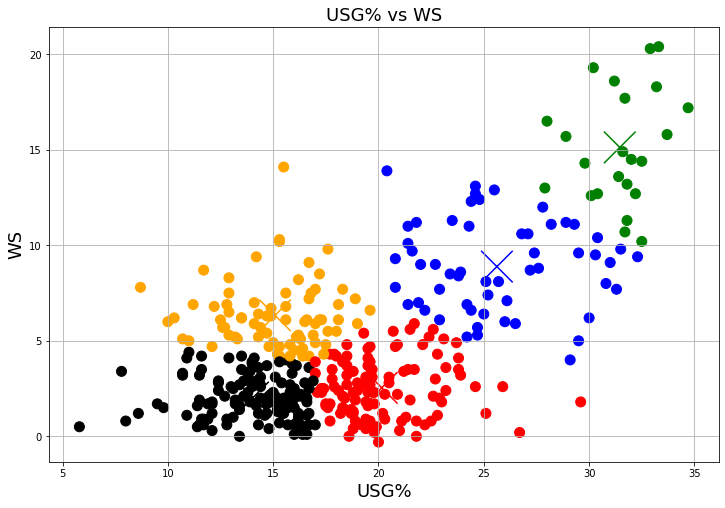

In [ ]:
# scatterplot by cluster / color; centroids overlaid
ax = cluster_USG_WS.plot(kind="scatter", x="USG%", y="WS", marker="o", c = cluster_USG_WS['color_sc'], s=100, grid=True, figsize = (12,8));
plt.xlabel("USG%", fontsize=18)
plt.ylabel("WS", fontsize=18)
plt.title('USG% vs WS', fontsize=18)

centroids_sc.plot(kind="scatter", x="USG%", y="WS", marker="x", c=["r", "g", "b", "black", "orange"], s=1000, grid=True, ax=ax, figsize = (12,8));

In [ ]:
# calculate sillhouette score from sklearn
silhouette_score(X_sc, km_sc.labels_)

NameError: ignored

## DBSCAN

* Density-Based Spatial Clustering of Applications with Noise

`DBSCAN` is dependent on two things:

1. Consistent density (one `eps` to rule them all)
2. Clear separation of the clusters within your dataset


* ‘DBScan is pretty sweet … it propagates out, alien-like’
  
* Hyperparameters:
  * min_samples: min number of points needed to form a cluster
  * epsilon: ‘searching distance’ in attempts to build a cluster

* Components:
  * Core Points / Border Points / Noise
  
* Grouped into either clusters or noise
  * Goes neighborhood by neighborhood , filtering out noise


In [ ]:
DBSCAN_df = champion_players[['USG%', 'WS']]
# DBSCAN_df = champion_players[scale_cols]
DBSCAN_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 391 entries, 2022-GSW-Stephen Curry to 1991-CHI-John Paxson
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   USG%    391 non-null    float64
 1   WS      391 non-null    float64
dtypes: float64(2)
memory usage: 9.2+ KB


In [ ]:
ss = StandardScaler()
X_scaled_DBSCAN = ss.fit_transform(DBSCAN_df)

In [ ]:
dbscan = DBSCAN()
dbscan.fit(X_scaled_DBSCAN)

DBSCAN()

In [ ]:
pd.Series(dbscan.labels_).value_counts()

 0    378
-1     13
dtype: int64

In [ ]:
DBSCAN_df['cluster'] = dbscan.labels_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


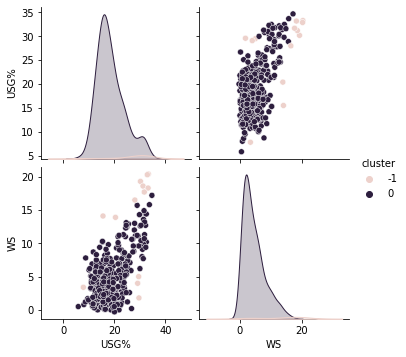

In [ ]:
sns.pairplot(DBSCAN_df, hue='cluster')

In [ ]:
dbscan = DBSCAN(eps=2.3, min_samples=4) #eps=2.3, min_samples=4
dbscan.fit(X_scaled_DBSCAN)
set(dbscan.labels_)

{0}

In [ ]:
silhouette_score(X_scaled_DBSCAN, dbscan.labels_)

ValueError: ignored

In [ ]:
# Create cluster column
DBSCAN_df['DBSCAN_cluster'] = dbscan.labels_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# Value counts for each cluster
DBSCAN_df['DBSCAN_cluster'].value_counts()

0    391
Name: DBSCAN_cluster, dtype: int64

In [ ]:
DBSCAN_df.groupby('cluster').mean().T[[0,1]]

# MODEL PIPELINE

In [ ]:
# pd.reset_option("all")

## IMPORTS

In [ ]:
## LIBRARY IMPORTS
import sys

%tensorflow_version 2.x 
import tensorflow as tf
from tensorflow import keras

import warnings
warnings.filterwarnings('ignore')

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
## SET RANDOM SEED FOR REPRODUCIBILITY ##
random_seed = 42
tf.random.set_seed(random_seed)
#import numpy as np
np.random.seed(random_seed)

## FEATURES + TARGET

In [ ]:
#reg_szn_test.columns[:99]

In [ ]:
## FEATURE VARIABLES

C_PIPE_cols = [#'YEAR', 'MONTH', 'DAY', 'SZN_HOME_WIN_PCT'
               #'SZN_CHAMP',
               'WL_HOME', #'WL_AWAY',
               #'PLUS_MINUS_HOME', #'PLUS_MINUS_AWAY', 'MARGIN_ABS', 
               #'PTS_HOME_AVG', 'PTS_TTL_HOME_AVG',
               'MARGIN_WTD_AVG',
               
               'SZN_WIN_PCT', 
               #'T10_WIN_PCT', #'T3_WIN_PCT', 'T5_WIN_PCT', 'T7_WIN_PCT', 
               'eFG_PCT_NET', #'eFG_PCT_TTL', 'eFG_PCT_HOME', 'eFG_PCT_AWAY',
               'TS_PCT_NET', #'TS_PCT_TTL', 'TS_PCT_HOME', 'TS_PCT_AWAY',
               'AST/TOV_PCT_NET', #'AST/TOV_PCT_TTL', 'AST/TOV_PCT_HOME', 'AST/TOV_PCT_AWAY',
               #'STOCKS/TOV_PCT_NET', #'STOCKS/TOV_PCT_TTL', #'STOCKS/TOV_PCT_HOME', 'STOCKS/TOV_PCT_AWAY',
               'STOCKS/TOV_NET', #'STOCKS/TOV_TTL', #'STOCKS/TOV_HOME', 'STOCKS/TOV_AWAY',
               #'TM_PAYROLL_PCT_NBA_TTL',
               #'TM_eWIN_COST',
               #'TM_eWIN_DELTA_NBA_TTL',
               'TM_eWIN_DELTA_NBA_AVG',
               #'PACE',
               ]

# pipeline_cols_avg = [#'YEAR', 'TEAM_ID_HOME', 'TEAM_ABBREVIATION_HOME',
#                  #'WL_HOME', 'WIN%_HOME', #'WIN%_AWAY',
#                  'W/L%',
#                  #'OREB_TTL', 'DREB_TTL', #'REB_NET',
#                 'AST/TOV%_NET', 'STOCKS_TOV_NET', #'STOCKS_NET',
#                  'eFG_PCT_NET', 'TS_PCT_NET',
#                   #'W/L%', 'SRS', #'PACE',
#                   #'SZN_CHAMP',
#                   'NET_MARGIN_ABS'
#                  #'O-RTG', 'D-RTG', 'NET-RTG',
#                  ]

## TARGET VARIABLE

target = 'WL_HOME' #'WL_HOME' #'NET_MARGIN'#'W/L%', #'NET_MARGIN' #'WL_HOME' #'PLUS_MINUS_HOME'

In [ ]:
pipeline_df = reg_szn_test[C_PIPE_cols]

# pipeline_df = reg_szn_test[pipeline_cols]
# pipeline_df = reg_szn_avg[pipeline_cols_avg]

In [ ]:
pipeline_df.dropna(inplace=True)
pipeline_df.head()
pipeline_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36149 entries, 0 to 36188
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   WL_HOME                36149 non-null  int64  
 1   MARGIN_WTD_AVG         36149 non-null  float64
 2   SZN_WIN_PCT            36149 non-null  float64
 3   eFG_PCT_NET            36149 non-null  float64
 4   TS_PCT_NET             36149 non-null  float64
 5   AST/TOV_PCT_NET        36149 non-null  float64
 6   STOCKS/TOV_NET         36149 non-null  int64  
 7   TM_eWIN_DELTA_NBA_AVG  36149 non-null  float64
dtypes: float64(6), int64(2)
memory usage: 2.5 MB


## LABEL ENCODER

In [ ]:
# The LabelEncoder  
le = LabelEncoder()

# Encode categorical target in the combined data
pipeline_df[target] = le.fit_transform(pipeline_df[target])


  # pipeline_df['TEAM_ABBREVIATION_HOME'] = le.fit_transform(pipeline_df['TEAM_ABBREVIATION_HOME'])
  # pipeline_df['TEAM_ABBREVIATION_AWAY'] = le.fit_transform(pipeline_df['TEAM_ABBREVIATION_AWAY'])
  # pipeline_df['TEAM_ID_HOME'] = le.fit_transform(pipeline_df['TEAM_ID_HOME'])
  # pipeline_df['TEAM_ID_AWAY'] = le.fit_transform(pipeline_df['TEAM_ID_AWAY'])

# Print the first 5 rows of df
pipeline_df.head()

,WL_HOME,MARGIN_WTD_AVG,SZN_WIN_PCT,eFG_PCT_NET,TS_PCT_NET,AST/TOV_PCT_NET,STOCKS/TOV_NET,TM_eWIN_DELTA_NBA_AVG
0,1,24.0,1.0,0.231,0.187,0.010,-5,0.732
1,0,-8.0,0.0,-0.076,-0.141,0.738,10,0.672
2,1,10.0,1.0,0.043,0.061,-0.144,6,1.323
3,1,24.0,1.0,0.090,0.144,0.082,0,1.708
4,1,11.0,1.0,0.000,0.045,0.810,1,0.820


## TRAIN-TEST / SPLIT

In [ ]:
# Divide the training data into training (80%) and validation (20%)
df_train, df_val = train_test_split(pipeline_df, train_size=0.8, random_state=random_seed)

# Reset the index
df_train, df_val = df_train.reset_index(drop=True), df_val.reset_index(drop=True)

In [ ]:
## ALTERNATIVE METHOD ##
# train, test = train_test_split(reg_szn_test, train_size=0.8, random_state=42)

# # Load the raw training / testing data
# df_raw_train = train
# df_raw_test = test

# # Make a copy of df_raw_train + df_raw_test
# df_train = df_raw_train.copy(deep=True)
# df_test = df_raw_test.copy(deep=True)

In [ ]:
# Print the dimension of df_train
print(pd.DataFrame([[df_train.shape[0], df_train.shape[1]]], columns=['# rows', '# columns']))

# Print the dimension of df_val
print(pd.DataFrame([[df_val.shape[0], df_val.shape[1]]], columns=['# rows', '# columns']))

# Print the dimension of df_test
  # pd.DataFrame([[df_test.shape[0], df_test.shape[1]]], columns=['# rows', '# columns'])

   # rows  # columns
0   28919          8
   # rows  # columns
0    7230          8


In [ ]:
# Combine df_train, df_val and df_test
df = pd.concat([df_train, df_val], sort=False) #, df_test
# df.dropna(inplace=True)
df.head()

,WL_HOME,MARGIN_WTD_AVG,SZN_WIN_PCT,eFG_PCT_NET,TS_PCT_NET,AST/TOV_PCT_NET,STOCKS/TOV_NET,TM_eWIN_DELTA_NBA_AVG
0,1,9.0,0.79,0.093,0.100,-0.127,-1,0.705
1,0,-2.0,0.25,-0.031,-0.041,-1.728,-11,1.009
2,1,-5.0,0.33,0.018,-0.008,0.941,6,1.242
3,0,3.4,0.73,-0.099,-0.117,-0.046,-5,0.732
4,0,-6.1,0.26,-0.111,-0.134,-0.231,-1,1.952


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36149 entries, 0 to 7229
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   WL_HOME                36149 non-null  int64  
 1   MARGIN_WTD_AVG         36149 non-null  float64
 2   SZN_WIN_PCT            36149 non-null  float64
 3   eFG_PCT_NET            36149 non-null  float64
 4   TS_PCT_NET             36149 non-null  float64
 5   AST/TOV_PCT_NET        36149 non-null  float64
 6   STOCKS/TOV_NET         36149 non-null  int64  
 7   TM_eWIN_DELTA_NBA_AVG  36149 non-null  float64
dtypes: float64(6), int64(2)
memory usage: 2.5 MB


FEATURE MATRIX:

In [ ]:
# Get the feature matrix
X_train = df_train[np.setdiff1d(df_train.columns, [target])].values
X_val = df_val[np.setdiff1d(df_val.columns, [target])].values
# X_test = df_test[np.setdiff1d(df_test.columns, [target])].values

# Get the target vector
y_train = df_train[target].values
y_val = df_val[target].values
# y_test = df_test[target].values

## SCALE

* ML models for which scaling/standardization of features is NOT RECOMMENDED:
    * Ensemble models (decision trees, random forest, boost, bootstrap)
    * No need for scaling or standardization:
        * Uniform data
        * Non-normal distributions 
* ML models for which scaling/standardization of features is RECOMMENDED:
    * Linear Regression
    * Logistic Regression
    * Ridge / Lasso / Elastic-Net
    * K-Means / clustering models (distance between points as measurement)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler
mms = MinMaxScaler()

In [ ]:
# Normalize the training data
X_train = mms.fit_transform(X_train)

# Normalize the validation data
X_val = mms.transform(X_val)

# # Normalize the test data
# X_test = mms.transform(X_test)

# HYPERPARAMETER TUNING

## CONFIGURATION

In [ ]:
# Creating dictionary of the models
models = {'LR': LogisticRegression(class_weight='balanced', random_state=random_seed),
          'MLPC': MLPClassifier(early_stopping=True, random_state=random_seed),
          'RFC': RandomForestClassifier(class_weight='balanced', random_state=random_seed),
          'XGB': XGBClassifier(random_state=random_seed),
          # 'KNN': KNeighborsClassifier(weights='uniform'),
          # 'SVM': SVC(class_weight='balanced', random_state=random_seed),
          # 'GNB': GaussianNB(),
          #'HGBC': HistGradientBoostingClassifier(random_state=random_seed)
          }

# DICTIONARY OF PIPELINES
pipes = {}

for acronym, model in models.items():
    pipes[acronym] = Pipeline([('model', model)])

In [ ]:
# Change working directory to the absolute path of the shallow utilities folder
%cd $abspath_util_shallow

# Import the shallow utitilities
%run pmlm_utilities_shallow.ipynb

/content/drive/My Drive/GWU/GWU-CAPSTONE


In [ ]:
#Getting the predefined split cross-validator
  # feature matrix and target vector in the combined training and validation data
  # target vector in the combined training and validation data
  # PredefinedSplit
  # See the implementation in pmlm_utilities.ipynb

X_train_val, y_train_val, ps = get_train_val_ps(X_train, y_train, X_val, y_val)

## PARAMETER GRIDS

In [ ]:
param_grids = {}

## SCORING METRICS
# supplemental_scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted', 'roc_auc']

### LOGISTIC REGRESSION


* HYPERPARAMETERS:
* As $C$ increases, variance will likely increase as a result of additional data flowing through model (alpha)

* Binary Classification = same assessment as traditional classification models
* F1 Score / Accuracy / Precision / Specificity / Sensitivity
* ROC Curve / AUC

In [ ]:
## LOGISTIC REGRESSION HYPERPARAMETERS ##

LogReg_tol = [10 ** i for i in range(-5, -2)]

LogReg_C = [1, 50, 100] 

LogReg_solver = ['newton-cg', 'lbfgs', 'liblinear'] 

param_grids['LR'] = [{'model__tol': LogReg_tol,
                      'model__C': LogReg_C,
                      'model__solver': LogReg_solver,
                      }]



# LogReg_penalty = ['none', 'l1', 'l2'] 

                      #'model__penalty': LogReg_penalty,

# LogReg_C # ORIGINAL: [0.1, 1, 10] #0.01,                
# LogReg_solver #'sag', 'saga'       
# LogReg_penalty #, 'elasticnet'

### MLPC
* https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

In [ ]:
## MLPC HYPERPARAMETERS ##

MLP_alpha = [10 ** i for i in range(-6, -2)]

MLP_learning_rate_init = [10 ** i for i in range(-6, -2)] 

param_grids['MLPC'] = [{'model__alpha': MLP_alpha,
                        'model__learning_rate_init': MLP_learning_rate_init,
                        }]


# MLP_learning_rate_init # OTHER: [9 ** i for i in range(-3, -1)]

### RFC

In [ ]:
## RFC HYPERPARAMETERS ##

RFC_min_samples_split = [2]

RFC_min_samples_leaf = [20]

RFC_n_estimators = [50, 100] 

param_grids['RFC'] = [{'model__min_samples_split': RFC_min_samples_split,
                       'model__min_samples_leaf': RFC_min_samples_leaf,
                       'model__n_estimators': RFC_n_estimators,
                       }]


# RFC_max_depth = [1, 5, 10]

# RFC_max_features = ['auto', 'sqrt']


# RFC_min_samples =  # ORIGINAL: [2, 20, 100]
# RFC_samples_leaf = # ORIGINAL: [1, 20, 100]. ## REVISED [3, 5, 10, 20, 30, 50]
# RFC_n_estimators = # ORIGINAL: [10, 50, 100]                       

#'model__max_depth': RFC_max_depth,
                       #'model__max_features': RFC_max_features,

### XGBOOST

In [ ]:
## XGBOOST HYPERPARAMETERS ##

XGB_max_depth = [5] # 3, 10

XGB_learning_rate = [10 ** i for i in range(-4, 1)]

XGB_n_estimators = [200, 300, 400] #100, 

param_grids['XGB'] = [{'model__max_depth': XGB_max_depth,
                       'model__learning_rate': XGB_learning_rate,
                       'model__n_estimators': XGB_n_estimators,
                       }]


# [max_depth=12,
#  subsample=0.33,
#  objective='binary:logistic',
#  n_estimators=300,
#  learning_rate = 0.01]

# model.fit(train_X, train_Y.values.ravel(), early_stopping_rounds=15, eval_metric

### KNN

In [ ]:
## KNN HYPERPARAMETERS ##

KNN_n_neighbors = [15, 20, 25, 30]

KNN_algorithm = ['kd_tree', 'ball_tree']

# param_grids['KNN'] = [{'model__n_neighbors': KNN_n_neighbors,
#                        'model__algorithm': KNN_algorithm,
#                        }]




## GRIDSEARCH

In [ ]:
## DIRECTORY ##
import os
# Make directory
directory = os.path.dirname(abspath_curr + '/result/')
if not os.path.exists(directory):
    os.makedirs(directory)

In [ ]:
## GRIDSEARCH -- HYPERPARAMETER TUNING ##

from sklearn.model_selection import GridSearchCV

# The list of [best_score_, best_params_, best_estimator_] obtained by GridSearchCV
best_score_params_estimator_gs = []

# For each model
for acronym in pipes.keys():
    # GridSearchCV
    gs = GridSearchCV(estimator=pipes[acronym],
                      param_grid=param_grids[acronym],
                      scoring='f1_macro',
                      n_jobs=2, #8
                      cv=ps, #5
                      return_train_score=True,
                      verbose=3,
                      )
        
    # Fit the pipeline
    gs = gs.fit(X_train_val, y_train_val)
    
    # Update best_score_params_estimator_gs
    best_score_params_estimator_gs.append([gs.best_score_, gs.best_params_, gs.best_estimator_])
    
    # Sort cv_results in ascending order of 'rank_test_score' and 'std_test_score'
    cv_results = pd.DataFrame.from_dict(gs.cv_results_).sort_values(by=['rank_test_score', 'std_test_score'])
    
    # Get the important columns in cv_results
    important_columns = ['rank_test_score',
                         'mean_test_score', 
                         'mean_train_score', 
                         'std_test_score', 
                         'std_train_score',
                         'mean_fit_time', 
                         'std_fit_time',                        
                         'mean_score_time', 
                         'std_score_time',
                         ]
    
    ### print(classification_report)


    # Move the important columns ahead
    cv_results = cv_results[important_columns + sorted(list(set(cv_results.columns) - set(important_columns)))]

    # Write cv_results file
    cv_results.to_csv(path_or_buf=abspath_util_shallow + 'result/' + acronym + '.csv', index=False)

# Sort best_score_params_estimator_gs in descending order of the best_score_
best_score_params_estimator_gs = sorted(best_score_params_estimator_gs, key=lambda x : x[0], reverse=True)

# Print best_score_params_estimator_gs
pd.DataFrame(best_score_params_estimator_gs, columns=['best_score', 'best_param', 'best_estimator'])

Fitting 1 folds for each of 27 candidates, totalling 27 fits
Fitting 1 folds for each of 16 candidates, totalling 16 fits
Fitting 1 folds for each of 2 candidates, totalling 2 fits
Fitting 1 folds for each of 15 candidates, totalling 15 fits


,best_score,best_param,best_estimator
0,0.890794,"{'model__min_samples_leaf': 20, 'model__min_sa...","((DecisionTreeClassifier(max_features='auto', ..."
1,0.890083,"{'model__C': 100, 'model__solver': 'liblinear'...","(LogisticRegression(C=100, class_weight='balan..."
2,0.887676,"{'model__learning_rate': 0.1, 'model__max_dept...","(XGBClassifier(max_depth=5, n_estimators=200, ..."
3,0.887582,"{'model__alpha': 0.0001, 'model__learning_rate...","(MLPClassifier(early_stopping=True, random_sta..."


In [ ]:
slide_TTS_cols = ['mean_test_score', 'mean_train_score'] #, 'split0_test_score', 'split0_train_score'

cv_results[slide_TTS_cols].describe()

#cv_results.describe()

,mean_test_score,mean_train_score
count,15.000000,15.000000
mean,0.878918,0.914827
std,0.006550,0.043503
min,0.868225,0.882015
25%,0.875516,0.887071
50%,0.878538,0.894372
75%,0.884859,0.918264
max,0.887676,1.000000


## MODEL SELECTION

In [ ]:
# Get the best_score, best_params and best_estimator obtained by GridSearchCV
best_score_gs, best_params_gs, best_estimator_gs = best_score_params_estimator_gs[1]

In [ ]:
print(best_score_gs)
print(best_params_gs)
print(best_estimator_gs)

0.8900828150841011
{'model__C': 100, 'model__solver': 'liblinear', 'model__tol': 0.001}
Pipeline(steps=[('model',
                 LogisticRegression(C=100, class_weight='balanced',
                                    random_state=42, solver='liblinear',
                                    tol=0.001))])


# INTERPRETATION

## DIRECTORY

In [ ]:
import os

# Make directory
directory = os.path.dirname(abspath_util_shallow + '/result/figure/')
if not os.path.exists(directory):
    os.makedirs(directory)

## RFC FEATURE IMPORTANCE

In [ ]:
# Get the best_score, best_param and best_estimator of random forest obtained by GridSearchCV
best_score_rfc, best_param_rfc, best_estimator_rfc = best_score_params_estimator_gs[0]

# Get the dataframe of feature and importance
df_fi_rfc = pd.DataFrame(np.hstack((np.setdiff1d(df.columns, [target]).reshape(-1, 1), best_estimator_rfc.named_steps['model'].feature_importances_.reshape(-1, 1))),
                         columns=['FEATURES', 'IMPORTANCE'])

# Sort df_fi_rfc in descending order of the importance
df_fi_rfc = df_fi_rfc.sort_values(ascending=False, by='IMPORTANCE').reset_index(drop=True)

# Print the first 5 rows of df_fi_rfc
df_fi_rfc[:]

,FEATURES,IMPORTANCE
0,TS_PCT_NET,0.458294
1,eFG_PCT_NET,0.263984
2,AST/TOV_PCT_NET,0.125213
3,SZN_WIN_PCT,0.058988
4,STOCKS/TOV_NET,0.044479
5,MARGIN_WTD_AVG,0.030867
6,TM_eWIN_DELTA_NBA_AVG,0.018174


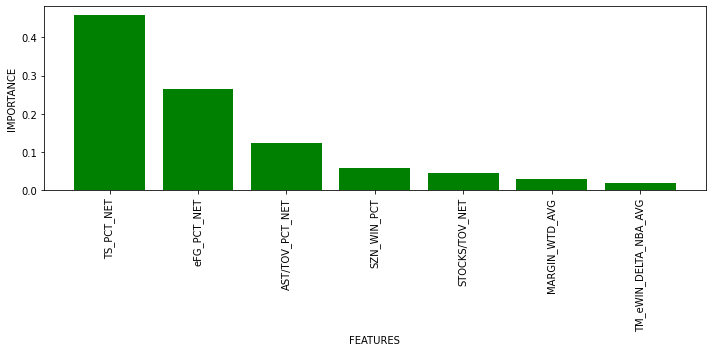

In [ ]:
# Create a figure
fig = plt.figure(figsize=(10, 5))

# The bar plot of the top 5 feature importance
plt.bar(df_fi_rfc['FEATURES'][:8], df_fi_rfc['IMPORTANCE'][:8], color='green')

# Set x-axis
plt.xlabel('FEATURES')
plt.xticks(rotation=90)

# Set y-axis
plt.ylabel('IMPORTANCE')

# Save and show the figure
plt.tight_layout()
plt.savefig(abspath_util_shallow + '/result/feature_importance_rfc.png')
plt.show()

## XGB FEATURE IMPORTANCE

In [ ]:
df_val.columns

Index(['WL_HOME', 'MARGIN_WTD_AVG', 'eFG_PCT_NET', 'TS_PCT_NET',
       'AST/TOV_PCT_NET', 'STOCKS/TOV_NET', 'TM_eWIN_DELTA_NBA_AVG'],
      dtype='object')

In [ ]:
XGB_feature_names = pipeline_df.columns
XGB_feature_names = XGB_feature_names.drop(['WL_HOME'])
# ['MARGIN_WTD_AVG', 'eFG_PCT_NET', 'TS_PCT_NET',
#        'AST/TOV_PCT_NET', 'STOCKS/TOV_NET', 'TM_eWIN_DELTA_NBA_AVG']

In [ ]:
XGB_extract_results = best_score_params_estimator_gs[2][2][0]

XGB_feature_importances = pd.DataFrame(data=XGB_extract_results.feature_importances_,
                           columns=['IMPORTANCE'],
                           index=XGB_feature_names,
                           
                          #  index=['MARGIN_WTD_AVG',  'eFG_PCT_NET','TS_PCT_NET',
                          #         'AST/TOV_PCT_NET', 'STOCKS/TOV_NET', 'TM_eWIN_DELTA_NBA_AVG']
                           )

XGB_feature_importances.sort_values(by='IMPORTANCE', ascending=False)
#XGB_feature_importances

,IMPORTANCE
STOCKS/TOV_NET,0.696694
MARGIN_WTD_AVG,0.147032
TS_PCT_NET,0.057247
eFG_PCT_NET,0.052290
AST/TOV_PCT_NET,0.016166
SZN_WIN_PCT,0.016031
TM_eWIN_DELTA_NBA_AVG,0.014541


In [ ]:
best_score_params_estimator_gs[2][2]

Pipeline(steps=[('model',
                 XGBClassifier(max_depth=5, n_estimators=200,
                               random_state=42))])

In [ ]:
perm_importance = permutation_importance(XGB_extract_results, X_val, y_val) #X_test, y_test
perm_importance                           

{'importances_mean': array([0.0540249 , 0.01598893, 0.01236515, 0.05795297, 0.0042047 ,
        0.28965422, 0.0057538 ]),
 'importances_std': array([0.00300441, 0.00085977, 0.0015367 , 0.00176694, 0.00103725,
        0.00406592, 0.00040655]),
 'importances': array([[0.05809129, 0.05048409, 0.05504841, 0.05587828, 0.05062241],
        [0.01632089, 0.0153527 , 0.01493776, 0.01590595, 0.01742739],
        [0.01230982, 0.00982019, 0.01466113, 0.01258645, 0.01244813],
        [0.0582296 , 0.05919779, 0.05449516, 0.05919779, 0.05864454],
        [0.00622407, 0.00359613, 0.00387275, 0.0033195 , 0.00401107],
        [0.28921162, 0.28603043, 0.29737206, 0.28907331, 0.28658368],
        [0.00539419, 0.00525588, 0.00567082, 0.00622407, 0.00622407]])}

In [ ]:
perm_importance.importances_mean

array([0.0540249 , 0.01598893, 0.01236515, 0.05795297, 0.0042047 ,
       0.28965422, 0.0057538 ])

In [ ]:
perm_importance_df = pd.DataFrame(perm_importance.importances_mean)

In [ ]:
perm_importance_df

,0
0,0.054025
1,0.015989
2,0.012365
3,0.057953
4,0.004205
5,0.289654
6,0.005754


In [ ]:
perm_importance

,IMPORTANCE
MARGIN_WTD_AVG,NaN
SZN_WIN_PCT,NaN
eFG_PCT_NET,NaN
TS_PCT_NET,NaN
AST/TOV_PCT_NET,NaN
STOCKS/TOV_NET,NaN
TM_eWIN_DELTA_NBA_AVG,NaN


In [ ]:
perm_importance

{'importances_mean': array([0.05416321, 0.01219917, 0.01092669, 0.00608575, 0.28887967,
        0.00782849]),
 'importances_std': array([0.00212588, 0.00179146, 0.00122779, 0.00036068, 0.00422667,
        0.00129039]),
 'importances': array([[0.05753804, 0.05463347, 0.05449516, 0.05103734, 0.05311203],
        [0.01355463, 0.01327801, 0.01147994, 0.00899032, 0.01369295],
        [0.01134163, 0.01037344, 0.00995851, 0.00982019, 0.0131397 ],
        [0.00608575, 0.00580913, 0.00580913, 0.00677732, 0.00594744],
        [0.2868603 , 0.29059474, 0.28755187, 0.28340249, 0.29598893],
        [0.00899032, 0.00940526, 0.00802213, 0.006639  , 0.00608575]])}

In [ ]:
XGB_FI = pd.DataFrame(XGB_extract_results.feature_importances_)
XGB_FI = XGB_FI

,0
5,0.696694
0,0.147032
3,0.057247
2,0.052290
4,0.016166
1,0.016031
6,0.014541


<BarContainer object of 7 artists>

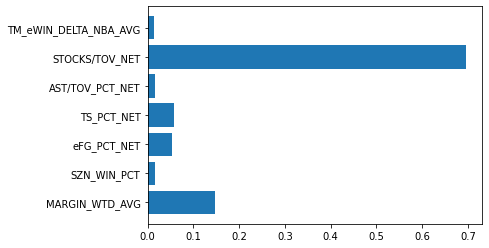

In [ ]:
plt.barh(XGB_feature_names, XGB_extract_results.feature_importances_)


# CLASSIFICATION - TEAMS

Different target/response variable types → different models 
* Numerical/continuous  → (general) linear regression model 
* Binary / 2 levels  → logit regression model 
* Categorical, more than 2 levels  → multinomial regression model 


NOTES:
* Logistic regression always binary y-target variable 
* Transform the *probability* of an outcome, not the variable / outcome itself

## PIPELINE A

### FEATURES

In [ ]:
## FEATURES ##
C_pipeline_cols = ['WL_HOME', #'HOME_TEAM_WINS', 'HOME_TEAM_LOSSES',
                   'AST/TOV_PCT_NET', #'AST/TOV%_HOME', 'AST/TOV%_AWAY',
                   #'STOCKS_NET', #'STOCKS_HOME', 'STOCKS_AWAY',
                   'STOCKS/TOV_PCT_NET', #'STOCKS_TOV_HOME', 'STOCKS_TOV_AWAY',
                   #'REB_NET', #'OREB_NET', 'DREB_NET', 
                   'eFG_PCT_NET', #'eFG%_HOME', 'eFG%_AWAY', 
                   'TS_PCT_NET', #'TS%_HOME', 'TS%_AWAY', 
                   #'YEAR', 'TEAM_ID_HOME', 'TEAM_ABBREVIATION_HOME', 'TEAM_ID_AWAY', 'TEAM_ABBREVIATION_AWAY',
                   #'PTS_HOME', 'PLUS_MINUS_HOME', 'PTS_AWAY', 'PLUS_MINUS_AWAY',
                   #'FGM_HOME', 'FGA_HOME', 'FG_PCT_HOME', 'FGM_AWAY', 'FGA_AWAY', 'FG_PCT_AWAY',
                   #'FG3M_HOME', 'FG3A_HOME', 'FG3_PCT_HOME', 'FG3M_AWAY', 'FG3A_AWAY', 'FG3_PCT_AWAY',
                   #'FTM_HOME', 'FTA_HOME', 'FT_PCT_HOME', 'FTM_AWAY', 'FTA_AWAY', 'FT_PCT_AWAY',
                   #'OREB_HOME', 'DREB_HOME', 'REB_HOME',
                   #'AST_HOME', 'TOV_HOME', 'AST_AWAY', 'TOV_AWAY',
                   #'STL_HOME', 'BLK_HOME', 'STL_AWAY', 'BLK_AWAY',
                   ]

In [ ]:
## DATAFRAME ##
C_pipeline_df = reg_szn_test[C_pipeline_cols]
C_pipeline_df.dropna(inplace=True)
# C_pipeline_df.drop(columns=['W/L%'])
C_pipeline_df

,WL_HOME,AST/TOV_PCT_NET,STOCKS/TOV_PCT_NET,eFG_PCT_NET,TS_PCT_NET
0,W,0.010,-0.238,0.231,0.187
1,L,0.738,0.651,-0.076,-0.141
2,W,-0.144,0.421,0.043,0.061
3,W,0.082,0.013,0.090,0.144
4,W,0.810,0.015,0.000,0.045
...,...,...,...,...,...
36184,W,-1.619,-1.024,0.112,0.139
36185,W,1.500,0.875,0.067,0.078
36186,W,0.271,-0.500,0.109,0.070
36187,L,-1.762,-1.471,0.006,0.039


### STANDARD SCALER

* Best Practices:
    * Regression - scale features and target
    * Classification - scale features
    * Min-Max Normalization - scale all variables within same range
    * Standardization - data with many outliers

In [ ]:
# STANDARD SCALER
ss = StandardScaler()
X_sc = pd.DataFrame(ss.fit_transform(sklearn_LR_df), columns=sklearn_LR_df.columns, index=sklearn_LR_df.index)

In [ ]:
print(X_sc)

              W/L%  OREB_TTL  DREB_TTL  AST/TOV%_NET  STOCKS_TOV_NET  \
TM_INDEX                                                               
1991-ATL  0.155505  2.331101 -0.215950      0.989685        0.909039   
1991-BKN -1.173448  2.977746 -0.851534      0.193868        1.162643   
1991-BOS  1.176294  2.297067 -0.165328      1.470646        1.860055   
1991-CHA -1.173448  2.194965 -0.002214      1.584655        0.465231   
1991-CHI  1.567918  1.216489 -0.902156      1.622249        1.495499   
...            ...       ...       ...           ...             ...   
2020-SAC -0.444414 -0.821767  1.090215      1.808030        1.462918   
2020-SAS -0.315059 -1.306278  1.974221      3.047415        1.571228   
2020-TOR  1.517271 -1.829550  0.904446      1.583297        0.488126   
2020-UTA  0.714763 -1.160925  1.698770      1.957116        1.192142   
2020-WAS -0.979419 -1.112474  2.070308      1.025533        0.018782   

          eFG%_NET   TS%_NET  
TM_INDEX                      
1

### TARGET + FEATURES

In [ ]:
C_pipeline_target = 'WL_HOME'

X = C_pipeline_df.drop(columns='WL_HOME')

y = C_pipeline_df[C_pipeline_target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print(f'X TRAIN SHAPE: {X_train.shape}')
print(f'X TEST SHAPE: {X_test.shape}')

X TRAIN SHAPE: (27111, 4)
X TEST SHAPE: (9038, 4)


### PIPELINE

In [ ]:
# function test effectiveness of classification models (default hyperparameters)
#https://github.com/mhoude1/NBA_Model/blob/master/model.py

def run_exps(X_train, y_train, X_test, y_test):
    '''
    Lightweight script to test many models and find winners
    :param X_train: training split
    :param y_train: training target vector
    :param X_test: test split
    :param y_test: test target vector
    :return: DataFrame of predictions
    '''

    supplemental_df = []

    models = [
        ('LogReg', LogisticRegression()),
        ('RFC', RandomForestClassifier()),
        ('KNN', KNeighborsClassifier()),
        ('SVM', SVC()),
        ('GNB', GaussianNB()),
        ('XGB', XGBClassifier())
    ]

    supplemental_results = []

    supplemental_names = []

    supplemental_scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted', 'roc_auc']

    supplemental_target_names = ['WIN', 'LOSS']

    for name, model in models:
        supplemental_kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=42)
        supplemental_cv_results = model_selection.cross_validate(model, X_train, y_train, cv=supplemental_kfold, scoring=supplemental_scoring)
        supplemental_clf = model.fit(X_train, y_train)
        supplemental_y_pred = supplemental_clf.predict(X_test)

        print(name)
        print(classification_report(y_test, y_pred, target_names=supplemental_target_names))

        supplemental_results.append(cv_results)
        supplemental_names.append(name)

        supplemental_gs_results_df = pd.DataFrame(cv_results)
        supplemental_gs_results_df['MODEL'] = name
        supplemental_df.append(supplemental_gs_results_df)

    supplemental_final = pd.concat(supplemental_df, ignore_index=True)

    return supplemental_final


if __name__ == "__main__":
    supplemental_final = run_exps(X_train, y_train, X_test, y_test)
    supplemental_final

LogReg
              precision    recall  f1-score   support

         WIN       0.86      0.84      0.85      3613
        LOSS       0.89      0.91      0.90      5425

    accuracy                           0.88      9038
   macro avg       0.88      0.87      0.88      9038
weighted avg       0.88      0.88      0.88      9038

RFC
              precision    recall  f1-score   support

         WIN       0.86      0.84      0.85      3613
        LOSS       0.89      0.91      0.90      5425

    accuracy                           0.88      9038
   macro avg       0.87      0.87      0.87      9038
weighted avg       0.88      0.88      0.88      9038

KNN
              precision    recall  f1-score   support

         WIN       0.83      0.81      0.82      3613
        LOSS       0.88      0.89      0.88      5425

    accuracy                           0.86      9038
   macro avg       0.85      0.85      0.85      9038
weighted avg       0.86      0.86      0.86      9038

SVM


### SKLEARN MODEL

In [ ]:
lr = LinearRegression()

In [ ]:
X = sklearn_LR_df
y = sklearn_LR_df[LR_target]

In [ ]:
lr.fit(X_sc, y)

LinearRegression()

In [ ]:
print(lr.intercept_) # This is beta_hat_0
print(lr.coef_) # This is beta_hat_1 or `m` in y=mx+b

0.49977830720038324
[ 1.55761803e-01 -7.64393873e-19  1.94270313e-17 -2.57255880e-18
 -1.28884496e-17  2.01567006e-17  6.81956080e-18]


In [ ]:
list(zip(lr.coef_, sklearn_features))
pd.Series(lr.coef_, index=sklearn_features)
pd.DataFrame(lr.coef_, index=sklearn_features, columns=['COEFFICIENT'])

,Coefficient
W/L%,1.557618e-01
OREB_TTL,-7.643939e-19
DREB_TTL,1.942703e-17
AST/TOV%_NET,-2.572559e-18
STOCKS_TOV_NET,-1.288845e-17
eFG%_NET,2.015670e-17
TS%_NET,6.819561e-18


In [ ]:
[f'{X.columns[i]}: {lr.coef_[i]}' for i in range(len(X.columns))]

## EXAMPLE: All else held equal, for a one-unit increase in radio advertising, we expect to see a sales increase of about 0.19 units.

['W/L%: 0.1557618030692328',
 'OREB_TTL: -7.643938727055712e-19',
 'DREB_TTL: 1.94270313294849e-17',
 'AST/TOV%_NET: -2.5725587976980095e-18',
 'STOCKS_TOV_NET: -1.2888449553265971e-17',
 'eFG%_NET: 2.0156700565005905e-17',
 'TS%_NET: 6.8195608032540736e-18']

In [ ]:
# Make predictions
LR_y_preds = lr.predict(X_sc)
LR_y_preds[:20]

array([0.524, 0.317, 0.683, 0.317, 0.744, 0.402, 0.341, 0.244, 0.61 ,
       0.537, 0.634, 0.5  , 0.378, 0.707, 0.293, 0.585, 0.354, 0.476,
       0.5  , 0.378])

In [ ]:
## NULL / BASELINE MODEL PREDICTION
LR_null_prediction = y.mean()
LR_null_prediction

0.4997783072003832

In [ ]:
# Null residuals
LR_null_resids = y - LR_null_prediction
LR_null_resids

TM_INDEX
1991-ATL    0.024222
1991-BKN   -0.182778
1991-BOS    0.183222
1991-CHA   -0.182778
1991-CHI    0.244222
              ...   
2020-SAC   -0.069223
2020-SAS   -0.049074
2020-TOR    0.236333
2020-UTA    0.111333
2020-WAS   -0.152556
Name: W/L%, Length: 875, dtype: float64

In [ ]:
# Create residuals
LR_resids = y - LR_y_preds
LR_resids[:10]
# LR_resids.mean()

TM_INDEX
1991-ATL    0.000000e+00
1991-BKN    5.551115e-17
1991-BOS    0.000000e+00
1991-CHA    0.000000e+00
1991-CHI    0.000000e+00
1991-CLE    5.551115e-17
1991-DAL    0.000000e+00
1991-DEN    5.551115e-17
1991-DET    0.000000e+00
1991-GSW   -1.110223e-16
Name: W/L%, dtype: float64

In [ ]:
# Create the predictions for the "null model"
y_bar = np.mean(y)

In [ ]:
# The null MSE
null_mse = np.mean((y - y_bar)**2)
null_mse

0.02426173929537845

In [ ]:
## METRICS SCORING
print(f'R^2: {metrics.r2_score(y, LR_y_preds)}') # 1 - mse / null_mse 
print(f'MAE: {metrics.mean_absolute_error(y, LR_y_preds)}')
print(f'MSE: {metrics.mean_squared_error(y, LR_y_preds)}') #mse = np.mean(resids**2)
print(f'RMSE: {metrics.mean_squared_error(y, LR_y_preds, squared=False)}')

R^2: 1.0
MAE: 6.05705961577639e-17
MSE: 6.643027617320134e-33
RSS: 8.150477051878701e-17


In [ ]:
## MODEL SCORING
lr.score(X_sc, y)

1.0

In [ ]:
# MSE MANUAL CALC
rss = (LR_resids ** 2).sum()
rss / len(LR_resids)

6.643027617320134e-33

In [ ]:
## RMSE
np.sqrt(metrics.mean_squared_error(y, LR_y_preds))
metrics.mean_squared_error(y, LR_y_preds, squared=False) # squared=False gives us the square root

8.150477051878701e-17

### INTERPRETATION

Regular Linear Regression model scoring: 
* Coefficients’ p-values  
* RMSE root-mean-squared-error
* MAE mean-absolute-error 
  * Less prone to outliers
  * Huber loss used to solve
  * ‘Discontinuous Gradient’
* F-statistics for overall model significance 
* Coefficient of Determination R2, for percentage explained 
* ANOVA test (on model residuals) 
* Feature Selection / Model comparison: adj R2, BIC, Cp   


* If the F-statistic > F-critical or if the Prob (F-statistic) is approximately 0 then we reject the null hypothesis. Aka, regression makes sense.  

In [ ]:
# scipy.stats.f.ppf()


# COMPARE TO F-TEST
#find F critical value
# scipy.stats.f.ppf(q=1-.05, dfn=6, dfd=8)


# Alternate ... Inverse of CDF

# >>> scipy.stats.f.ppf(q=1-0.05, dfn=3, dfd=39)
# 2.8450678052793514
# >>> crit = _
# >>> scipy.stats.f.cdf(crit, dfn=3, dfd=39)
# 0.95000000000000007

In [ ]:
# Interpretation - 89.72% of the variance/variablity in our y - sales - is explained by the features (spending on TV, radio and newspaper ads) in our model!

# LINEAR REGRESSION - TEAMS

* LinearRegression
    * Use when m > n (rows>columns) (tall)
    * Normal Equation - first-order optimization of MSE

* Linear regression slope of 0 is essentially same as two sample t-test mean

* Rule of thumb: for linear regression, number of columns should be less than square root of number of rows

## STATSMODELS

In [ ]:
reg_szn_test.columns[1:99]

Index(['GAME_DATE', 'YEAR', 'SEASON', 'MONTH', 'DAY', 'TM_INDEX', 'NBA_CONF',
       'NBA_DIV', 'TEAM_NAME_HOME', 'MATCHUP_HOME', 'TM_CODE_HOME',
       'TM_CODE_AWAY', 'TEAM_ID_HOME', 'TEAM_ID_AWAY', 'SZN_CHAMP',
       'TTL_GM_COUNT', 'H_GM_COUNT', 'A_GM_COUNT', 'WL_HOME', 'WL_AWAY',
       'SZN_TTL_WIN', 'SZN_HOME_WIN', 'SZN_AWAY_WIN', 'SZN_TTL_LOSS',
       'SZN_HOME_LOSS', 'SZN_AWAY_LOSS', 'SZN_HOME_WIN_PCT', 'T3_HOME_WIN_PCT',
       'T5_HOME_WIN_PCT', 'T7_HOME_WIN_PCT', 'T10_HOME_WIN_PCT', 'PTS_TTL',
       'PTS_TTL_WTD_AVG', 'PTS_TTL_HOME_AVG', 'PTS_TTL_AWAY_AVG',
       'PTS_HOME_AVG', 'PTS_AWAY_AVG', 'PTS_HOME', 'PTS_AWAY',
       'MARGIN_WTD_AVG', 'MARGIN_HOME_AVG', 'MARGIN_AWAY_AVG', 'MARGIN_ABS',
       'PLUS_MINUS_HOME', 'PLUS_MINUS_AWAY', 'MIN_HOME', 'MIN_AWAY', 'FGM_TTL',
       'FGM_HOME', 'FGM_AWAY', 'FGA_TTL', 'FGA_HOME', 'FGA_AWAY', 'FG_PCT_NET',
       'FG_PCT_TTL', 'FG_PCT_HOME', 'FG_PCT_AWAY', 'FG3M_TTL', 'FG3M_HOME',
       'FG3M_AWAY', 'FG3A_TTL', 'FG3A_HOME', 

### FEATURES

In [ ]:
## OLS MODEL FEATURES ##
OLS_clean_cols = [#'YEAR', 'MONTH', 'DAY',
       'PLUS_MINUS_HOME', #'PLUS_MINUS_AWAY', 'MARGIN_ABS', 
       'eFG_PCT_NET', #'eFG_PCT_TTL', 'eFG_PCT_HOME', 'eFG_PCT_AWAY',
       'TS_PCT_NET', #'TS_PCT_TTL', 'TS_PCT_HOME', 'TS_PCT_AWAY',
       #'AST/TOV_PCT_HOME','AST/TOV_PCT_AWAY', #'AST/TOV_PCT_NET', #'AST/TOV_PCT_TTL',  
       #'STOCKS/TOV_PCT_NET', #'STOCKS/TOV_PCT_TTL', #'STOCKS/TOV_PCT_HOME', 'STOCKS/TOV_PCT_AWAY',
       #'STOCKS/TOV_NET', 'STOCKS/TOV_TTL', #'STOCKS/TOV_HOME', 'STOCKS/TOV_AWAY',
       # 'PF_TTL',
       ]




OLS_new_cols = [#'WL_HOME',
                'MARGIN_ABS', #'HOME_TEAM_WINS', 'HOME_TEAM_LOSSES',
                'AST/TOV%_NET', #'AST/TOV%_HOME', 'AST/TOV%_AWAY',
                'STOCKS_NET', #'STOCKS_HOME', 'STOCKS_AWAY',
                'STOCKS_TOV_NET', #'STOCKS_TOV_HOME', 'STOCKS_TOV_AWAY',
                'REB_NET', #'OREB_NET', 'DREB_NET', 
                'eFG%_NET', #'eFG%_HOME', 'eFG%_AWAY', 
                'TS%_NET', #'TS%_HOME', 'TS%_AWAY', 
                ]

OLS_pipeline_cols = [#'YEAR', 'TEAM_ID_HOME', 'TEAM_ABBREVIATION_HOME',
                     'W/L%', #'NET_MARGIN',
                     #'OREB_TTL', 'DREB_TTL', #'REB_NET',
                     'AST/TOV%_NET', 'STOCKS_TOV_NET', #'STOCKS_NET',
                     'eFG%_NET', 'TS%_NET',
                     #'W/L%', 'SRS', #'PACE',
                     #'SZN_CHAMP',
                     #'O-RTG', 'D-RTG', 'NET-RTG',
                     ]
                     
OLS_features = [#'WL_HOME', #'WIN%_HOME', #'WIN%_AWAY', 
                #'OREB_NET', 'DREB_NET',
                'NET_MARGIN',
                'AST/TOV%_NET', #'STOCKS_TOV_NET',
                'eFG%_NET', 'TS%_NET', 
                'STOCKS_NET',
                ]

In [ ]:
## OLS MODEL DATAFRAME ##
OLS_game_df = reg_szn_test[OLS_clean_cols] #reg_szn_test[OLS_features] # reg_szn_avg_Div[OLS_pipeline_cols] # 
OLS_game_df

,PLUS_MINUS_HOME,TS_PCT_NET,AST/TOV_PCT_NET
0,24,0.187,0.010
1,-8,-0.141,0.738
2,10,0.061,-0.144
3,24,0.144,0.082
4,11,0.045,0.810
...,...,...,...
36184,16,0.139,-1.619
36185,15,0.078,1.500
36186,6,0.070,0.271
36187,-12,0.039,-1.762


In [ ]:
# OLS_game_df.dropna(inplace=True)
# OLS_game_df.info()

### TARGET

In [ ]:
## TARGET VARIABLE ASSIGNMENT

target = 'PLUS_MINUS_HOME' #'PLUS_MINUS_HOME'

### LABEL ENCODER

In [ ]:
## LABEL ENCODER
le = LabelEncoder()

# Encode categorical target in the combined data
OLS_game_df[target] = le.fit_transform(OLS_game_df[target])

OLS_game_df.head()

,WL_HOME,AST/TOV%_NET,eFG%_NET,TS%_NET,STOCKS_NET
0,1,0.647436,0.015010,0.000798,2
1,0,0.504202,-0.000530,0.003311,3
2,0,-0.805556,-0.046170,-0.029801,-8
3,1,0.904412,0.084973,0.086945,1
4,1,1.842105,0.010985,0.009681,0


### STANDARD SCALER

* Best Practices:
    * Regression - scale features and target
    * Classification - scale features
    * Min-Max Normalization - scale all variables within same range
    * Standardization - data with many outliers

In [ ]:
# STANDARD SCALER
ss = StandardScaler()
X_sc = pd.DataFrame(ss.fit_transform(OLS_game_df), columns=OLS_game_df.columns, index=OLS_game_df.index)

In [ ]:
print(X_sc)

       PLUS_MINUS_HOME  TS_PCT_NET  AST/TOV_PCT_NET
0             1.575842    1.849360        -0.158410
1            -0.838054   -1.679086         0.609761
2             0.519762    0.493921        -0.320908
3             1.575842    1.386790        -0.082437
4             0.595197    0.321801         0.685734
...                ...         ...              ...
36184         0.972368    1.333002        -1.877299
36185         0.896934    0.676798         1.413808
36186         0.218025    0.590738         0.116992
36187        -1.139791    0.257257        -2.028190
36188        -1.894134   -1.496209        -0.067665

[36189 rows x 3 columns]


### OLS MODEL

In [ ]:
## OLS MODEL

X = OLS_game_df
X = sm.add_constant(X)
X_sc = sm.add_constant(X_sc)
y = OLS_game_df['PLUS_MINUS_HOME']

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
print(X.shape)
print(X_sc.shape)
print(y.shape)

(36189, 4)
(36189, 4)
(36189,)


In [ ]:
# INSTANTIATE MODEL
ols = sm.OLS(y, X_sc).fit() # X

In [ ]:
# INTERPRET RESULTS
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        PLUS_MINUS_HOME   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.131e+34
Date:                Sun, 11 Dec 2022   Prob (F-statistic):               0.00
Time:                        05:28:42   Log-Likelihood:             1.1273e+06
No. Observations:               36189   AIC:                        -2.255e+06
Df Residuals:                   36185   BIC:                        -2.255e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               3.1097   3.77e-17   8.26e+16      0.000       3.110       3.110
PLUS_MINUS_HOME    13.2566    7.7e-17   1.72e+17      0.000      13.257      13.257
TS_PCT_NET      -1.534e-16    6.9e-17     -2.222      0.026   -2.89e-16   -1.81e-17
AST/TOV_PCT_NET  4.109e-16   4.67e-17      8.799      0.000    3.19e-16    5.02e-16
==============================================================================
Omnibus:                      241.621   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              256.361
Skew:                           0.177   Prob(JB):                     2.15e-56
Kurtosis:                       3.213   Cond. No.                         3.85
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### INTERPRETATION

* Degrees of Freedom
    * Increasing DoF = Decreasing RSS (in theory)

* Alternatives to R^2
    * Use cross validation prediction error such as: Cp , AIC, BIC, Adjusted R2

* Cp – Mallow’s Cp statistics estimate the average MSE. It adds an error to our test model to account for test error. More predictors, higher the adjustment. We want this to be low. 
* Adjusted R2 – Unlike R2 which always increase with model size, this penalize larger numbers of predictors, after variance explanation has plateaued. Want this to be high. 
* Akaike Information Criterion (AIC) – Very similar to Cp. Often used in logistic regression as it measures maximum likelihood. We want this to be low. (better to choose explanatory model) 
    * Lower AIC = better model
    * Penalties for higher number of predictors
    * AIC(data$variable)

* Bayesian Information Criterion (BIC) – Similar to Cp and Akaike, includes a log conversion of the error adjustment. As a result, it places a higher penalty for more predictors. We want this to be low. (better to choose predictive model) 



* Class Imbalances
    * Majority vs Minority Classes
    * Cost-Based Method
            * class_weight = ‘balanced’
    * Sampling-Based Method
        * Over-sampling - adding samples of minority class
            * RandomOversampler (RO)
            * Synthetic Minority Oversampling Technique (SMOTE)
            * Generative Adversarial Networks (GAN)
                * ** REQUEST PROF PAPER **
        * Under-sampling - removing samples of majority class
        * Prefer oversampling to undersampling

* Specific to this analysis, do not want to risk undersampling by focusing on solely championship teams.
    * Historical league averages provide a baseline

## SKLEARN

### FEATURES

In [ ]:
sklearn_features = OLS_clean_cols #'RD POS', #'USG%', #'WTD POS', 
sklearn_LR_df = reg_szn_test[sklearn_features]
sklearn_LR_df.dropna(inplace=True)
# sklearn_LR_df.drop(columns=['W/L%'])
sklearn_LR_df

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,PLUS_MINUS_HOME,eFG_PCT_NET,TS_PCT_NET,AST/TOV_PCT_NET,STOCKS/TOV_PCT_NET
0,24,0.231,0.187,0.010,-0.238
1,-8,-0.076,-0.141,0.738,0.651
2,10,0.043,0.061,-0.144,0.421
3,24,0.090,0.144,0.082,0.013
4,11,0.000,0.045,0.810,0.015
...,...,...,...,...,...
36184,16,0.112,0.139,-1.619,-1.024
36185,15,0.067,0.078,1.500,0.875
36186,6,0.109,0.070,0.271,-0.500
36187,-12,0.006,0.039,-1.762,-1.471


### TARGET

In [ ]:
LR_target = 'PLUS_MINUS_HOME' #'W/L%'

### STANDARD SCALER

* Best Practices:
    * Regression - scale features and target
    * Classification - scale features
    * Min-Max Normalization - scale all variables within same range
    * Standardization - data with many outliers

In [ ]:
# STANDARD SCALER
ss = StandardScaler()
X_sc = pd.DataFrame(ss.fit_transform(sklearn_LR_df), columns=sklearn_LR_df.columns, index=sklearn_LR_df.index)

In [ ]:
print(X_sc)

              W/L%  OREB_TTL  DREB_TTL  AST/TOV%_NET  STOCKS_TOV_NET  \
TM_INDEX                                                               
1991-ATL  0.155505  2.331101 -0.215950      0.989685        0.909039   
1991-BKN -1.173448  2.977746 -0.851534      0.193868        1.162643   
1991-BOS  1.176294  2.297067 -0.165328      1.470646        1.860055   
1991-CHA -1.173448  2.194965 -0.002214      1.584655        0.465231   
1991-CHI  1.567918  1.216489 -0.902156      1.622249        1.495499   
...            ...       ...       ...           ...             ...   
2020-SAC -0.444414 -0.821767  1.090215      1.808030        1.462918   
2020-SAS -0.315059 -1.306278  1.974221      3.047415        1.571228   
2020-TOR  1.517271 -1.829550  0.904446      1.583297        0.488126   
2020-UTA  0.714763 -1.160925  1.698770      1.957116        1.192142   
2020-WAS -0.979419 -1.112474  2.070308      1.025533        0.018782   

          eFG%_NET   TS%_NET  
TM_INDEX                      
1

### SKLEARN MODEL

In [ ]:
lr = LinearRegression()

In [ ]:
X = sklearn_LR_df
y = sklearn_LR_df[LR_target]

In [ ]:
lr.fit(X, y)

LinearRegression()

In [ ]:
print(lr.intercept_) # This is beta_hat_0
print(lr.coef_) # This is beta_hat_1 or `m` in y=mx+b

-8.881784197001252e-16
[ 1.00000000e+00 -2.21801958e-15  1.32924197e-15  1.02883569e-16
  2.42573326e-17]


In [ ]:
list(zip(lr.coef_, sklearn_features))
pd.Series(lr.coef_, index=sklearn_features)
pd.DataFrame(lr.coef_, index=sklearn_features, columns=['COEFFICIENT'])

,COEFFICIENT
PLUS_MINUS_HOME,1.000000e+00
eFG_PCT_NET,-2.218020e-15
TS_PCT_NET,1.329242e-15
AST/TOV_PCT_NET,1.028836e-16
STOCKS/TOV_PCT_NET,2.425733e-17


In [ ]:
[f'{X.columns[i]}: {lr.coef_[i]}' for i in range(len(X.columns))]

## EXAMPLE: All else held equal, for a one-unit increase in radio advertising, we expect to see a sales increase of about 0.19 units.

['PLUS_MINUS_HOME: 1.0000000000000002',
 'eFG_PCT_NET: -2.2180195758214982e-15',
 'TS_PCT_NET: 1.329241969658851e-15',
 'AST/TOV_PCT_NET: 1.0288356890334347e-16',
 'STOCKS/TOV_PCT_NET: 2.4257332647283694e-17']

In [ ]:
# Make predictions
LR_y_preds = lr.predict(X_sc)
LR_y_preds[:20]

array([ 1.5758421 , -0.83805422,  0.51976246,  1.5758421 ,  0.59519672,
       -0.15914588, -1.96956813,  1.1986708 ,  0.0671569 , -0.53631718,
        0.74606524, -0.53631718, -0.15914588, -0.46088292,  0.4443282 ,
       -0.15914588,  0.67063098, -0.3100144 ,  1.12323654,  0.59519672])

In [ ]:
## NULL / BASELINE MODEL PREDICTION
LR_null_prediction = y.mean()
LR_null_prediction

3.109729475807566

In [ ]:
# Null residuals
LR_null_resids = y - LR_null_prediction
LR_null_resids

0        20.890271
1       -11.109729
2         6.890271
3        20.890271
4         7.890271
           ...    
36184    12.890271
36185    11.890271
36186     2.890271
36187   -15.109729
36188   -25.109729
Name: PLUS_MINUS_HOME, Length: 36189, dtype: float64

In [ ]:
# Create residuals
LR_resids = y - LR_y_preds
LR_resids[:10]
# LR_resids.mean()

0    22.424158
1    -7.161946
2     9.480238
3    22.424158
4    10.404803
5     1.159146
6   -21.030432
7    17.801329
8     3.932843
9    -3.463683
Name: PLUS_MINUS_HOME, dtype: float64

In [ ]:
# Create the predictions for the "null model"
y_bar = np.mean(y)

In [ ]:
# The null MSE
null_mse = np.mean((y - y_bar)**2)
null_mse

175.7368057766605

In [ ]:
## METRICS SCORING
print(f'R^2: {metrics.r2_score(y, LR_y_preds)}') # 1 - mse / null_mse 
print(f'MAE: {metrics.mean_absolute_error(y, LR_y_preds)}')
print(f'MSE: {metrics.mean_squared_error(y, LR_y_preds)}') #mse = np.mean(resids**2)
print(f'RMSE: {metrics.mean_squared_error(y, LR_y_preds, squared=False)}')

R^2: 0.09015034959015311
MAE: 10.237749181246821
MSE: 159.89407130003775
RMSE: 12.644922747887302


In [ ]:
## MODEL SCORING
lr.score(X, y)

1.0

In [ ]:
# MSE MANUAL CALC
rss = (LR_resids ** 2).sum()
rss / len(LR_resids)

159.89407130003775

In [ ]:
## RMSE
np.sqrt(metrics.mean_squared_error(y, LR_y_preds))
metrics.mean_squared_error(y, LR_y_preds, squared=False) # squared=False gives us the square root

8.150477051878701e-17

### INTERPRETATION

Regular Linear Regression model scoring: 
* Coefficients’ p-values  
* RMSE root-mean-squared-error
* MAE mean-absolute-error 
* F-statistics for overall model significance 
* Coefficient of Determination R2, for percentage explained 
* ANOVA test (on model residuals) 
* Feature Selection / Model comparison: adj R2, BIC, Cp   

If the F-statistic > F-critical or if the Prob (F-statistic) is approximately 0 then we reject the null hypothesis. Aka, regression makes sense.

In [ ]:
# scipy.stats.f.ppf()


# COMPARE TO F-TEST
#find F critical value
# scipy.stats.f.ppf(q=1-.05, dfn=6, dfd=8)


# Alternate ... Inverse of CDF

# >>> scipy.stats.f.ppf(q=1-0.05, dfn=3, dfd=39)
# 2.8450678052793514
# >>> crit = _
# >>> scipy.stats.f.cdf(crit, dfn=3, dfd=39)
# 0.95000000000000007

In [ ]:
# Interpretation - 89.72% of the variance/variablity in our y - sales - is explained by the features (spending on TV, radio and newspaper ads) in our model!

# LINEAR REGRESSION - PLAYERS

The assumptions necessary to conduct a proper linear regression are easily remembered by the "LINE" acronym:

* L - Linearity: there is a linear relationship between x and y (fix: apply non-linear transformation)
* I - Independence of residuals (usually assumed)
* N - Normality: residuals are normally distributed (fix: log y variable)
* E - Equality of variance: residuals have constant variance (fix: check outliers, non-linear transformation)

## STATSMODELS

In [ ]:
print(champion_players.columns)

Index(['YEAR', 'TEAM', 'CHAMP', 'PLAYER', 'WTD POS', 'RD POS', 'HEIGHT (IN)',
       'WEIGHT (LBS)', 'BMI', 'W-SPAN (IN)', 'APE', 'AGE', 'EXPERIENCE',
       'NATION', 'COUNTRY', 'CONTINENT', 'GLOBAL REGION', 'CONFERENCE',
       'COLLEGE', 'SALARY', '% SALARY', 'TM TTL SAL', 'NBA SAL CAP',
       'NBA TM AVG SAL', '$MM/eWIN', '$MM/TmWIN', '$MM/PlrWS', 'MP', 'USG%',
       'TS%', 'AST%', 'STL%', 'BLK%', 'TO%', 'AST%/TO%', 'STOCK%', 'D-WS',
       'O-WS', 'WS', 'TM-WS', 'TM-RAPTOR', 'TM-LEBRON', 'RAPTOR', 'LEBRON',
       'RAPTOR_VAL', 'LEBRON_VAL', 'WS_VAL'],
      dtype='object')


In [ ]:
OLS_features = ['WTD POS', 'USG%', 'STOCK%'] #'RD POS', #'USG%', #'WTD POS',  #, 'AST%/TO%'

In [ ]:
# STANDARD SCALER
sc = StandardScaler()

## OLS MODEL

X = champion_players[OLS_features]
X = sm.add_constant(X)
y = champion_players['WS']

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
X.shape
y.shape

(391,)

In [ ]:
# INSTANTIATE MODEL
ols = sm.OLS(y, X).fit()

In [ ]:
# INTERPRET RESULTS
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     WS   R-squared:                       0.415
Model:                            OLS   Adj. R-squared:                  0.412
Method:                 Least Squares   F-statistic:                     137.4
Date:                Mon, 05 Dec 2022   Prob (F-statistic):           7.63e-46
Time:                        03:12:16   Log-Likelihood:                -991.06
No. Observations:                 391   AIC:                             1988.
Df Residuals:                     388   BIC:                             2000.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.4212      0.581     -7.607      0.000      -5.564      -3.278
USG%           0.4149      0.028     14.957      0.000       0.360       0.469
STOCK%         0.4265      0.096      4.449      0.000       0.238       0.615
==============================================================================
Omnibus:                       19.189   Durbin-Watson:                   1.649
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.624
Skew:                           0.535   Prob(JB):                     3.32e-05
Kurtosis:                       3.347   Cond. No.                         74.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### INTERPRETATION / NOTES

* AIC - Aikake(?) 
    * Lower AIC = better model
    * Penalties for higher number of predictors
    * AIC(data$variable)
  
* Null deviance = baseline model (n-1 degrees of freedom)
    * More constants = less degrees of freedom
    * Lower deviance is better
    * Perfect model = zero deviance
    * Chi-square function - calculate p-value with deviance + DOF
    * McFadden value - pseudo R^2 metric
        * Compare with deviance values
        * LogLik function
        * ‘pscl’ library - pR2()


## SKLEARN

In [ ]:
lr = LinearRegression()

In [ ]:
sklearn_features = ['USG%', 'STOCK%', 'AST%/TO%'] #'RD POS', #'USG%', #'WTD POS', 

X = champion_players[sklearn_features]
y = champion_players['WS']

In [ ]:
lr.fit(X, y)

LinearRegression()

In [ ]:
print(lr.intercept_) # This is beta_hat_0
print(lr.coef_) # This is beta_hat_1 or `m` in y=mx+b

-4.358808924201448
[0.20585241 0.63598309 2.83793953]


In [ ]:
list(zip(lr.coef_, sklearn_features))
pd.Series(lr.coef_, index=sklearn_features)
pd.DataFrame(lr.coef_, index=sklearn_features, columns=['Coefficient'])

,Coefficient
USG%,0.205852
STOCK%,0.635983
AST%/TO%,2.837940


In [ ]:
[f'{X.columns[i]}: {lr.coef_[i]}' for i in range(len(X.columns))]

## EXAMPLE: All else held equal, for a one-unit increase in radio advertising, we expect to see a sales increase of about 0.19 units.

['USG%: 0.20585241229810622',
 'STOCK%: 0.6359830919464535',
 'AST%/TO%: 2.8379395289022398']

In [ ]:
# What is the prediction for x = 20?
lr.coef_*20 + lr.intercept_

array([-0.24176068,  8.36085291, 52.39998165])

In [ ]:
lr.predict([[20]])

In [ ]:
# Explore the matrix 
X[:20]

In [ ]:
# Make predictions
y_pred = lr.predict(X)
y_pred[:20]

In [ ]:
## NULL / BASELINE MODEL PREDICTION
null_prediction = y.mean()

In [ ]:
# Null residuals
null_residuals = y - null_prediction

In [ ]:
# Create residuals
resids = y - y_pred
resids[:10]

In [ ]:
residuals.mean()

In [ ]:
# Create the predictions for the "null model"
y_bar = np.mean(y)

In [ ]:
# The null MSE
null_mse = np.mean((y - y_bar)**2)
null_mse

In [ ]:
## METRICS SCORING
metrics.r2_score(y, y_pred) # 1 - mse / null_mse 
metrics.mean_absolute_error(y, y_pred)
metrics.mean_squared_error(y, y_pred) #mse = np.mean(resids**2)
metrics.mean_squared_error(y, y_pred, squared=False)

In [ ]:
## MODEL SCORING
lr.score(X, y)

In [ ]:
# MSE MANUAL CALC
rss = (residuals ** 2).sum()
rss / len(residuals)

In [ ]:
## RMSE
np.sqrt(metrics.mean_squared_error(y, predictions))
metrics.mean_squared_error(y, preds, squared=False) # squared=False gives us the square root

In [ ]:
# Interpretation - 89.72% of the variance/variablity in our y - sales - is explained by the features (spending on TV, radio and newspaper ads) in our model!

## PLOTS

The `y` axis will be the residuals, and the `x` axis will be original `predictions`. 

- Scedasticity: Ideally, consistent variance between low predictions and high predictions (homoscedasticity). The opposite (heteroscedasticity) means target is not normally distributed. Remedy is to run target vector through a power transformation (e.g. [Box-Cox or Yeo-Johnson](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PowerTransformer.html))

- Outliers: If loss function involves squaring the residuals (e.g. MSE, RMSE, R2), then outliers will have a lot of leverage over model. One recommendation is to remove worst offenders from training data.

In [ ]:
plt.hist(residuals, bins = 20);

In [ ]:
# L and E assumption
# our actual residuals
plt.scatter(predictions, residuals)
plt.axhline(0, color='orange');

# PCA

* Conduct PCA to find Eigensystem of Covariance Matrix
    * Eigenvalues serve as a proxy for variance, with positive real numbers
* Trace - sum of diagonal elements
    * Trace remains unchanged before and after transformation (“invariant”)
* Each eigenvalue λi  (if distinct) will have a unique eigenvector vi 
* M vi = λi vi
* Eigenvectors with different eigenvalues "orthogonal" to each other. TL: they are perpendicular. 

* PCA is ‘generally pointless’ without standard scaling of variables
* Main goal for PCA is to reduce dimensionality of the feature space. 
* It only works with numerical variables.
    * If you have ordinal variables with not too many levels, you can code them as 0, 1, 2, etc and try PCA
* If we scaled and centered our data into z-scores, then the covariance matrix and the correlation matrix are exactly the same.  
* PCA procedure is defined via diagonalization of the covariance matrix, not the correlation matrix. 
* ‘Decoupling’ of variable relationships
* Best practice: place centroid at central point of dataset (if data is funky)
  * U1 - captures most variance of normalized eigenvectors
  * U2 - always perpendicular to U1 no matter what

* PCA - best used to determine / explain VARIANCE
  * Scaling - 
  * Centering - if you don’t center, it will most notably affect PC1
  * Unit Vector Direction


In [ ]:
#%%
# features = champion_players.columns.to_list()[:]
# print(features)

pca_hist_matchups = hist_matchups_stats_1991_2020[OLS_features]
pca_hist_matchups.drop(columns=['WL_HOME'], inplace=True)

pca_champion_players = champion_players[scale_cols]

pca_cols = pca_hist_matchups.columns #pca_champion_players.columns

print(pca_hist_matchups.info())
print(pca_cols)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34954 entries, 0 to 35081
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   WIN%_HOME       34954 non-null  float64
 1   OREB_NET        34954 non-null  int64  
 2   DREB_NET        34954 non-null  int64  
 3   STOCKS_NET      34954 non-null  int64  
 4   AST/TOV%_NET    34954 non-null  float64
 5   eFG%_NET        34954 non-null  float64
 6   TS%_NET         34954 non-null  float64
 7   STOCKS_TOV_NET  34954 non-null  int64  
dtypes: float64(4), int64(4)
memory usage: 2.4 MB
None
Index(['WIN%_HOME', 'OREB_NET', 'DREB_NET', 'STOCKS_NET', 'AST/TOV%_NET',
       'eFG%_NET', 'TS%_NET', 'STOCKS_TOV_NET'],
      dtype='object')


In [ ]:
#%%

# X = champion_players[scale_cols].values
X = pca_hist_matchups.values
X = StandardScaler().fit_transform(X)

In [ ]:
#%%
pca = PCA(n_components='mle', svd_solver='full') # 'mle'

pca.fit(X)
X_PCA = pca.transform(X)
print('ORIGINAL DIMENSIONS:', X.shape)
print('TRANSFORMED DIMENSIONS:', X_PCA.shape)
print(f'EXPLAINED VARIANCE RATIO: {pca.explained_variance_ratio_}')

# 6 features explain ~95% of variance


ORIGINAL DIMENSIONS: (34954, 8)
TRANSFORMED DIMENSIONS: (34954, 7)
EXPLAINED VARIANCE RATIO: [0.40573542 0.28739038 0.13220389 0.07614666 0.06610216 0.02104776
 0.0070744 ]


In [ ]:
# pca_df1 = pd.DataFrame(X_PCA.components_, columns=pca_cols)
# print(pca_df1.head())

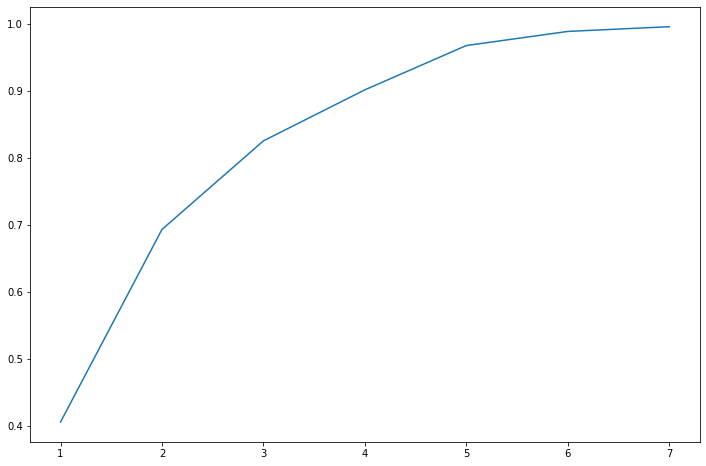

In [ ]:

#%%
x = np.arange(1, len(np.cumsum(pca.explained_variance_ratio_))+1, 1)

plt.figure(figsize=(12,8))
plt.plot(x, np.cumsum(pca.explained_variance_ratio_))
plt.xticks(x)

plt.show()



In [ ]:
#%%
# AUTO DATASET

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
champ_pca_cols = champion_players.select_dtypes(include=numerics)
champ_pca_cols.info()

X = champion_players[champion_players._get_numeric_data().columns.to_list()[:-1]]
Y = champion_players['WS']

#X.drop(columns='price', inplace=True, axis=1)



<class 'pandas.core.frame.DataFrame'>
Index: 391 entries, 2022-GSW-Stephen Curry to 1991-CHI-John Paxson
Data columns (total 38 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   YEAR            391 non-null    int64  
 1   WTD POS         391 non-null    float64
 2   RD POS          391 non-null    int64  
 3   HEIGHT (IN)     391 non-null    int64  
 4   WEIGHT (LBS)    391 non-null    int64  
 5   BMI             391 non-null    float64
 6   W-SPAN (IN)     391 non-null    float64
 7   APE             391 non-null    float64
 8   AGE             391 non-null    float64
 9   EXPERIENCE      391 non-null    int64  
 10  SALARY          391 non-null    int64  
 11  % SALARY        391 non-null    float64
 12  TM TTL SAL      391 non-null    int64  
 13  NBA SAL CAP     391 non-null    int64  
 14  NBA TM AVG SAL  391 non-null    int64  
 15  $MM/eWIN        391 non-null    float64
 16  $MM/TmWIN       391 non-null    float64
 17  $M

In [ ]:
#%%
print(X)



                           YEAR  WTD POS  RD POS  HEIGHT (IN)  WEIGHT (LBS)  \
YR_TM_PLR                                                                     
2022-GSW-Stephen Curry     2022     1.03       1           74           185   
2022-GSW-Klay Thompson     2022     2.53       3           78           215   
2022-GSW-Andrew Wiggins    2022     3.34       3           79           197   
2022-GSW-Draymond Green    2022     4.13       4           78           230   
2022-GSW-Jonathan Kuminga  2022     4.11       4           80           210   
...                         ...      ...     ...          ...           ...   
1991-CHI-Cliff Levingston  1991     4.00       4           80           210   
1991-CHI-Craig Hodges      1991     2.00       2           74           190   
1991-CHI-Will Perdue       1991     5.00       5           85           240   
1991-CHI-B.J. Armstrong    1991     1.00       1           74           175   
1991-CHI-John Paxson       1991     1.00       1    

In [ ]:
#%%

X = StandardScaler().fit_transform(X)




In [ ]:
#%%

# pca = PCA(n_components='mle', svd_solver='full') # 'mle'
pca = PCA(n_components=6, svd_solver='full') # 'mle'

pca.fit(X)
X_PCA = pca.transform(X)
print('ORIGINAL DIMENSIONS:', X.shape)
print('TRANSFORMED DIMENSIONS:', X_PCA.shape)
print(f'EXPLAINED VARIANCE RATIO: {pca.explained_variance_ratio_}')

ValueError: ignored

In [ ]:
#%%
x = np.arange(1, len(np.cumsum(pca.explained_variance_ratio_))+1, 1)

plt.figure(figsize=(12,8))
plt.plot(x, np.cumsum(pca.explained_variance_ratio_))
plt.xticks(x)
#plt.grid()
plt.show()

# 6 features explain ~95% of variance

# SVD

In [ ]:
#%%
# SINGULAR VALUE DECOMPOSITION ANALYSIS [SVD]
# CONDITION NUMBER

# ORIGINAL DATA

from numpy import linalg as LA

H = np.matmul(X.T, X)
_, d, _ = np.linalg.svd(H)
print(f'ORIGINAL DATA: SINGULAR VALUES {d}')
print(f'ORIGINAL DATA: CONDITIONAL NUMBER {LA.cond(X)}')




In [ ]:
#%%
# TRANSFORMED DATA
H_PCA = np.matmul(X_PCA.T, X_PCA)
_, d_PCA, _ = np.linalg.svd(H_PCA)
print(f'TRANSFORMED DATA: SINGULAR VALUES {d_PCA}')
print(f'TRANSFORMED DATA: CONDITIONAL NUMBER {LA.cond(X_PCA)}')
print('*'*58)



TRANSFORMED DATA: SINGULAR VALUES [1297.23677764  830.66224883  431.34918801  370.61919025  294.58918974
  189.23065553   82.81909816   22.49365184]
TRANSFORMED DATA: CONDITIONAL NUMBER 7.594158233738035
**********************************************************


In [ ]:
#%%
# CONSTRUCTION OF REDUCED DIMENSION DATASET

#pca_df = pca.explained_variance_ratio_

a, b = X_PCA.shape
column = []

for i in range(b):
    column.append(f'PRINCIPAL COLUMN {i+1}')

df_PCA = pd.DataFrame(data=X_PCA, columns=column)
# df_PCA = pd.concat([df_PCA, Y], axis=1)

df_PCA.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PRINCIPAL COLUMN 1  391 non-null    float64
 1   PRINCIPAL COLUMN 2  391 non-null    float64
 2   PRINCIPAL COLUMN 3  391 non-null    float64
 3   PRINCIPAL COLUMN 4  391 non-null    float64
 4   PRINCIPAL COLUMN 5  391 non-null    float64
 5   PRINCIPAL COLUMN 6  391 non-null    float64
 6   PRINCIPAL COLUMN 7  391 non-null    float64
 7   PRINCIPAL COLUMN 8  391 non-null    float64
dtypes: float64(8)
memory usage: 24.6 KB


In [ ]:
#%%
print(df_PCA.describe())

# KNN

* As the value of k increases:
  * Variance increases
  * Bias decreases
* Overfit indicated by:
  * Training score much higher than test score indicates model is overtrained
  * When presented with a new set of data, model may not generalize well

In [ ]:
KNN_game_df = reg_szn_test[C_PIPE_cols]

In [ ]:
target = 'WL_HOME'

### LABEL ENCODER

In [ ]:
## LABEL ENCODER
le = LabelEncoder()

# Encode categorical target in the combined data
KNN_game_df[target] = le.fit_transform(KNN_game_df[target])

KNN_game_df.head()

,WL_HOME,MARGIN_WTD_AVG,SZN_WIN_PCT,T10_WIN_PCT,eFG_PCT_NET,TS_PCT_NET,AST/TOV_PCT_NET,STOCKS/TOV_NET,STOCKS/TOV_TTL
0,1,24.0,1.0,0.0,0.231,0.187,0.010,-5,-5
1,0,-8.0,0.0,0.0,-0.076,-0.141,0.738,10,2
2,1,10.0,1.0,0.0,0.043,0.061,-0.144,6,2
3,1,24.0,1.0,0.0,0.090,0.144,0.082,0,-14
4,1,11.0,1.0,0.0,0.000,0.045,0.810,1,-11


In [ ]:
# assign X + Y
X = KNN_game_df.drop(columns=['WL_HOME', 'MARGIN_WTD_AVG'])
y = KNN_game_df[target]
#X.head()

In [ ]:
# train/test split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## SCALER

In [ ]:
# instantiate standard scaler
ss = StandardScaler()
#%%
# fit training model
ss.fit(X_train);

In [ ]:
#Scaling the test and train X
X_train_sc = ss.transform(X_train)
X_test_sc = ss.transform(X_test)

In [ ]:
#%%
# instantiate KNN models

# knn3 = KNeighborsClassifier(n_neighbors=3)
# knn5 = KNeighborsClassifier(n_neighbors=5)
# knn7 = KNeighborsClassifier(n_neighbors=7)
knn10 = KNeighborsClassifier(n_neighbors=10)
knn15 = KNeighborsClassifier(n_neighbors=15)
knn20 = KNeighborsClassifier(n_neighbors=20)
knn25 = KNeighborsClassifier(n_neighbors=25)
knn30 = KNeighborsClassifier(n_neighbors=30)

In [ ]:
# fit KNN models (k=3, k=5, k=15, k=25)

# knn3.fit(X_train_sc, y_train)
# knn5.fit(X_train_sc, y_train)
# knn7.fit(X_train_sc, y_train)
knn10.fit(X_train_sc, y_train)
knn15.fit(X_train_sc, y_train)
knn20.fit(X_train_sc, y_train)
knn25.fit(X_train_sc, y_train)
knn30.fit(X_train_sc, y_train)
;

KNeighborsClassifier(n_neighbors=30)

In [ ]:
# instantiate models

lasso_lr1 = LogisticRegression(penalty='l1', C=1.0, solver='liblinear')
lasso_lr10 = LogisticRegression(penalty='l1', C=10.0, solver='liblinear')
ridge_lr1 = LogisticRegression(penalty='l2', C=1.0)
ridge_lr10 = LogisticRegression(penalty='l2', C=10.0)

In [ ]:
# fit models

lasso_lr1.fit(X_train_sc, y_train)
lasso_lr10.fit(X_train_sc, y_train)
ridge_lr1.fit(X_train_sc, y_train)
ridge_lr10.fit(X_train_sc, y_train);

In [ ]:
# KNN=# model scores (train / test)

# print(f'KNN=3 Train: {knn3.score(X_train_sc, y_train):.3f}')
# print(f'KNN=3 Test: {knn3.score(X_test_sc, y_test):.3f}')
# print()
# print(f'KNN=5 Train: {knn5.score(X_train_sc, y_train):.3f}')
# print(f'KNN=5 Test: {knn5.score(X_test_sc, y_test):.3f}')
# print()

print(f'KNN=10 Train: {knn10.score(X_train_sc, y_train):.3f}')
print(f'KNN=10 Test: {knn10.score(X_test_sc, y_test):.3f}')
print()
print(f'KNN=15 Train: {knn15.score(X_train_sc, y_train):.3f}')
print(f'KNN=15 Test: {knn15.score(X_test_sc, y_test):.3f}')
print()
print(f'KNN=20 Train: {knn20.score(X_train_sc, y_train):.3f}')
print(f'KNN=20 Test: {knn20.score(X_test_sc, y_test):.3f}')
print()
print(f'KNN=25 Train: {knn25.score(X_train_sc, y_train):.3f}')
print(f'KNN=25 Test: {knn25.score(X_test_sc, y_test):.3f}')
print()
print(f'KNN=30 Train: {knn30.score(X_train_sc, y_train):.3f}')
print(f'KNN=30 Test: {knn30.score(X_test_sc, y_test):.3f}')

KNN=10 Train: 0.902
KNN=10 Test: 0.881

KNN=15 Train: 0.898
KNN=15 Test: 0.883

KNN=20 Train: 0.896
KNN=20 Test: 0.884

KNN=25 Train: 0.896
KNN=25 Test: 0.885

KNN=30 Train: 0.895
KNN=30 Test: 0.887


In [ ]:
# KNN=# model scores (train / test)

print(f'LR A=1 L1 Train: {lasso_lr1.score(X_train_sc, y_train):.3f}')
print(f'LR A=1 L1 Test: {lasso_lr1.score(X_test_sc, y_test):.3f}')
print()
print(f'LR A=10 L1 Train: {lasso_lr10.score(X_train_sc, y_train):.3f}')
print(f'LR A=10 L1 Test: {lasso_lr10.score(X_test_sc, y_test):.3f}')
print()
print(f'LR A=1 L2 Train: {ridge_lr1.score(X_train_sc, y_train):.3f}')
print(f'LR A=1 L2 Test: {ridge_lr1.score(X_train_sc, y_train):.3f}')
print()
print(f'LR A=10 L2 Train: {ridge_lr10.score(X_train_sc, y_train):.3f}')
print(f'LR A=10 L2 Test: {ridge_lr10.score(X_train_sc, y_train):.3f}')

LR A=1 L1 Train: 0.893
LR A=1 L1 Test: 0.890

LR A=10 L1 Train: 0.893
LR A=10 L1 Test: 0.890

LR A=1 L2 Train: 0.893
LR A=1 L2 Test: 0.893

LR A=10 L2 Train: 0.893
LR A=10 L2 Test: 0.893


### INTERPRETATION

* [TBU]
  * Coefficient (parameter estimate) for feature Q1 is 0.0865
  * Each one-unit increase during Q1 is expected to yield an increase of 0.089 (log-odds) of dependent variable (left-handed)

# ML CLASSES

* SGDRegressor
    * Use when m < n (rows<columns) (wide)
    * Use when m is very large
    * Gradient Descent - first-order optimization of MSE
        * BGD - all training samples
            * pK = direction leading to steepest ascent of MSE
            * gK = first-order derivative of MSE
            * pK = -gK
            * nK = learning rate of epoch K
            * ‘Updating Rule’ allows for parallel computing
                * Does not require shuffling
            * Suitable for SMALLER data sets
        * SGD - only one training sample
        * MBGD - mini-batch training samples

* Model Tuning
    * Loss Functions
        * MSE = lambda(theta)
        * Optimal Solution = theta*
        * Squared Error (SSE)
    * Optimization
        * First-Order
        * Second-Order
    * Taylor Series Expansion
        * ‘Infinitely Differentiale’

* Regularization
    * Default = MBGD (most popular for deep learning)
    * Lasso / Ridge / Elastic Net - aim to push parameter values toward zero, by adding the parameter values to the loss function 
        * Lasso adds a weighted sum of the absolute value of the weights
        * Ridge adds a weighted sum of the squared value of the weights 
        * Elastic net adds a weighted sum of the absolute value of the weights and a weighted sum of the squared value of the weights 
        * larger the 𝛼, the stronger the regularization, in turn, the smaller the weights 
        * larger the 𝛾, the similar the elastic net to lasso
        * smaller the 𝛾, the similar the elastic net to ridge
        * Elastic net reduces to lasso / ridge when 𝛾 is 1 / 0
    * Early Stopping
    * Batch Normalization
    * Dropout
    * Data Augmentation

## BATCH GRADIENT DESCENT [BGD]

In [ ]:
from sklearn.base import BaseEstimator, RegressorMixin
import numpy as np

class LinearRegression_BGD(BaseEstimator, RegressorMixin):
    """Linear regression implemented using batch gradient descent and regularization (lasso, ridge and elastic net)"""
    
    def __init__(self, 
                 max_iter=100, 
                 eta=10 ** -2,
                 penalty='l2',
                 alpha=0.0001, 
                 gamma=0.15,
                 random_state=42):
        
        # The maximum number of epochs
        self.max_iter = max_iter
        
        # The learning rate
        self.eta = eta
        
        # The regularization term
        self.penalty=penalty
        
        # The regularization parameter
        self.alpha=alpha

        # The elastic net mixing parameter
        self.gamma=gamma

        # The random state
        self.random_state = random_state

    def fit(self, X_train, y_train, X_val=None, y_val=None):
        """
        The fit function
        
        Parameters
        ----------
        X_train : The training feature matrix
        y_train : The training target vector
        X_val : The validation feature matrix
        y_val : The validation target vector
        """
        
        # Get the augmented training feature matrix, [1, X_train]
        IX_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
        
        # Get the random number generator
        self.rgen = np.random.RandomState(seed=self.random_state)
        
        # Initialize the parameters
        self.theta = self.rgen.normal(loc=0.0, scale=0.01, size=IX_train.shape[1])
        
        # Initialize the training and validation loss
        self.loss_train, self.loss_val = [], []
        
        # For each epoch
        for _ in range(self.max_iter):
            # Get the predicted target vector on the training data
            y_train_pred = self.net_input(IX_train)
            
            # Get the training error
            error_train = y_train - y_train_pred
                        
            # Get the training mse
            mse_train = (error_train ** 2).sum() / IX_train.shape[0]
            
            # Update the parameters
            # If no regularization
            if self.penalty == None:
                self.theta += self.eta * (2 / IX_train.shape[0] * IX_train.T.dot(error_train))
            # If lasso
            elif self.penalty == 'l1':
                self.theta += self.eta * (2 / IX_train.shape[0] * IX_train.T.dot(error_train) 
                                          - self.alpha * np.append([0], np.sign(self.theta[1:])))
            # If ridge
            elif self.penalty == 'l2':
                self.theta += self.eta * (2 / IX_train.shape[0] * IX_train.T.dot(error_train) 
                                          - self.alpha * np.append([0], self.theta[1:]))
            # If elastic net
            elif self.penalty == 'elasticnet':
                self.theta += self.eta * (2 / IX_train.shape[0] * IX_train.T.dot(error_train) 
                                          - self.alpha * self.gamma * np.append([0], np.sign(self.theta[1:])) 
                                          - self.alpha * (1 - self.gamma) * np.append([0], self.theta[1:]))
                           
            # Update the training loss
            self.loss_train.append(mse_train)
            
            # If the validation feature matrix and target vector are available
            if X_val is not None and y_val is not None:
                # Get the augmented validation feature matrix, [1, X_val]
                IX_val = np.hstack((np.ones((X_val.shape[0], 1)), X_val))
                
                # Get the predicted target vector on the validation data
                y_val_pred = self.net_input(IX_val)
                
                # Get the validation error
                error_val = y_val - y_val_pred
                
                # Get the validation mse
                mse_val = (error_val ** 2).sum() / IX_val.shape[0]
                
                # Update the validation loss
                self.loss_val.append(mse_val)

    def net_input(self, IX):
        """
        Get the predicted target vector
        
        Parameters
        ----------
        IX : The augmented feature matrix [1, X]
        
        Returns
        ----------
        The predicted target vector
        """
        
        return IX.dot(self.theta)

    def predict(self, X):
        """
        The predict function
        
        Parameters
        ----------
        X : the feature matrix
        
        Returns
        ----------
        The predicted value of the target
        """
        
        # Get the augmented feature matrix [1, X]
        IX = np.hstack((np.ones((X.shape[0], 1)), X))
        
        return self.net_input(IX)

## STOCHASTIC GRADIENT DESCENT [SGD]

In [ ]:
from sklearn.base import BaseEstimator, RegressorMixin
import numpy as np

class LinearRegression_SGD(BaseEstimator, RegressorMixin):
    """Linear regression implemented using stochastic gradient descent and regularization (lasso, ridge and elastic net)"""
    
    def __init__(self, 
                 max_iter=100,
                 shuffle=True,
                 eta=10 ** -2, 
                 penalty='l2',
                 alpha=0.0001, 
                 gamma=0.15,
                 random_state=42):
        
        # The maximum number of epochs
        self.max_iter = max_iter
        
        # Whether to shuffle samples in each epoch
        self.shuffle = shuffle
        
        # The learning rate
        self.eta = eta
        
        # The regularization term
        self.penalty=penalty
        
        # The regularization parameter
        self.alpha=alpha

        # The elastic net mixing parameter
        self.gamma=gamma
        
        # The random state
        self.random_state = random_state

    def fit(self, X_train, y_train, X_val=None, y_val=None):
        """
        The fit function
        
        Parameters
        ----------
        X_train : The training feature matrix
        y_train : The training target vector
        X_val : The validation feature matrix
        y_val : The validation target vector
        """
        
        # Get the augmented training feature matrix, [1, X_train]
        IX_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
        
        # Get the indices of the augmented training feature matrix
        idxs_train = np.array(range(IX_train.shape[0]))
        
        # Get the random number generator
        self.rgen = np.random.RandomState(seed=self.random_state)
        
        # Initialize the parameters
        self.theta = self.rgen.normal(loc=0.0, scale=0.01, size=IX_train.shape[1])
        
        # Initialize the training and validation loss
        self.loss_train, self.loss_val = [], []
        
        # For each epoch
        for _ in range(self.max_iter):
            if self.shuffle is True:
                # Shuffle the indices
                self.rgen.shuffle(idxs_train)
                
            # Initialize the mse
            mse_train = 0
            
            # For each sample
            for i in idxs_train:                
                # Get the predicted target vector on the training data
                y_train_pred = self.net_input(IX_train[i, :])

                # Get the training error
                error_train = y_train[i] - y_train_pred

                # Get the training mse
                mse_train += (error_train ** 2) / IX_train.shape[0]

                # Update the parameters
                # If no regularization
                if self.penalty == None:
                    self.theta += self.eta * (2 * IX_train[i, :].T.dot(error_train))
                # If lasso
                elif self.penalty == 'l1':
                    self.theta += self.eta * (2 * IX_train[i, :].T.dot(error_train) 
                                              - self.alpha * np.append([0], np.sign(self.theta[1:])))
                # If ridge
                elif self.penalty == 'l2':
                    self.theta += self.eta * (2 * IX_train[i, :].T.dot(error_train) 
                                              - self.alpha * np.append([0], self.theta[1:]))
                # If elastic net
                elif self.penalty == 'elasticnet':
                    self.theta += self.eta * (2 * IX_train[i, :].T.dot(error_train) 
                                              - self.alpha * self.gamma * np.append([0], np.sign(self.theta[1:])) 
                                              - self.alpha * (1 - self.gamma) * np.append([0], self.theta[1:]))

            # Update the training loss
            self.loss_train.append(mse_train)

            # If the validation feature matrix and target vector are available
            if X_val is not None and y_val is not None:
                # Get the augmented validation feature matrix, [1, X_val]
                IX_val = np.hstack((np.ones((X_val.shape[0], 1)), X_val))

                # Get the predicted target vector on the validation data
                y_val_pred = self.net_input(IX_val)

                # Get the validation error
                error_val = y_val - y_val_pred

                # Get the validation mse
                mse_val = (error_val ** 2).sum() / IX_val.shape[0]

                # Update the validation loss
                self.loss_val.append(mse_val)
                
    def net_input(self, IX):
        """
        Get the predicted target vector
        
        Parameters
        ----------
        IX : The augmented feature matrix [1, X]
        
        Returns
        ----------
        The predicted target vector
        """
        
        return IX.dot(self.theta)

    def predict(self, X):
        """
        The predict function
        
        Parameters
        ----------
        X : the feature matrix
        
        Returns
        ----------
        The predicted value of the target
        """
        
        # Get the augmented feature matrix [1, X]
        IX = np.hstack((np.ones((X.shape[0], 1)), X))
        
        return self.net_input(IX)

## MINI-BATCH GRADIENT DESCENT

* Linear regression using mini-batch gradient descent and regularization (lasso, ridge and elastic net).

In [ ]:
from sklearn.base import BaseEstimator, RegressorMixin
import numpy as np

class LinearRegression_MBGD(BaseEstimator, RegressorMixin):
    """Linear regression implemented using mini-batch gradient descent and regularization (lasso, ridge and elastic net)"""
    
    def __init__(self,
                 max_iter=100,
                 shuffle=True,
                 batch_size=32,
                 eta=10 ** -2, 
                 penalty='l2',
                 alpha=0.0001, 
                 gamma=0.15,
                 random_state=42):
        
        # The maximum number of epochs
        self.max_iter = max_iter
        
        # Whether to shuffle samples in each epoch
        self.shuffle = shuffle
        
        # The size of minibatches for stochastic optimizers
        self.batch_size = batch_size
        
        # The learning rate
        self.eta = eta
        
        # The regularization term
        self.penalty=penalty
        
        # The regularization parameter
        self.alpha=alpha

        # The elastic net mixing parameter
        self.gamma=gamma
        
        # The random state
        self.random_state = random_state

    def fit(self, X_train, y_train, X_val=None, y_val=None):
        """
        The fit function
        
        Parameters
        ----------
        X_train : The training feature matrix
        y_train : The training target vector
        X_val : The validation feature matrix
        y_val : The validation target vector
        """
        
        # Get the augmented training feature matrix, [1, X_train]
        IX_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
        
        # Get the random number generator
        self.rgen = np.random.RandomState(seed=self.random_state)
        
        # Initialize the parameters
        self.theta = self.rgen.normal(loc=0.0, scale=0.01, size=IX_train.shape[1])
        
        # Initialize the training and validation loss
        self.loss_train, self.loss_val = [], []
        
        # For each epoch
        for _ in range(self.max_iter):
            # Get the indices of the training data
            idxs_train = np.array(range(IX_train.shape[0]))
            
            # Get the minibatches of the training data
            mbs = self.get_minibatches(idxs_train)

            # Initialize the training mse
            mse_train = 0

            # For each minibatch
            for mb in mbs:   
                # Get the augmented training feature matrix and target vector
                IX_train_mb, y_train_mb = IX_train[mb,:], y_train[mb]

                # Get the predicted target vector on the training data
                y_train_mb_pred = self.net_input(IX_train_mb)

                # Get the training error
                error_train = y_train_mb - y_train_mb_pred

                # Get the training mse
                mse_train += (error_train ** 2).sum() / IX_train.shape[0]
                
                # Update the parameters
                # If no regularization
                if self.penalty == None:
                    self.theta += self.eta * (2 / IX_train_mb.shape[0] * IX_train_mb.T.dot(error_train))
                # If lasso
                elif self.penalty == 'l1':
                    self.theta += self.eta * (2 / IX_train_mb.shape[0] * IX_train_mb.T.dot(error_train) 
                                              - self.alpha * np.append([0], np.sign(self.theta[1:])))
                # If ridge
                elif self.penalty == 'l2':
                    self.theta += self.eta * (2 / IX_train_mb.shape[0] * IX_train_mb.T.dot(error_train) 
                                              - self.alpha * np.append([0], self.theta[1:]))
                # If elastic net
                elif self.penalty == 'elasticnet':
                    self.theta += self.eta * (2 / IX_train_mb.shape[0] * IX_train_mb.T.dot(error_train) 
                                              - self.alpha * self.gamma * np.append([0], np.sign(self.theta[1:])) 
                                              - self.alpha * (1 - self.gamma) * np.append([0], self.theta[1:]))

            # Update the training loss
            self.loss_train.append(mse_train)
            
            # If the validation feature matrix and target vector are available
            if X_val is not None and y_val is not None:
                # Get the augmented validation feature matrix, [1, X_val]
                IX_val = np.hstack((np.ones((X_val.shape[0], 1)), X_val))
                
                # Get the predicted target vector on the validation data
                y_val_pred = self.net_input(IX_val)
                
                # Get the validation error
                error_val = y_val - y_val_pred
                
                # Get the validation mse
                mse_val = (error_val ** 2).sum() / IX_val.shape[0]
                
                # Update the validation loss
                self.loss_val.append(mse_val)

    def get_minibatches(self, idxs):
        """
        Get the minibatches
        
        Parameters
        ----------
        idxs : The indices of the data
        
        Returns
        ----------
        The minibatches
        """
        
        # Initialize the minibatches
        mbs = []
        
        if self.shuffle is True:
            # Shuffle the indices
            self.rgen.shuffle(idxs)
                
        # Get the number of minibatches
        n_batch = len(idxs) // self.batch_size
        
        # For each minibatch
        for i in range(n_batch):
            # Get the first and last index (exclusive) of the minibatch
            first_idx = i * self.batch_size
            last_idx = min((i + 1) * self.batch_size, len(idxs))
                                    
            # Get the minibatch
            mb = idxs[first_idx : last_idx]
            
            # Update the minibatches
            mbs.append(mb)

        return mbs

    def net_input(self, IX):
        """
        Get the predicted target vector
        
        Parameters
        ----------
        IX : The augmented feature matrix [1, X]
        
        Returns
        ----------
        The predicted target vector
        """
        
        return IX.dot(self.theta)

    def predict(self, X):
        """
        The predict function
        
        Parameters
        ----------
        X : the feature matrix
        
        Returns
        ----------
        The predicted value of the target
        """
        
        # Get the augmented feature matrix [1, X]
        IX = np.hstack((np.ones((X.shape[0], 1)), X))
        
        return self.net_input(IX)

* Logistic regression using mini-batch gradient descent and regularization (lasso, ridge and elastic net).

In [ ]:
from sklearn.base import BaseEstimator, RegressorMixin
import numpy as np

class LogisticRegression_MBGD(BaseEstimator, RegressorMixin):
    """Logistic regression implemented using mini-batch gradient descent and regularization (lasso, ridge and elastic net)"""
    
    def __init__(self,
                 max_iter=100,
                 shuffle=True,
                 batch_size=32,
                 eta=10 ** -2, 
                 penalty='l2',
                 alpha=1, 
                 gamma=0.5,
                 random_state=42):
        
        # The maximum number of epochs
        self.max_iter = max_iter
        
        # Whether to shuffle samples in each epoch
        self.shuffle = shuffle
        
        # The size of minibatches for stochastic optimizers
        self.batch_size = batch_size
        
        # The learning rate
        self.eta = eta
        
        # The regularization term
        self.penalty=penalty
        
        # The regularization parameter
        self.alpha=alpha

        # The elastic net mixing parameter
        self.gamma=gamma
        
        # The random state
        self.random_state = random_state

    def fit(self, X_train, y_train, X_val=None, y_val=None):
        """
        The fit function
        
        Parameters
        ----------
        X_train : The training feature matrix
        y_train : The training target vector
        X_val : The validation feature matrix
        y_val : The validation target vector
        """
        
        # Get the augmented training feature matrix, [1, X_train]
        IX_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
        
        # Get the random number generator
        self.rgen = np.random.RandomState(seed=self.random_state)
        
        # Get the unique classes of the target
        self.classes = np.unique(y_train)
        
        # Get the number of unique classes of the target
        self.n_classes = len(self.classes)
        
        # If binary classification
        if self.n_classes == 2:
            # Make a copy of y_train
            Y_train = np.copy(y_train)       
        # If multi-class classification
        else:
            # Get the one-hot-encoded training target matrix
            Y_train = pd.get_dummies(y_train).values
        
        # Initialize the parameters
        # If binary classification
        if self.n_classes == 2:
            self.theta = self.rgen.normal(loc=0.0, scale=0.01, size=IX_train.shape[1])
        # If multi-class classification
        else:
            self.theta = self.rgen.normal(loc=0.0, scale=0.01, size=(IX_train.shape[1], self.n_classes))            
        
        # Initialize the training and validation loss
        self.loss_train, self.loss_val = [], []
        
        # For each epoch
        for _ in range(self.max_iter):
            # Get the indices of the training data
            idxs_train = np.array(range(IX_train.shape[0]))
            
            # Get the minibatches of the training data
            mbs = self.get_minibatches(idxs_train)

            # Initialize the training mse
            mse_train = 0

            # For each minibatch
            for mb in mbs:   
                # Get the augmented training feature matrix and target matrix
                # If binary classification
                if self.n_classes == 2:
                    IX_train_mb, Y_train_mb = IX_train[mb,:], Y_train[mb]       
                # If multi-class classification
                else:
                    IX_train_mb, Y_train_mb = IX_train[mb,:], Y_train[mb,:]       
                                          
                # Get the net input matrix
                N_train_mb = self.net_input(IX_train_mb)
                
                # Get the probability matrix
                P_train_mb = self.activation(N_train_mb)
                                          
                # Get the training error
                error_train = Y_train_mb - P_train_mb

                # Get the training mse
                mse_train += (error_train ** 2).sum() / IX_train.shape[0]
                
                # Update the parameters
                # If no regularization
                if self.penalty == None:
                    self.theta += self.eta / IX_train_mb.shape[0] * (IX_train_mb.T.dot(error_train))
                # If lasso
                elif self.penalty == 'l1':
                    # If binary classification
                    if self.n_classes == 2:
                        self.theta += self.eta * (1 / IX_train_mb.shape[0] * IX_train_mb.T.dot(error_train) 
                                                  - self.alpha * np.append([0], np.sign(self.theta[1:])))
                    # If multi-class classification
                    else:
                        self.theta += self.eta * (1 / IX_train_mb.shape[0] * IX_train_mb.T.dot(error_train) 
                                                  - self.alpha * np.append(np.zeros((1, self.theta.shape[1])), np.sign(self.theta[1:,:]), axis=0))                        
                # If ridge
                elif self.penalty == 'l2':
                    # If binary classification
                    if self.n_classes == 2:
                        self.theta += self.eta * (1 / IX_train_mb.shape[0] * IX_train_mb.T.dot(error_train) 
                                                  - self.alpha * np.append([0], self.theta[1:]))
                    # If multi-class classification
                    else:
                        self.theta += self.eta * (1 / IX_train_mb.shape[0] * IX_train_mb.T.dot(error_train) 
                                                  - self.alpha * np.append(np.zeros((1, self.theta.shape[1])), self.theta[1:,:], axis=0))                        
                # If elastic net
                elif self.penalty == 'elasticnet':
                    # If binary classification
                    if self.n_classes == 2:
                        self.theta += self.eta * (1 / IX_train_mb.shape[0] * IX_train_mb.T.dot(error_train) 
                                                  - self.alpha * self.gamma * np.append([0], np.sign(self.theta[1:])) 
                                                  - self.alpha * (1 - self.gamma) * np.append([0], self.theta[1:]))
                    # If multi-class classification
                    else:
                        self.theta += self.eta * (1 / IX_train_mb.shape[0] * IX_train_mb.T.dot(error_train) 
                                                  - self.alpha * self.gamma * np.append(np.zeros((1, self.theta.shape[1])), np.sign(self.theta[1:,:]), axis=0) 
                                                  - self.alpha * (1 - self.gamma) * np.append(np.zeros((1, self.theta.shape[1])), self.theta[1:,:], axis=0))
                                                
            # Update the training loss
            self.loss_train.append(mse_train)
            
            # If the validation feature matrix and target vector are available
            if X_val is not None and y_val is not None:
                # Get the augmented validation feature matrix, [1, X_val]
                IX_val = np.hstack((np.ones((X_val.shape[0], 1)), X_val))

                # If binary classification
                if self.n_classes == 2:
                    # Make a copy of y_val
                    Y_val = np.copy(y_val)            
                # If multi-class classification
                else:
                    # Get the one-hot-encoded validation target matrix
                    Y_val = pd.get_dummies(y_val).values
                
                # Get the net input matrix on the validation data
                N_val = self.net_input(IX_val)
                
                # Get the probability matrix on the validation data
                P_val = self.activation(N_val)
                                          
                # Get the validation error
                error_val = Y_val - P_val
                
                # Get the validation mse
                mse_val = (error_val ** 2).sum() / IX_val.shape[0]
                
                # Update the validation loss
                self.loss_val.append(mse_val)

    def get_minibatches(self, idxs):
        """
        Get the minibatches
        
        Parameters
        ----------
        idxs : The indices of the data
        
        Returns
        ----------
        The minibatches
        """
        
        # Initialize the minibatches
        mbs = []
        
        if self.shuffle is True:
            # Shuffle the indices
            self.rgen.shuffle(idxs)
                
        # Get the number of minibatches
        n_batch = len(idxs) // self.batch_size
        
        # For each minibatch
        for i in range(n_batch):
            # Get the first and last index (exclusive) of the minibatch
            first_idx = i * self.batch_size
            last_idx = min((i + 1) * self.batch_size, len(idxs))
                                    
            # Get the minibatch
            mb = idxs[first_idx : last_idx]
            
            # Update the minibatches
            mbs.append(mb)

        return mbs

    def net_input(self, IX):
        """
        Get the net input matrix
        
        Parameters
        ----------
        IX : The augmented feature matrix [1, X]
        
        Returns
        ----------
        The net input matrix
        """
        
        return IX.dot(self.theta)
    
    def activation(self, net_input):
        """
        Get the probability (sigmoid or softmax) matrix
        
        Parameters
        ----------
        net_input : The net input
        
        Returns
        ----------
        The probability (sigmoid or softmax) matrix
        """
        
        # If binary classification
        if self.n_classes == 2:
            # Get the exponent of the negative net input
            neg_net_input_exp = np.exp(-np.clip(net_input, -250, 250))
            
            # Return the sigmoid matrix
            return 1. / (1. + neg_net_input_exp)           
        # If multi-class classification
        else:
            # Get the exponent of the net input
            net_input_exp = np.exp(net_input - np.max(net_input, axis=1).reshape(-1, 1))

            # Return the softmax matrix
            return net_input_exp / np.sum(net_input_exp, axis=1).reshape(-1, 1)
        
    def predict_proba(self, X):
        """
        The predict probability function
        
        Parameters
        ----------
        X : the feature matrix
        
        Returns
        ----------
        The probability (sigmoid or softmax) matrix
        """
        
        # Get the augmented feature matrix [1, X]
        IX = np.hstack((np.ones((X.shape[0], 1)), X))
            
        # Get the net_input matrix
        N = self.net_input(IX)

        return self.activation(N)
    
    def predict(self, X):
        """
        The predict class function
        
        Parameters
        ----------
        X : the feature matrix
        
        Returns
        ----------
        The predicted class vector
        """
        
        # If binary classification
        if self.n_classes == 2:
            return (self.predict_proba(X) >= 0.5) * 1         
        # If multi-class classification
        else:
            return np.argmax(self.predict_proba(X), axis=1)

# TIME SERIES

## STL DECOMPOSITION

* Estimate trend cycle with seasonal data
    * Beware over-smoothing
* Patterns: Trend / Cyclicality / Seasonality 
    * To estimate seasonal components >> average of all de-trended values of season
* Additive decomposition == Constant over time
    * Appropriate if magnitude of seasonal fluctuations does not vary with level. 
    * De-trended data set == y - T^ == actual data - moving average trend
    * Seasonally adjusted data = Trend + Residual

* Multiplicative decomposition == Exploding or Vanishing over time
    * Appropriate if the variation in the seasonal pattern or the variation around the trend-cycle
      * appears to be proportional to the level of the time series. 
    * Multiplicative decomposition more prevalent with economic series 
    * De-trended data set == y - T^ == actual data // moving average trend
    * Seasonally adjusted data = Trend * Residual

* STL Decomposition — Seasonal and Trend decomposition using Loess 
    * Best of the three 
* X11 Decomposition ******
    * Monthly / Quarterly Data


* Strength of Trend
    * Trended data set will approach 1
    * Non-Trended data set will approach 0

* Strength of Seasonality
    * Seasonal data set will approach 1
    * Non-Seasonal data set will approach 0


# HISTORICAL MATCHUPS

### SQLite IMPORT

In [ ]:
import sqlite3 as sql
con = sql.connect(sql_path + 'basketball.sqlite')
cur = con.cursor()

In [ ]:
sql_query = """SELECT name FROM sqlite_master
    WHERE type='table';"""
cur.execute(sql_query)
print("List of tables\n")
table_list = [x[0] for x in cur.fetchall()]
table_list

List of tables



['Player',
 'Team',
 'Team_Attributes',
 'Team_History',
 'Player_Attributes',
 'Game_Officials',
 'Game_Inactive_Players',
 'Team_Salary',
 'Player_Salary',
 'Draft',
 'Draft_Combine',
 'Player_Photos',
 'Player_Bios',
 'Game',
 'News',
 'News_Missing']

In [ ]:
all_df = {}
for i in table_list:
    df = pd.read_sql_query(f"SELECT * from {i}", con)
    print(f'table {i} has {len(df.columns)} columns:',df.columns)
    all_df[i] = df

table Player has 5 columns: Index(['id', 'full_name', 'first_name', 'last_name', 'is_active'], dtype='object')
table Team has 7 columns: Index(['id', 'full_name', 'abbreviation', 'nickname', 'city', 'state',
       'year_founded'],
      dtype='object')
table Team_Attributes has 14 columns: Index(['ID', 'ABBREVIATION', 'NICKNAME', 'YEARFOUNDED', 'CITY', 'ARENA',
       'ARENACAPACITY', 'OWNER', 'GENERALMANAGER', 'HEADCOACH',
       'DLEAGUEAFFILIATION', 'FACEBOOK_WEBSITE_LINK', 'INSTAGRAM_WEBSITE_LINK',
       'TWITTER_WEBSITE_LINK'],
      dtype='object')
table Team_History has 5 columns: Index(['ID', 'CITY', 'NICKNAME', 'YEARFOUNDED', 'YEARACTIVETILL'], dtype='object')
table Player_Attributes has 37 columns: Index(['ID', 'FIRST_NAME', 'LAST_NAME', 'DISPLAY_FIRST_LAST',
       'DISPLAY_LAST_COMMA_FIRST', 'DISPLAY_FI_LAST', 'PLAYER_SLUG',
       'BIRTHDATE', 'SCHOOL', 'COUNTRY', 'LAST_AFFILIATION', 'HEIGHT',
       'WEIGHT', 'SEASON_EXP', 'JERSEY', 'POSITION', 'ROSTERSTATUS',
       'G

In [ ]:
all_df['Game'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62448 entries, 0 to 62447
Columns: 149 entries, GAME_ID to HISTORICAL_STATUS
dtypes: float64(24), int64(8), object(117)
memory usage: 71.0+ MB


In [ ]:
game_df = all_df['Game']
# all_df['Game'].columns.tolist()
game_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62448 entries, 0 to 62447
Columns: 149 entries, GAME_ID to HISTORICAL_STATUS
dtypes: float64(24), int64(8), object(117)
memory usage: 71.0+ MB


In [ ]:
print(game_df['SEASON_ID'].unique())

['21946' '21947' '21948' '21949' '21950' '21951' '21952' '21953' '21954'
 '21955' '21956' '21957' '21958' '21959' '21960' '21961' '21962' '21963'
 '21964' '21965' '21966' '21967' '21968' '21969' '21970' '21971' '21972'
 '21973' '21974' '21975' '21976' '21977' '21978' '21979' '21980' '21981'
 '21982' '21983' '21984' '21985' '21986' '21987' '21988' '21989' '21990'
 '21991' '21992' '21993' '21994' '21995' '21996' '21997' '21998' '21999'
 '22000' '22001' '22002' '22003' '22004' '22005' '22006' '22007' '22008'
 '22009' '22010' '22011' '22012' '22013' '22014' '22015' '22016' '22017'
 '22018' '22019' '22020']


In [ ]:
game_1990_df = game_df.loc[game_df['SEASON_ID']=='21990']

In [ ]:
game_1990_df.to_csv(data_path + '/game_1990_df.csv', index=False)

In [ ]:
game_2020_df = game_df.loc[game_df['SEASON_ID']=='22020']
game_2019_df = game_df.loc[game_df['SEASON_ID']=='22019']
game_2018_df = game_df.loc[game_df['SEASON_ID']=='22018']
game_2017_df = game_df.loc[game_df['SEASON_ID']=='22017']
game_2016_df = game_df.loc[game_df['SEASON_ID']=='22016']
game_2015_df = game_df.loc[game_df['SEASON_ID']=='22015']
game_2014_df = game_df.loc[game_df['SEASON_ID']=='22014']
game_2013_df = game_df.loc[game_df['SEASON_ID']=='22013']
game_2012_df = game_df.loc[game_df['SEASON_ID']=='22012']
game_2011_df = game_df.loc[game_df['SEASON_ID']=='22011']
game_2010_df = game_df.loc[game_df['SEASON_ID']=='22010']
game_2009_df = game_df.loc[game_df['SEASON_ID']=='22009']
game_2008_df = game_df.loc[game_df['SEASON_ID']=='22008']
game_2007_df = game_df.loc[game_df['SEASON_ID']=='22007']
game_2006_df = game_df.loc[game_df['SEASON_ID']=='22006']
game_2005_df = game_df.loc[game_df['SEASON_ID']=='22005']
game_2004_df = game_df.loc[game_df['SEASON_ID']=='22004']
game_2003_df = game_df.loc[game_df['SEASON_ID']=='22003']
game_2002_df = game_df.loc[game_df['SEASON_ID']=='22002']
game_2001_df = game_df.loc[game_df['SEASON_ID']=='22001']
game_2000_df = game_df.loc[game_df['SEASON_ID']=='22000']
game_1999_df = game_df.loc[game_df['SEASON_ID']=='21999']
game_1998_df = game_df.loc[game_df['SEASON_ID']=='21998']
game_1997_df = game_df.loc[game_df['SEASON_ID']=='21997']
game_1996_df = game_df.loc[game_df['SEASON_ID']=='21996']
game_1995_df = game_df.loc[game_df['SEASON_ID']=='21995']
game_1994_df = game_df.loc[game_df['SEASON_ID']=='21994']
game_1993_df = game_df.loc[game_df['SEASON_ID']=='21993']
game_1992_df = game_df.loc[game_df['SEASON_ID']=='21992']
game_1991_df = game_df.loc[game_df['SEASON_ID']=='21991']
#game_1990_df = game_df.loc[game_df['SEASON_ID']=='21990']

game_1991_2020_list = [#game_1990_df,
                       game_1991_df, game_1992_df, game_1993_df, game_1994_df, game_1995_df,
                     game_1996_df, game_1997_df, game_1998_df, game_1999_df, game_2000_df,
                     game_2001_df, game_2002_df, game_2003_df, game_2004_df, game_2005_df,
                     game_2006_df, game_2007_df, game_2008_df, game_2009_df, game_2010_df,
                     game_2011_df, game_2012_df, game_2013_df, game_2014_df, game_2015_df,
                     game_2016_df, game_2017_df, game_2018_df, game_2019_df, game_2020_df,
                    #  game_2021_df, game_2022_df,
                     ]

game_1991_2020_df = pd.concat([game_1991_df, game_1992_df, game_1993_df, game_1994_df, game_1995_df,
                     game_1996_df, game_1997_df, game_1998_df, game_1999_df, game_2000_df,
                     game_2001_df, game_2002_df, game_2003_df, game_2004_df, game_2005_df,
                     game_2006_df, game_2007_df, game_2008_df, game_2009_df, game_2010_df,
                     game_2011_df, game_2012_df, game_2013_df, game_2014_df, game_2015_df,
                     game_2016_df, game_2017_df, game_2018_df, game_2019_df, game_2020_df,
                    #  game_2021_df, game_2022_df,
                     ])

print(game_1991_2020_df.info())
print('--------------------')
print(game_1991_2020_df.columns)

<bound method DataFrame.info of           GAME_ID SEASON_ID TEAM_ID_HOME TEAM_ABBREVIATION_HOME  \
27366  0029100005     21991   1610612738                    BOS   
27367  0029100010     21991   1610612765                    DET   
27368  0029100008     21991   1610612760                    SEA   
27369  0029100004     21991   1610612741                    CHI   
27370  0029100007     21991   1610612757                    POR   
...           ...       ...          ...                    ...   
62443  0022001076     22020   1610612757                    POR   
62444  0022001071     22020   1610612750                    MIN   
62445  0022001068     22020   1610612741                    CHI   
62446  0022001072     22020   1610612740                    NOP   
62447  0022001077     22020   1610612758                    SAC   

               TEAM_NAME_HOME   GAME_DATE MATCHUP_HOME WL_HOME  MIN_HOME  \
27366          Boston Celtics  1991-11-01  BOS vs. CHH       W       240   
27367      

In [ ]:
game_1991_2020_df['TEAM_NAME_HOME'].unique(), len(game_2020_df['TEAM_NAME_HOME'].unique())

(array(['Boston Celtics', 'Detroit Pistons', 'Seattle SuperSonics',
        'Chicago Bulls', 'Portland Trail Blazers', 'Sacramento Kings',
        'San Antonio Spurs', 'Denver Nuggets', 'Indiana Pacers',
        'Orlando Magic', 'Minnesota Timberwolves', 'Houston Rockets',
        'Atlanta Hawks', 'Golden State Warriors', 'Milwaukee Bucks',
        'Philadelphia 76ers', 'Los Angeles Clippers', 'Charlotte Hornets',
        'Miami Heat', 'Washington Bullets', 'Dallas Mavericks',
        'Los Angeles Lakers', 'New York Knicks', 'Phoenix Suns',
        'New Jersey Nets', 'Utah Jazz', 'Cleveland Cavaliers',
        'Toronto Raptors', 'Vancouver Grizzlies', 'Washington Wizards',
        'Memphis Grizzlies', 'New Orleans Hornets', 'Charlotte Bobcats',
        'New Orleans/Oklahoma City Hornets', 'Oklahoma City Thunder',
        'Brooklyn Nets', 'New Orleans Pelicans', 'LA Clippers'],
       dtype=object), 30)

In [ ]:
home_col = list(filter(lambda v: re.match('.*HOME.*', v), all_df['Game'].columns))
away_col = list(filter(lambda v: re.match('.*AWAY.*', v), all_df['Game'].columns))
home_col,away_col

(['TEAM_ID_HOME',
  'TEAM_ABBREVIATION_HOME',
  'TEAM_NAME_HOME',
  'MATCHUP_HOME',
  'WL_HOME',
  'MIN_HOME',
  'FGM_HOME',
  'FGA_HOME',
  'FG_PCT_HOME',
  'FG3M_HOME',
  'FG3A_HOME',
  'FG3_PCT_HOME',
  'FTM_HOME',
  'FTA_HOME',
  'FT_PCT_HOME',
  'OREB_HOME',
  'DREB_HOME',
  'REB_HOME',
  'AST_HOME',
  'STL_HOME',
  'BLK_HOME',
  'TOV_HOME',
  'PF_HOME',
  'PTS_HOME',
  'PLUS_MINUS_HOME',
  'VIDEO_AVAILABLE_HOME',
  'HOME_TEAM_ID',
  'TEAM_CITY_HOME',
  'PTS_PAINT_HOME',
  'PTS_2ND_CHANCE_HOME',
  'PTS_FB_HOME',
  'LARGEST_LEAD_HOME',
  'LEAD_CHANGES_HOME',
  'TIMES_TIED_HOME',
  'TEAM_TURNOVERS_HOME',
  'TOTAL_TURNOVERS_HOME',
  'TEAM_REBOUNDS_HOME',
  'PTS_OFF_TO_HOME',
  'TEAM_CITY_NAME_HOME',
  'TEAM_NICKNAME_HOME',
  'TEAM_WINS_LOSSES_HOME',
  'PTS_QTR1_HOME',
  'PTS_QTR2_HOME',
  'PTS_QTR3_HOME',
  'PTS_QTR4_HOME',
  'PTS_OT1_HOME',
  'PTS_OT2_HOME',
  'PTS_OT3_HOME',
  'PTS_OT4_HOME',
  'PTS_OT5_HOME',
  'PTS_OT6_HOME',
  'PTS_OT7_HOME',
  'PTS_OT8_HOME',
  'PTS_OT9_HOME',


In [ ]:
pts_col = list(filter(lambda v: re.match('.*PTS.*', v), all_df['Game'].columns))
pts_col

['PTS_HOME',
 'PTS_AWAY',
 'PTS_PAINT_HOME',
 'PTS_2ND_CHANCE_HOME',
 'PTS_FB_HOME',
 'PTS_OFF_TO_HOME',
 'PTS_PAINT_AWAY',
 'PTS_2ND_CHANCE_AWAY',
 'PTS_FB_AWAY',
 'PTS_OFF_TO_AWAY',
 'PTS_QTR1_HOME',
 'PTS_QTR2_HOME',
 'PTS_QTR3_HOME',
 'PTS_QTR4_HOME',
 'PTS_OT1_HOME',
 'PTS_OT2_HOME',
 'PTS_OT3_HOME',
 'PTS_OT4_HOME',
 'PTS_OT5_HOME',
 'PTS_OT6_HOME',
 'PTS_OT7_HOME',
 'PTS_OT8_HOME',
 'PTS_OT9_HOME',
 'PTS_OT10_HOME',
 'PTS_HOME_y',
 'PTS_QTR1_AWAY',
 'PTS_QTR2_AWAY',
 'PTS_QTR3_AWAY',
 'PTS_QTR4_AWAY',
 'PTS_OT1_AWAY',
 'PTS_OT2_AWAY',
 'PTS_OT3_AWAY',
 'PTS_OT4_AWAY',
 'PTS_OT5_AWAY',
 'PTS_OT6_AWAY',
 'PTS_OT7_AWAY',
 'PTS_OT8_AWAY',
 'PTS_OT9_AWAY',
 'PTS_OT10_AWAY']

In [ ]:
['TEAM_ID_HOME', 'TEAM_ABBREVIATION_HOME', 'TEAM_NAME_HOME', 'MATCHUP_HOME', 'WL_HOME', 'MIN_HOME',
  'FGM_HOME', 'FGA_HOME', 'FG_PCT_HOME', 'FG3M_HOME', 'FG3A_HOME', 'FG3_PCT_HOME', 'FTM_HOME', 'FTA_HOME', 'FT_PCT_HOME',
  'OREB_HOME', 'DREB_HOME', 'REB_HOME', 'AST_HOME', 'STL_HOME', 'BLK_HOME', 'TOV_HOME', 'PF_HOME', 'PTS_HOME', 'PLUS_MINUS_HOME',
  'VIDEO_AVAILABLE_HOME', 'HOME_TEAM_ID', 'TEAM_CITY_HOME',
  'PTS_PAINT_HOME', 'PTS_2ND_CHANCE_HOME', 'PTS_FB_HOME', 'LARGEST_LEAD_HOME', 'LEAD_CHANGES_HOME', 'TIMES_TIED_HOME', 'TEAM_TURNOVERS_HOME', 'TOTAL_TURNOVERS_HOME', 'TEAM_REBOUNDS_HOME', 'PTS_OFF_TO_HOME',
'TEAM_CITY_NAME_HOME', 'TEAM_NICKNAME_HOME', 'TEAM_WINS_LOSSES_HOME',
 'PTS_QTR1_HOME', 'PTS_QTR2_HOME', 'PTS_QTR3_HOME', 'PTS_QTR4_HOME',
 'PTS_OT1_HOME', 'PTS_OT2_HOME', 'PTS_OT3_HOME', 'PTS_OT4_HOME', 'PTS_OT5_HOME',
 'PTS_OT6_HOME', 'PTS_OT7_HOME', 'PTS_OT8_HOME', 'PTS_OT9_HOME', 'PTS_OT10_HOME','PTS_HOME_y',
 'LAST_GAME_HOME_TEAM_ID', 'LAST_GAME_HOME_TEAM_CITY', 'LAST_GAME_HOME_TEAM_NAME', 'LAST_GAME_HOME_TEAM_ABBREVIATION', 'LAST_GAME_HOME_TEAM_POINTS',
 'HOME_TEAM_WINS', 'HOME_TEAM_LOSSES'],

 ['TEAM_ID_AWAY', 'TEAM_ABBREVIATION_AWAY', 'TEAM_NAME_AWAY', 'MATCHUP_AWAY', 'WL_AWAY', 'MIN_AWAY',
  'FGM_AWAY', 'FGA_AWAY', 'FG_PCT_AWAY', 'FG3M_AWAY', 'FG3A_AWAY', 'FG3_PCT_AWAY', 'FTM_AWAY', 'FTA_AWAY', 'FT_PCT_AWAY',
  'OREB_AWAY', 'DREB_AWAY', 'REB_AWAY', 'AST_AWAY', 'STL_AWAY', 'BLK_AWAY', 'TOV_AWAY', 'PF_AWAY', 'PTS_AWAY', 'PLUS_MINUS_AWAY',
  'VIDEO_AVAILABLE_AWAY', 'TEAM_CITY_AWAY',
  'PTS_PAINT_AWAY', 'PTS_2ND_CHANCE_AWAY', 'PTS_FB_AWAY', 'LARGEST_LEAD_AWAY', 'LEAD_CHANGES_AWAY', 'TIMES_TIED_AWAY',
  'TEAM_TURNOVERS_AWAY', 'TOTAL_TURNOVERS_AWAY', 'TEAM_REBOUNDS_AWAY', 'PTS_OFF_TO_AWAY',
  'TEAM_CITY_NAME_AWAY', 'TEAM_NICKNAME_AWAY', 'TEAM_WINS_LOSSES_AWAY',
  'PTS_QTR1_AWAY', 'PTS_QTR2_AWAY', 'PTS_QTR3_AWAY', 'PTS_QTR4_AWAY',
  'PTS_OT1_AWAY', 'PTS_OT2_AWAY', 'PTS_OT3_AWAY', 'PTS_OT4_AWAY', 'PTS_OT5_AWAY',
  'PTS_OT6_AWAY', 'PTS_OT7_AWAY', 'PTS_OT8_AWAY', 'PTS_OT9_AWAY', 'PTS_OT10_AWAY']
  

In [ ]:
# game_1991_2020_df.to_csv(sql_path + '/game_1991_2020_df.csv', index=False)

### STAT VARIABLES

In [ ]:
# Start Date fixed to reflect modern-day NBA Expansion to 30 teams in 2004

current_date = '2022-03-30'
current_year = 2022

start_2004 = '2003-11-01'
start_2000 = '1999-11-01'
start_2010 = '2009-11-01'


team_code_dict = {'Charlotte Hornets':'CHO', 'Dallas Mavericks':'DAL', 'Denver Nuggets':'DEN',
                  'Houston Rockets':'HOU', 'Los Angeles Clippers':'LAC', 'Miami Heat':'MIA',
                  'New Jersey Nets':'BRK', 'New York Knicks':'NYK', 'San Antonio Spurs':'SAS',
                  'Toronto Raptors':'TOR', 'Utah Jazz':'UTA', 'Vancouver Grizzlies':'MEM',
                  'Washington Wizards':'WAS', 'Boston Celtics':'BOS', 'Chicago Bulls':'CHI',
                  'Cleveland Cavaliers':'CLE', 'Los Angeles Lakers':'LAL', 'Orlando Magic':'ORL',
                  'Portland Trail Blazers':'POR', 'Atlanta Hawks':'ATL', 'Phoenix Suns':'PHO',
                  'Seattle SuperSonics':'OKC', 'Detroit Pistons':'DET', 'Sacramento Kings':'SAC',
                  'Golden State Warriors':'GSW', 'Indiana Pacers':'IND', 'Milwaukee Bucks':'MIL',
                  'Minnesota Timberwolves':'MIN', 'Philadelphia 76ers':'PHI', 'Memphis Grizzlies':'MEM',
                  'New Orleans Hornets':'NOP', 'Charlotte Bobcats':'CHO', 'New Orleans/Oklahoma City Hornets':'NOP',
                  'Oklahoma City Thunder':'OKC', 'Brooklyn Nets':'BRK', 'New Orleans Pelicans':'NOP'
                  }

                  # PENDING CODE CONVERSION / MAPPING:
                    # PHO = PHX
                    # CHO = CHA
                    # BRK = BKN

team_codes = team_code_dict.values()
print(team_codes)

dict_values(['CHO', 'DAL', 'DEN', 'HOU', 'LAC', 'MIA', 'BRK', 'NYK', 'SAS', 'TOR', 'UTA', 'MEM', 'WAS', 'BOS', 'CHI', 'CLE', 'LAL', 'ORL', 'POR', 'ATL', 'PHO', 'OKC', 'DET', 'SAC', 'GSW', 'IND', 'MIL', 'MIN', 'PHI', 'MEM', 'NOP', 'CHO', 'NOP', 'OKC', 'BRK', 'NOP'])


### DATA IMPORT

In [ ]:
matchup_filepath = 'drive/My Drive/GWU/TEAM-7/data/historical_matchups'

In [ ]:
matchup_history = pd.read_excel(matchup_filepath + '.xlsx', index_col='DATE')
#matchup_history = pd.read_csv(matchup_filepath + '.csv', index_col='DATE')

### PRE-PROCESSING

In [ ]:
print(matchup_history.columns)
print('-'*100)
print(matchup_history.info())
print('-'*100)
print(matchup_history.head())

Index(['VISITOR', 'VISITOR_PTS', 'HOME', 'HOME_PTS'], dtype='object')
----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26502 entries, 1999-11-02 to 2022-04-10
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   VISITOR      26502 non-null  object 
 1   VISITOR_PTS  26377 non-null  float64
 2   HOME         26502 non-null  object 
 3   HOME_PTS     26377 non-null  float64
dtypes: float64(2), object(2)
memory usage: 1.0+ MB
None
----------------------------------------------------------------------------------------------------
                          VISITOR  VISITOR_PTS                  HOME  HOME_PTS
DATE                                                                          
1999-11-02          Orlando Magic         86.0     Charlotte Hornets     100.0
1999-11-02  Golden State Warriors         96.0      Dalla

In [ ]:
matchup_history['HOME'].unique()

array(['Charlotte Hornets', 'Dallas Mavericks', 'Denver Nuggets',
       'Houston Rockets', 'Los Angeles Clippers', 'Miami Heat',
       'New Jersey Nets', 'New York Knicks', 'San Antonio Spurs',
       'Toronto Raptors', 'Utah Jazz', 'Vancouver Grizzlies',
       'Washington Wizards', 'Boston Celtics', 'Chicago Bulls',
       'Cleveland Cavaliers', 'Los Angeles Lakers', 'Orlando Magic',
       'Portland Trail Blazers', 'Atlanta Hawks', 'Phoenix Suns',
       'Seattle SuperSonics', 'Detroit Pistons', 'Sacramento Kings',
       'Golden State Warriors', 'Indiana Pacers', 'Milwaukee Bucks',
       'Minnesota Timberwolves', 'Philadelphia 76ers',
       'Memphis Grizzlies', 'New Orleans Hornets', 'Charlotte Bobcats',
       'New Orleans/Oklahoma City Hornets', 'Oklahoma City Thunder',
       'Brooklyn Nets', 'New Orleans Pelicans'], dtype=object)

In [ ]:
matchup_history['VISITOR_CODE'] = matchup_history['VISITOR'].map(team_code_dict)
matchup_history['HOME_CODE'] = matchup_history['HOME'].map(team_code_dict)
matchup_history['VISITOR_MARGIN'] = matchup_history['VISITOR_PTS'] - matchup_history['HOME_PTS']
matchup_history['HOME_MARGIN'] = matchup_history['HOME_PTS'] - matchup_history['VISITOR_PTS']

matchup_history.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26502 entries, 1999-11-02 to 2022-04-10
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   VISITOR         26502 non-null  object 
 1   VISITOR_PTS     26377 non-null  float64
 2   HOME            26502 non-null  object 
 3   HOME_PTS        26377 non-null  float64
 4   VISITOR_CODE    26502 non-null  object 
 5   HOME_CODE       26502 non-null  object 
 6   VISITOR_MARGIN  26377 non-null  float64
 7   HOME_MARGIN     26377 non-null  float64
dtypes: float64(4), object(4)
memory usage: 1.8+ MB


In [ ]:
matchup_history

,VISITOR,VISITOR_PTS,HOME,HOME_PTS,VISITOR_CODE,HOME_CODE,VISITOR_MARGIN,HOME_MARGIN
DATE,,,,,,,,
1999-11-02,Orlando Magic,86.0,Charlotte Hornets,100.0,ORL,CHO,-14.0,14.0
1999-11-02,Golden State Warriors,96.0,Dallas Mavericks,108.0,GSW,DAL,-12.0,12.0
1999-11-02,Phoenix Suns,102.0,Denver Nuggets,107.0,PHO,DEN,-5.0,5.0
1999-11-02,Milwaukee Bucks,98.0,Houston Rockets,93.0,MIL,HOU,5.0,-5.0
1999-11-02,Seattle SuperSonics,104.0,Los Angeles Clippers,92.0,OKC,LAC,12.0,-12.0
...,...,...,...,...,...,...,...,...
2022-04-10,Los Angeles Lakers,NaN,Denver Nuggets,NaN,LAL,DEN,NaN,NaN
2022-04-10,San Antonio Spurs,NaN,Dallas Mavericks,NaN,SAS,DAL,NaN,NaN
2022-04-10,Milwaukee Bucks,NaN,Cleveland Cavaliers,NaN,MIL,CLE,NaN,NaN


In [ ]:
matchup_history.dropna(inplace=True)
matchup_history.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26377 entries, 1999-11-02 to 2022-03-25
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   VISITOR         26377 non-null  object 
 1   VISITOR_PTS     26377 non-null  float64
 2   HOME            26377 non-null  object 
 3   HOME_PTS        26377 non-null  float64
 4   VISITOR_CODE    26377 non-null  object 
 5   HOME_CODE       26377 non-null  object 
 6   VISITOR_MARGIN  26377 non-null  float64
 7   HOME_MARGIN     26377 non-null  float64
dtypes: float64(4), object(4)
memory usage: 1.8+ MB


### DATA VIZ

In [ ]:
plt.figure(figsize=(12,10))
sns.histplot(matchup_history['HOME_CODE'], palette='mako') #, rug=True

#plt.title('', fontsize=16)
#plt.xlabel('', fontsize=16)
#plt.ylabel('', fontsize=16)
plt.legend(loc='best')

plt.grid()
plt.tight_layout(pad=1)

plt.show();

# GENERAL / COMMENTS

* Transfer Learning - model trained on one problem is used to help solve a related problem
    * Principal Component Analysis is trained strictly on our input data, and is designed to identify the axes that contain the greatest remaining variance among the input features
    * Linear Regression is designed to find the weights for the input features that minimize the sum of squared errors compared to a target value
    * Clustering - add dimensionality 

* Underfit = model complexity < optimal complexity
    * Signs of Underfit:
        * Train Error - Low
        * Val Error - High
    * Left side of vertical dashed line
    * Methods:
        * To handle - increase model complexity
        * Regularization - lower model variance / test error
        * Boosting

* Overfit = model complexity > optimal complexity
    * Signs of Overfit:
        * Train Error - High
        * Val Error - Low
    * Right side of vertical dashed line
    * Methods:
        * To handle - decrease model complexity
        * Regularization
        * Bagging


* Bias - measures average difference between predicted target value and real target value
    * Bias^2 = MSE

### D-TREE / RFC

* Decision Tree
    * Internal Node - Represents features
    * Leaf Nodes - Unique value of features
    * Edges - represent values of a feature(unique / converge?)
    * Decision Tree Learning Algorithm (Decision Rule)
        * Recursive
        * Best feature in a decision tree = the one that maximizes information gain. 
            * Feature interactions
        * DT detects most predictive features well
            * Feature_Importances call function
            * Random Forest better option than above 
        * Decision tree tends to go too deep, resulting in overfitting. 
            * max depth: the maximum depth of the tree
            * min samples split: the minimum number of samples required to split an internal node
            * min samples leaf: the minimum number of samples required to be at a leaf node 
        * Hyperparameters
            * Criterion - Gini default; entropy won’t offer very different answers


# SCRATCH NOTES

## TO-DO

In [ ]:
## CONCEPTS TO-DO ##


## DIVIDE DATA INTO SUBGROUPS BY DATE
  ## 1991-199X
  ## 2014-2022


## PREDICTION VARIABLES
  ## SZN_CHAMPS
  ## MARGIN
  ## VEGAS ...
  
## eWINS - *** value per dollar ***
    # eWins - Team Payroll vs NBA AVG / NBA TTL
    # 'eWIN_BREAKEVEN_TTL', 'eWIN_BREAKEVEN_AVG'

  ## Game Score, DK PTS/MIN .... 
  
  

## T-TESTS

## DATA ENGINEERING
  ## SCALE ?
  ## LOG TRANSFORM??
  ## AVG WIN MARGIN

## MACHINE LEARNING
  ## XGBoost -- Good?
  ## Neural Nets -- MLPC?
  ## ADA Boost Regressor 
  
  ## GAN ...
  ## LR >> CLASSIFICATION
    ## Link Margin to W/L


## TIME SERIES
  ## STL DECOMPOSITION


  ## POINTS HOME _ POINTS AWAY 
## GAME SCORE
  # game_score = PTS + 0.4 * FG – 0.7 * FGA – 0.4*(FTA – FT) + 0.7 * ORB + 0.3 * DRB + STL + 0.7 * AST + 0.7 * BLK – 0.4 * PF – TOV.

  # Game Score was created to give a rough measure of a player's productivity for a single game.
  # Scale is similar to that of points scored, (40 is an outstanding performance, 10 is an average performance, etc.).

### NET MARGIN !! FOR OLS MODEL , instead of WL_Home?

## CONFIDENCE INTERVAL

In [ ]:
def conf_int(data):
    sample_mean = np.mean(data)
    sigma = np.std(data)
    n = len(data)
    
    return (round(sample_mean - 1.96 * sigma / (n ** 0.5), 4), 
            round(sample_mean + 1.96 * sigma / (n ** 0.5), 4))

In [ ]:
conf_int = conf_int(champion_matchups_df)

conf_int()

(MARGIN_WTD_AVG                 7.44
 TM_PAYROLL_PCT_NBA_TTL         0.04
 TM_PAYROLL_PCT_NBA_AVG         1.70
 AST/TOV_PCT_NET                0.41
 STOCKS/TOV_NET                 2.91
 TM_eWIN_COST             1691800.06
 TM_eWIN_DELTA_NBA_TTL          0.83
 TM_eWIN_DELTA_NBA_AVG          0.68
 dtype: float64, MARGIN_WTD_AVG                 7.85
 TM_PAYROLL_PCT_NBA_TTL         0.04
 TM_PAYROLL_PCT_NBA_AVG         1.78
 AST/TOV_PCT_NET                0.51
 STOCKS/TOV_NET                 3.90
 TM_eWIN_COST             1809042.07
 TM_eWIN_DELTA_NBA_TTL          0.86
 TM_eWIN_DELTA_NBA_AVG          0.69
 dtype: float64)

In [ ]:
# Plot the Normal pdf with the mean and standard deviation of our population.
plt.plot(p,ST.norm.pdf(p, loc = np.mean(champion_matchups_df), scale = np.std(champion_matchups_df)/(50 ** 0.5)), lw = 4)

NameError: ignored

## PRE-PROCESSING -- KEEP??

In [ ]:
# Separating the training data
df_train = df.iloc[:df_train.shape[0], :]

# Separating the validation data
df_val = df.iloc[df_train.shape[0]:df_train.shape[0] + df_val.shape[0], :]

# Separating the test data
df_test = df.iloc[df_train.shape[0] + df_val.shape[0]:, :]

In [ ]:
# Print the dimension of df_train
pd.DataFrame([[df_train.shape[0], df_train.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,28919,7


In [ ]:
# Print the dimension of df_val
pd.DataFrame([[df_val.shape[0], df_val.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,7239,9


In [ ]:
# Print the dimension of df_test
pd.DataFrame([[df_test.shape[0], df_test.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,0,3


In [ ]:
# Combine df_train, df_val and df_test
df = pd.concat([df_train, df_val, df_test], sort=False)

## XGBOOST

In [ ]:
model = xgb.XGBClassifier(max_depth=12,
                        subsample=0.33,
                        objective='binary:logistic',
                        n_estimators=300,
                        learning_rate = 0.01)
eval_set = [(train_X, train_Y), (test_X, test_Y)]
model.fit(train_X, train_Y.values.ravel(), early_stopping_rounds=15, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=True)


In [ ]:
results = XGB.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)

In [ ]:
# plot log loss
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.show()
# plot classification error
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
plt.ylabel('Classification Error')
plt.title('XGBoost Classification Error')
plt.show()

## PREPROCESSING

### NUMBER CONVERT

In [ ]:
### KEEP ?? ###
# for j in sec_convert_features:
#   reg_szn_test[j] = pd.to_numeric(reg_szn_test[j])

In [ ]:

init_convert_features = [#'TEAM_ABBREVIATION_HOME', 'MATCHUP_HOME', 'GAME_DATE',
                 'MIN_HOME',
                 'FG_PCT_HOME', 'FG3_PCT_HOME', 'FT_PCT_HOME',
                 'OREB_HOME', 'DREB_HOME',
                 'AST_HOME', 'TOV_HOME', 'STL_HOME', 'BLK_HOME',
                #  'PTS_PAINT_HOME', 'PTS_2ND_CHANCE_HOME', #'PTS_FB_HOME',
                #  'LARGEST_LEAD_HOME', 'LEAD_CHANGES_HOME', 'TIMES_TIED_HOME', 'PTS_OFF_TO_HOME',
                #  'PTS_QTR1_HOME', 'PTS_QTR2_HOME', 'PTS_QTR3_HOME', 'PTS_QTR4_HOME',
                #  'PTS_OT1_HOME', 'PTS_OT2_HOME', 'PTS_OT3_HOME',
                 'HOME_TEAM_WINS', 'HOME_TEAM_LOSSES',
                 ]


sec_convert_features = [ 'STOCKS_HOME', 'AST/TOV_HOME',
                        'WIN%_HOME'
                        #'eFG%', 'TS%',
                        ]

### AVERAGES

In [ ]:

# reg_szn_avg['STOCKS_HOME'] = reg_szn_avg['STL_HOME'] + reg_szn_avg['BLK_HOME']
# reg_szn_avg['STOCKS_AWAY'] = reg_szn_avg['STL_AWAY'] + reg_szn_avg['BLK_AWAY']
# reg_szn_avg['STOCKS_NET'] = reg_szn_avg['STL_TTL'] - reg_szn_avg['BLK_TTL']
  
# reg_szn_avg['AST/TOV%_HOME'] = reg_szn_avg['AST_HOME'] / reg_szn_avg['TOV_HOME']
# reg_szn_avg['AST/TOV%_AWAY'] = reg_szn_avg['AST_AWAY'] / reg_szn_avg['TOV_AWAY']
# reg_szn_avg['AST/TOV%_NET'] = ((reg_szn_avg['AST/TOV%_HOME'] + reg_szn_avg['AST/TOV%_AWAY']) / 2)

# reg_szn_avg['STOCKS_TOV_HOME'] = reg_szn_avg['STOCKS_HOME'] - reg_szn_avg['TOV_HOME']
# reg_szn_avg['STOCKS_TOV_AWAY'] = reg_szn_avg['STOCKS_AWAY'] - reg_szn_avg['TOV_AWAY']
# reg_szn_avg['STOCKS_TOV_NET'] = ((reg_szn_avg['STOCKS_TOV_HOME'] + reg_szn_avg['STOCKS_TOV_AWAY']) / 2)

# reg_szn_avg['eFG%_HOME'] = ((reg_szn_avg['FGM_HOME'] + (0.5 * reg_szn_avg['FG3M_HOME'])) / reg_szn_avg['FGA_HOME']) # eFG% == (FGM + (0.5 * 3PM)) / FGA
# reg_szn_avg['eFG%_AWAY'] = ((reg_szn_avg['FGM_AWAY'] + (0.5 * reg_szn_avg['FG3M_AWAY'])) / reg_szn_avg['FGA_AWAY']) 
# reg_szn_avg['eFG%_NET'] = ((reg_szn_avg['eFG%_HOME'] + reg_szn_avg['eFG%_AWAY']) / 2)

# reg_szn_avg['TS%_HOME'] = reg_szn_avg['PTS_HOME'] / (2 * (reg_szn_avg['FGA_HOME'] + (0.44 * reg_szn_avg['FTA_HOME']))) # TS% == Points ÷ ((2 x FGA) + (0.88 x FTA)
# reg_szn_avg['TS%_AWAY'] = reg_szn_avg['PTS_AWAY'] / (2 * (reg_szn_avg['FGA_AWAY'] + (0.44 * reg_szn_avg['FTA_AWAY'])))
# reg_szn_avg['TS%_NET'] = ((reg_szn_avg['TS%_HOME'] + reg_szn_avg['TS%_AWAY']) / 2)

#  reg_szn_avg['OREB_NET'] = reg_szn_avg['OREB_HOME'] - reg_szn_avg['OREB_AWAY']
#   reg_szn_avg['DREB_NET'] = reg_szn_avg['DREB_HOME'] - reg_szn_avg['DREB_AWAY']
# reg_szn_avg['REB_TTL_NET'] = reg_szn_avg['REB_HOME'] - reg_szn_avg['REB_AWAY']

### TEAM TRENDS

In [ ]:
# def avg_win_pct_last_n_games(team, game_date, df, n):
#     prev_game_df = reg_szn_test[reg_szn_test['GAME_DATE'] < game_date][(reg_szn_test['TM_CODE_HOME'] == team) | (reg_szn_test['TM_CODE_AWAY'] == team)].sort_values(by = 'GAME_DATE').tail(n)
    
#     wins = 0 
    
#     result_df = prev_game_df#.iloc[:, range(0,32,31)]
#     h_df = result_df.loc[result_df['TM_CODE_HOME'] == team] 
#     h_wins = h_df.loc[h_df['WL_HOME'] == 'W']
    
#     wins += len(h_wins)
      
#     a_df = result_df.loc[result_df['TM_CODE_AWAY'] == team]
#     a_wins = a_df.loc[a_df['WL_AWAY'] == 'W']
    
#     wins += len(a_wins)

#     return wins/n

In [ ]:
# avg_win_pct_last_n_games('MIA', '12/12/2021', reg_szn_test, 10)

In [ ]:
## CORRECT, BUT WAAAAAY TOO LONG TO RUN (10MIN?)
# for season in reg_szn_test['YEAR'].unique():
    
#     season_stats = reg_szn_test[reg_szn_test['YEAR'] == season].sort_values(by='GAME_DATE').reset_index(drop=True)
    
#     for index, row in reg_szn_test.iterrows() : 
#         game_id = row['GAME_ID']
#         game_date = row['GAME_DATE']
#         h_team = row['TM_CODE_HOME']
#         a_team = row['TM_CODE_AWAY']
        
#         df.loc[index,'HOME_WPCT_10'] = avg_win_pct_last_n_games(h_team, game_date, df, 10)
        
#         df.loc[index,'AWAY_WPCT_10'] = avg_win_pct_last_n_games(a_team, game_date, df, 10)

# convert_df_list = [reg_szn_test] #reg_szn_avg

# for i in convert_df_list:
#   i['OREB_NET'] = i['OREB_HOME'] - i['OREB_AWAY']
#   i['DREB_NET'] = i['DREB_HOME'] - i['DREB_AWAY']
#   i['REB_NET'] = i['REB_HOME'] - i['REB_AWAY']
  
#   i['STOCKS_HOME'] = i['STL_HOME'] + i['BLK_HOME']
#   i['STOCKS_AWAY'] = i['STL_AWAY'] + i['BLK_AWAY']
#   i['STOCKS_NET'] = i['STOCKS_HOME'] - i['STOCKS_AWAY']
  
#   i['AST/TOV%_HOME'] = i['AST_HOME'] / i['TOV_HOME']
#   i['AST/TOV%_AWAY'] = i['AST_AWAY'] / i['TOV_AWAY']
#   i['AST/TOV%_NET'] = i['AST/TOV%_HOME'] - i['AST/TOV%_AWAY']
  
#   i['STOCKS_TOV_HOME'] = i['STOCKS_HOME'] - i['TOV_HOME']
#   i['STOCKS_TOV_AWAY'] = i['STOCKS_AWAY'] - i['TOV_AWAY']
#   i['STOCKS_TOV_NET'] = i['STOCKS_TOV_HOME'] - i['STOCKS_TOV_AWAY']
  
#   i['eFG%_HOME'] = ((i['FGM_HOME'] + (0.5 * i['FG3M_HOME'])) / i['FGA_HOME']) # eFG% == (FGM + (0.5 * 3PM)) / FGA
#   i['eFG%_AWAY'] = ((i['FGM_AWAY'] + (0.5 * i['FG3M_AWAY'])) / i['FGA_AWAY']) 
#   i['eFG%_NET'] = (i['eFG%_HOME'] - i['eFG%_AWAY'])
  
#   i['TS%_HOME'] = i['PTS_HOME'] / (2 * (i['FGA_HOME'] + (0.44 * i['FTA_HOME']))) # TS% == Points ÷ ((2 x FGA) + (0.88 x FTA)
#   i['TS%_AWAY'] = i['PTS_AWAY'] / (2 * (i['FGA_AWAY'] + (0.44 * i['FTA_AWAY'])))
#   i['TS%_NET'] = (i['TS%_HOME'] - i['TS%_AWAY'])
  
  # i['WIN%_HOME'] = (i['HOME_TEAM_WINS'] / (i['HOME_TEAM_WINS'] + i['HOME_TEAM_LOSSES']))


#i['ScoreMargin'] = i['AScore'] - i['BScore']
#i['Win'] = (i['ScoreMargin'] > 0).astype(int)


# i['WtdAvgMargin'] = ((i['HOME_TEAM_WINS'] * i['AMarginAvg'] -
#                                 i['LCount'] * i['BMarginAvg']) /
#                                (i['HOME_TEAM_WINS'] + i['LCount'])
#                                )

# print('FEATURES GENERATED')

In [ ]:
## EXPORT
# hist_matchups_stats_1991_2020.to_csv(data_path + '/hist_matchups_stats_1991_2020.csv', index=True)
# hist_matchups_avg_1991_2020.to_csv(data_path + '/hist_matchups_avg_1991_2020.csv', index=True)

## RE-IMPORT
# hist_matchups_stats_1991_2020 = pd.read_csv(data_path + '/hist_matchups_stats_1991_2020.csv', index=False)
# hist_matchups_avg_1991_2020 = pd.read_csv(data_path + '/hist_matchups_avg_1991_2020.csv', index=False)

## OG SPLIT

In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(reg_szn_test, train_size=0.8, random_state=42)

# Load the raw training data
df_raw_train = train

# Make a copy of df_raw_train
df_train = df_raw_train.copy(deep=True)

# Load the raw test data
df_raw_test = test

# Make a copy of df_raw_test
df_test = df_raw_test.copy(deep=True)

In [ ]:
# Print the dimension of df_train
pd.DataFrame([[df_train.shape[0], df_train.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,19924,43


In [ ]:
# Print the dimension of df_test
pd.DataFrame([[df_test.shape[0], df_test.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,4982,43


In [ ]:
# Print the first 5 rows of df_train
df_train.head()

,TEAM_ABBREVIATION_HOME,MATCHUP_HOME,GAME_DATE,WL_HOME,MIN_HOME,FGM_HOME,FGA_HOME,FG_PCT_HOME,FG3M_HOME,FG3A_HOME,...,PTS_OFF_TO_HOME,PTS_QTR1_HOME,PTS_QTR2_HOME,PTS_QTR3_HOME,PTS_QTR4_HOME,PTS_OT1_HOME,PTS_OT2_HOME,PTS_OT3_HOME,HOME_TEAM_WINS,HOME_TEAM_LOSSES
37436,MIA,MIA vs. CLE,2000-11-22,L,240,25.0,75,0.333,4,13,...,17,12,17,17,21,0,0,0,2.0,2.0
45446,NOK,NOK vs. NJN,2007-03-13,L,240,40.0,86,0.465,9,16,...,12,25,26,27,30,0,0,0,1.0,1.0
46618,SAC,SAC vs. LAL,2008-03-04,L,240,43.0,96,0.448,3,11,...,14,33,25,29,18,0,0,0,1.0,3.0
53223,MEM,MEM vs. MIN,2013-12-15,L,240,37.0,83,0.446,5,15,...,14,17,29,27,20,0,0,0,2.0,2.0
56061,GSW,GSW vs. DAL,2016-01-27,W,240,47.0,81,0.580,14,29,...,11,32,24,39,32,0,0,0,3.0,1.0


In [ ]:
# Print the first 5 rows of df_test
df_test.head()

,TEAM_ABBREVIATION_HOME,MATCHUP_HOME,GAME_DATE,WL_HOME,MIN_HOME,FGM_HOME,FGA_HOME,FG_PCT_HOME,FG3M_HOME,FG3A_HOME,...,PTS_OFF_TO_HOME,PTS_QTR1_HOME,PTS_QTR2_HOME,PTS_QTR3_HOME,PTS_QTR4_HOME,PTS_OT1_HOME,PTS_OT2_HOME,PTS_OT3_HOME,HOME_TEAM_WINS,HOME_TEAM_LOSSES
49989,SAS,SAS vs. DAL,2011-01-14,W,240,36.0,80,0.450,6,16,...,6,27,30,28,16,0,0,0,3.0,1.0
38370,LAC,LAC vs. MIL,2001-04-06,W,265,41.0,94,0.436,7,18,...,17,29,28,17,26,13,0,0,1.0,1.0
55853,CHI,CHI vs. IND,2015-12-30,W,265,37.0,86,0.430,6,18,...,27,21,29,16,25,11,0,0,3.0,1.0
39727,NJN,NJN vs. LAC,2002-11-08,W,240,43.0,80,0.538,3,8,...,10,33,16,28,29,0,0,0,1.0,1.0
39907,SAC,SAC vs. MIN,2002-12-03,W,240,39.0,83,0.470,7,15,...,8,28,20,26,24,0,0,0,2.0,2.0


## SPLIT

In [ ]:
from sklearn.model_selection import train_test_split

# Divide the training data into training (80%) and validation (20%)
df_train, df_val = train_test_split(df_train, train_size=0.8, random_state=random_seed)

# Reset the index
df_train, df_val = df_train.reset_index(drop=True), df_val.reset_index(drop=True)

In [ ]:
# Print the dimension of df_train
pd.DataFrame([[df_train.shape[0], df_train.shape[1]]], columns=['# rows', '# columns'])

In [ ]:
# Print the dimension of df_val
pd.DataFrame([[df_val.shape[0], df_val.shape[1]]], columns=['# rows', '# columns'])

In [ ]:
# Combine df_train, df_val and df_test
df = pd.concat([df_train, df_val, df_test], sort=False)
df.head()

In [ ]:
# CONVERT QUALITATIVE FEATURES TO NUMERICAL VECTORS
X = bike[["season", "temp"]]
# X = pd.get_dummies(columns=["season"], drop_first=True, data=X)
X = pd.get_dummies(columns=["season", "weather", "hour"], data=X, drop_first=True)

y = bike["riders"]

In [ ]:
pd.crosstab(bike["season"], bike["datetime"].dt.month)

bike["hour"] = bike["datetime"].dt.hour

## MODELING PIPELINE OG

## IMPORTS

In [ ]:
## LIBRARY IMPORTS

import sys

%tensorflow_version 2.x 
import tensorflow as tf
from tensorflow import keras

import warnings
warnings.filterwarnings('ignore')

random_seed = 42
tf.random.set_seed(random_seed)
np.random.seed(random_seed)

In [ ]:
# IMPORT 

#reg_szn_detail = pd.read_csv('drive/My Drive/SPORTS/NCAAB/data/MRegularSeasonDetailedResults.csv')

#print(tourney_detail.head())
#print('-'*100)
#print(tourney_detail.info())
#print('-'*100)
#print(reg_szn_detail.head())
#print('-'*100)
#print(reg_szn_detail.info())

## FEATURE ENGINEERING

In [ ]:
#reg_szn_detail['WRatio'] = (reg_szn_detail.WCount / (reg_szn_detail.WCount + reg_szn_detail.LCount))

#reg_szn_detail['WtdAvgMargin'] = ((reg_szn_detail['WCount'] * reg_szn_detail['AMarginAvg'] -
#                                reg_szn_detail['LCount'] * reg_szn_detail['BMarginAvg']) /
#                               (reg_szn_detail['WCount'] + reg_szn_detail['LCount'])
                               )
#reg_szn_detail.info()


## TARGET

In [ ]:
# GENERATE COLUMNS FOR TARGET VARIABLE PREDICTION

#reg_szn_detail['ScoreMargin'] = reg_szn_detail['AScore'] - reg_szn_detail['BScore']
#reg_szn_detail['Win'] = (reg_szn_detail['ScoreMargin'] > 0).astype(int)

In [ ]:
# DROP COLUMNS
#reg_szn_detail.drop(['NumOT', 'ALoc', 'WCount', 'LCount', 'AMargin', 'BMargin', 'ATeamID', 'BTeamID', 'TeamID', 'DayNum', 'Season'], axis=1, inplace=True)
#reg_szn_detail.info()

## TRAIN-TEST

In [ ]:
# DEFINE TEST FEATURES
test_features = ['ScoreMargin',
                 'Win',
                 'AFGM',
     'BFGM',
     'AFGA',
     'BFGA', 
     'AFGM3',
     'BFGM3',
     'AFGA3',
     'BFGA3',
     'AFTM',
     'BFTM', 
     'AFTA',
     'BFTA',
    'AOR',
    'BOR',
    'ADR',
    'BDR',
     'AAst',
     'BAst',
     'ATO',
     'BTO',
     'AStl',
     'BStl', 
     'ABlk',
     'BBlk',
     'APF',
     'BPF',
     'WtdAvgMargin',
     'WRatio',
]

reg_szn_test = reg_szn_detail[test_features]
reg_szn_test.info()

In [ ]:
reg_szn_test.head()

In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(reg_szn_test, train_size=0.8, random_state=42)

# Load the raw training data
df_raw_train = train

# Make a copy of df_raw_train
df_train = df_raw_train.copy(deep=True)

# Load the raw test data
df_raw_test = test

# Make a copy of df_raw_test
df_test = df_raw_test.copy(deep=True)

In [ ]:
## TARGET VARIABLE ASSIGNMENT

target = 'Win'

In [ ]:
# Print the dimension of df_train
pd.DataFrame([[df_train.shape[0], df_train.shape[1]]], columns=['# rows', '# columns'])

In [ ]:
# Print the dimension of df_test
pd.DataFrame([[df_test.shape[0], df_test.shape[1]]], columns=['# rows', '# columns'])

In [ ]:
# Print the first 5 rows of df_train
df_train.head()

In [ ]:
# Print the first 5 rows of df_test
df_test.head()

## SPLIT

In [ ]:
from sklearn.model_selection import train_test_split

# Divide the training data into training (80%) and validation (20%)
df_train, df_val = train_test_split(df_train, train_size=0.8, random_state=random_seed)

# Reset the index
df_train, df_val = df_train.reset_index(drop=True), df_val.reset_index(drop=True)

In [ ]:
# Print the dimension of df_train
pd.DataFrame([[df_train.shape[0], df_train.shape[1]]], columns=['# rows', '# columns'])

In [ ]:
# Print the dimension of df_val
pd.DataFrame([[df_val.shape[0], df_val.shape[1]]], columns=['# rows', '# columns'])

In [ ]:
# Combine df_train, df_val and df_test
df = pd.concat([df_train, df_val, df_test], sort=False)
df.head()

## LABEL ENCODER

In [ ]:
from sklearn.preprocessing import LabelEncoder

# The LabelEncoder
le = LabelEncoder()

# Encode categorical target in the combined data
df[target] = le.fit_transform(df[target])

# Print the first 5 rows of df
df.head()

## PRE-PROCESSING

In [ ]:
#df.drop(['id'], inplace=True,  axis=1)
#df.head()

In [ ]:
# Separating the training data
df_train = df.iloc[:df_train.shape[0], :]

# Separating the validation data
df_val = df.iloc[df_train.shape[0]:df_train.shape[0] + df_val.shape[0], :]

# Separating the test data
df_test = df.iloc[df_train.shape[0] + df_val.shape[0]:, :]

In [ ]:
# Print the dimension of df_train
pd.DataFrame([[df_train.shape[0], df_train.shape[1]]], columns=['# rows', '# columns'])

In [ ]:
# Print the dimension of df_val
pd.DataFrame([[df_val.shape[0], df_val.shape[1]]], columns=['# rows', '# columns'])

In [ ]:
# Print the dimension of df_test
pd.DataFrame([[df_test.shape[0], df_test.shape[1]]], columns=['# rows', '# columns'])

In [ ]:
# Combine df_train, df_val and df_test
df = pd.concat([df_train, df_val, df_test], sort=False)

## FEATURE MATRIX

In [ ]:
# Get the feature matrix
X_train = df_train[np.setdiff1d(df_train.columns, [target])].values
X_val = df_val[np.setdiff1d(df_val.columns, [target])].values
X_test = df_test[np.setdiff1d(df_test.columns, [target])].values

# Get the target vector
y_train = df_train[target].values
y_val = df_val[target].values
y_test = df_test[target].values

## SCALE

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler
mms = MinMaxScaler()

In [ ]:
# Normalize the training data
X_train = mms.fit_transform(X_train)

# Normalize the validation data
X_val = mms.transform(X_val)

# Normalize the test data
X_test = mms.transform(X_test)

## RESHAPE

In [ ]:
times.reshape(-1)
times.flatten()
times.ravel()

### VISUAL STYLING

In [ ]:
### UNUSED VISUAL STYLING ##

# team_logos_dict = {'ATL':ATL_logo, 'BKN':BKN_logo, 'BOS':BOS_logo, 'CHI':CHI_logo, 'CHA':CHA_logo,
#                    'CLE':CLE_logo, 'DET':DET_logo, 'IND':IND_logo, 'MIL':MIL_logo, 'MIA':MIA_logo,
#                    'NYK':NYK_logo, 'ORL':ORL_logo, 'PHI':PHI_logo, 'TOR':TOR_logo, 'WAS':WAS_logo,
#                    'DAL':DAL_logo, 'DEN':DEN_logo, 'GSW':GSW_logo, 'HOU':HOU_logo, 'LAC':LAC_logo,
#                    'LAL':LAL_logo, 'MEM':MEM_logo, 'MIN':MIN_logo, 'NOP':NOP_logo, 'PHX':PHX_logo,
#                    'POR':POR_logo, 'SAC':SAC_logo, 'SAS':SAS_logo, 'OKC':OKC_logo, 'UTA':UTA_logo,
#                    }

#https://nbacolors.com/team/washington-wizards-color
#https://teamcolorcodes.com/nba-team-color-codes/
team_colors_dict = {'ATL':['#E03A3E','#C1D32F','#26282A'], 'BKN':['#000000','#FFFFFF'], 'BOS':['#007A33','#007A33'],
                    'CHI':[''], 'CHA':[], 'CLE':[], 'DET':[], 'IND':[], 'MIL':[], 'MIA':[],
                   'NYK':[], 'ORL':[], 'PHI':[], 'TOR':[], 'WAS':[],
                   'DAL':[], 'DEN':[], 'GSW':[], 'HOU':[], 'LAC':[],
                   'LAL':[], 'MEM':[], 'MIN':[], 'NOP':[], 'PHX':[],
                   'POR':[], 'SAC':[], 'SAS':[], 'OKC':[], 'UTA':[],
                   }

NBA_avg_color_dict = {'NBA':'#000000'}

NBA_avg_color = '#000000'

# ## COURT BACKGROUND ##
# court_img_dict = dict(source=court_img_1, xref="paper", yref="paper", x=0.5, y=0.5, sizex=2.5, sizey=1,
#                       xanchor="center", yanchor="middle", #left right  #top bottom
#                       opacity=.35, visible=True, layer="below", # sizing="contain",
#                       )

# court_img_dict_3D = dict(source=court_img_1, xref="paper", yref="paper", x=0.5, y=0.5, sizex=1.25, sizey=1,
#                       xanchor="center", yanchor="middle", #left right  #top bottom
#                       opacity=.15, visible=True, layer="below", # sizing="contain",
#                       )




# team_logos_list = [ATL_logo, BKN_logo, BOS_logo, CHI_logo, CHA_logo,
#                     CLE_logo, DET_logo, IND_logo, MIA_logo, MIL_logo,
#                     NYK_logo, ORL_logo, PHI_logo, TOR_logo, WAS_logo,
#                     DAL_logo, DEN_logo, HOU_logo, LAC_logo, LAL_logo,
#                     GSW_logo, MEM_logo, MIN_logo, MEM_logo, PHX_logo,
#                     SAS_logo, SAC_logo, OKC_logo, UTA_logo, POR_logo]

# eastconf_logos_list = [ATL_logo, BKN_logo, BOS_logo, CHI_logo, CHA_logo,
#                        CLE_logo, DET_logo, IND_logo, MIA_logo, MIL_logo,
#                        NYK_logo, ORL_logo, PHI_logo, TOR_logo, WAS_logo]

# westconf_logos_list = [DAL_logo, DEN_logo, HOU_logo, LAC_logo, LAL_logo,
#                        GSW_logo, MEM_logo, MIN_logo, MEM_logo, PHX_logo,
#                        SAS_logo, SAC_logo, OKC_logo, UTA_logo, POR_logo]


# print(team_list)
# print(college_list)
# print(conference_list)
# print(country_list)
# print(region_list)
